In [6]:
import pandas as pd
import pydicom
import os
from matplotlib import pyplot as plt
import numpy as np

In [7]:
#pip install pydicom

In [8]:
df = pd.read_csv('trainSet-rle.csv')

In [9]:
df.head()

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10504 entries, 0 to 10503
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        10504 non-null  object
 1   EncodedPixels  10504 non-null  object
dtypes: object(2)
memory usage: 164.2+ KB


In [11]:
df['Mask'] = df['EncodedPixels']
df['EncodedPixels'] = np.where(df['EncodedPixels']==' -1', 0,1 )


In [12]:
df['ImageId'].nunique()

9676

In [13]:
PathDicom = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/dicom-images-train'

lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
   

In [14]:
len(lstFilesDCM)

9712

In [15]:
imgL = [pydicom.read_file(x) for x in lstFilesDCM]

In [16]:
import pydicom
import pandas as pd
import os

# Get a list of all the DICOM files in the directory
files = lstFilesDCM

# Create an empty list to store the dataframes
dataframes = []
i=0
# Loop through the files
for file in files:
    # Read the DICOM file
    dcm_data = pydicom.dcmread(file)

    # Extract the age and sex information from the DICOM file
    age = dcm_data.PatientAge
    sex = dcm_data.PatientSex
    ids = dcm_data.SOPInstanceUID

    # Create a dataframe with the age and sex information
    data = {"age": age, "sex": sex,"ImageId" : ids}
    df_s = pd.DataFrame(data,index=[i])
    i=i+1

    # Add the dataframe to the list of dataframes
    dataframes.append(df_s)

# Concatenate all the dataframes into a single dataframe
df_i = pd.concat(dataframes)


In [17]:
df_i

,age,sex,ImageId
0,10,F,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...
1,50,F,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...
2,68,F,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...
3,65,M,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...
4,45,F,1.2.276.0.7230010.3.1.4.8323329.10004.15178752...
...,...,...,...
9707,47,F,1.2.276.0.7230010.3.1.4.8323329.5792.151787519...
9708,76,M,1.2.276.0.7230010.3.1.4.8323329.5793.151787519...
9709,58,M,1.2.276.0.7230010.3.1.4.8323329.5794.151787519...
9710,16,M,1.2.276.0.7230010.3.1.4.8323329.5795.151787519...


In [18]:
df

,ImageId,EncodedPixels,Mask
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,0,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,0,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,1,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...
...,...,...,...
10499,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,1,730625 1 1022 4 1020 7 1016 10 1015 12 1013 1...
10500,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,1,592067 6 1016 10 1012 14 1007 18 1004 20 1003...
10501,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,1,610576 3 1001 38 981 53 966 63 956 73 947 87 ...
10502,1.2.276.0.7230010.3.1.4.8323329.13252.15178752...,0,-1


In [19]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [20]:
df_i.drop_duplicates("ImageId",inplace=True)
df_i.reset_index(drop=True,inplace=True)

df.drop_duplicates("ImageId",inplace=True)
df.reset_index(drop=True,inplace=True)

In [21]:
df_f = pd.merge(df,df_i,on="ImageId",how="right")

In [22]:
len(df_f['age'])

9712

In [23]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9712 entries, 0 to 9711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ImageId        9712 non-null   object 
 1   EncodedPixels  9676 non-null   float64
 2   Mask           9676 non-null   object 
 3   age            9712 non-null   object 
 4   sex            9712 non-null   object 
dtypes: float64(1), object(4)
memory usage: 455.2+ KB


In [24]:
df_f.dropna(inplace=True)
df_f.reset_index(drop=True,inplace=True)

In [25]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler



# # Create a scaler object
# scaler = MinMaxScaler(feature_range=(0, 100))

# # Scale and encode the values in the "age" column
# df_f["encoded_age"] = df_f.apply(lambda x: (scaler.fit_transform(df_f.loc[x.index, "age"].values.reshape(-1, 1)).flatten()[0] + 128) if x["sex"] == "M" else scaler.fit_transform(df_f.loc[x.index, "age"].values.reshape(-1, 1)).flatten()[0], axis=1)


In [26]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Create a scaler object
# scaler = MinMaxScaler(feature_range=(0, 100))

# # Scale and encode the values in the "age" column
# df_f["encoded_age"] = df_f.apply(lambda x: (scaler.fit_transform(df_f.loc[x.index, "age"].values.reshape(-1, 1)).flatten()[0] + 128) if x["sex"] == "M" else scaler.fit_transform(df_f.loc[x.index, "age"].values.reshape(-1, 1)).flatten()[0], axis=1)


In [27]:
def FemmesScale(age):
  # Vérifie que l'âge est bien compris entre 0 et 100
  if age < 0 or age > 120:
    raise ValueError("L'âge doit être compris entre 0 et 100")

  # Calcule l'âge recodé entre 0 et 132
  scaled_age = age * 127 / 100

  return scaled_age

def HommesScale(age):
  # Vérifie que l'âge est bien compris entre 0 et 100
  if age < 0 or age > 120:
    raise ValueError("L'âge doit être compris entre 0 et 100")

  # Calcule l'âge recodé entre 128 et 255
  scaled_age = age * (255 - 128) / 100 + 128

  return scaled_age

In [28]:
HommesScale(65)

210.55

In [29]:
df_f['age'] = df_f['age'].astype("int")
df_f['EncodedPixels'].fillna(0,inplace=True) # Replace NaN by 0 
df_f['sex'] = df_f['sex'].replace("F",0)
df_f['sex'] = df_f['sex'].replace("M",1)

In [30]:
df_f[df_f['age']>100]

,ImageId,EncodedPixels,Mask,age,sex
1101,1.2.276.0.7230010.3.1.4.8323329.11106.15178752...,0.0,-1,413,0
8714,1.2.276.0.7230010.3.1.4.8323329.4830.151787518...,0.0,-1,148,1


In [31]:
def replace_age(age):
    if age > 100:
        return df_f['age'].mean()
    else:
        return age

df_f['age'] = df_f['age'].apply(replace_age)

In [32]:
df_f[df_f['EncodedPixels'].isnull()]

,ImageId,EncodedPixels,Mask,age,sex


In [33]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9676 entries, 0 to 9675
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ImageId        9676 non-null   object 
 1   EncodedPixels  9676 non-null   float64
 2   Mask           9676 non-null   object 
 3   age            9676 non-null   float64
 4   sex            9676 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 378.1+ KB


In [34]:

  df_f["encoded_age"] = ""
  
  # Define a dictionary with the mapping of sex to the appropriate function
  sex_to_function = {1: HommesScale, 0: FemmesScale}
  
  # Iterate over the rows of the DataFrame
  for index, row in df_f.iterrows():
    # Use the dictionary to lookup the appropriate function for the sex
    # and apply it to the age column
    df_f.at[index, "encoded_age"] = sex_to_function[row["sex"]](row["age"])

In [35]:
df_f['encoded_age']=df_f['encoded_age'].astype("int")
df_f['EncodedPixels']=df_f['EncodedPixels'].astype('int')


In [36]:
# # df_f["encoded_age"] = df_f['age'].apply(lambda x: HommesScale(x) if (df_f['sex'] == "F") else FemmesScale(x))
# df_f["encoded_age"] = df_f.apply(lambda x: HommesScale(x.age) if (x['sex'] == "F") else FemmesScale(x.age))
# df_f['encoded_age']=df_f['encoded_age'].astype('int')
# df_f    

In [37]:
df_f['Mask'] = df_f['Mask'].replace(' -1','0')

In [38]:
df_f[:5]

,ImageId,EncodedPixels,Mask,age,sex,encoded_age
0,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...,0,0,10.0,0,12
1,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...,0,0,50.0,0,63
2,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...,0,0,68.0,0,86
3,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...,0,0,65.0,1,210
4,1.2.276.0.7230010.3.1.4.8323329.10004.15178752...,0,0,45.0,0,57


In [39]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
from keras.utils import np_utils
import cv2
import pydicom
import os
import shutil
from skimage.transform import resize


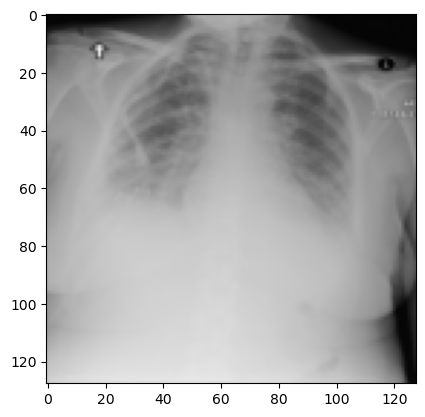

In [41]:
#ds = pydicom.read_file(lstFilesDCM[1])
ds = pydicom.dcmread(lstFilesDCM[1])
data = ds.pixel_array
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
data.shape
from skimage.transform import resize
IMG_PX_SIZE = 128
resized_img = resize(data, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
resized_img.shape
plt.imshow(resized_img , cmap="gray", vmin=0, vmax=255)


(1024, 1024)

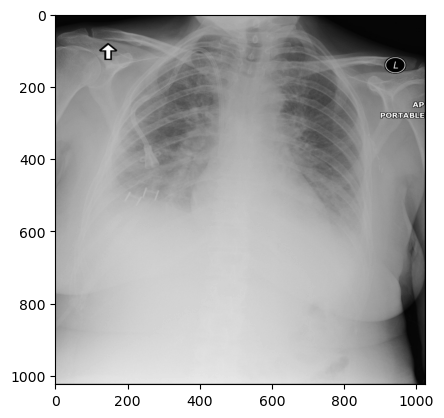

In [34]:
ds = pydicom.dcmread(lstFilesDCM[1])
data = ds.pixel_array
data.shape
plt.imshow(data , cmap="gray", vmin=0, vmax=255)
data.shape


In [ ]:
#pip install opencv-python

In [214]:
# Resize images
import cv2
import pydicom
import os
import shutil
from skimage.transform import resize

# List of image file paths
image_paths = lstFilesDCM

# Create the new folder
new_folder_1 = 'resized_images_1'
if not os.path.exists(new_folder_1):
    os.makedirs(new_folder_1)

# Create the new folder
new_folder = 'resized_images'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)
    
new_folder_0 = 'resized_images_0'
if not os.path.exists(new_folder_0):
    os.makedirs(new_folder_0)

df_1 = df_f[df_f['EncodedPixels'] == 1]
df_0 = df_f[df_f['EncodedPixels'] == 0]

resized_img = []
# Loop through the list of images
for image_path in image_paths:
    # Load the DICOM image using pydicom
    ds = pydicom.dcmread(image_path)
    data = ds.pixel_array
    data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    data.shape
    from skimage.transform import resize
    IMG_PX_SIZE = 224
    resized_img = cv2.resize(data, (IMG_PX_SIZE, IMG_PX_SIZE))
    
    # Get the base file name
    base_name = os.path.basename(image_path)
    #pydicom.dcmwrite(os.path.join(new_folder, base_name), resized_image)
    base_name = base_name[:-4]
    
    if base_name in df_1['ImageId'].values:
        # Save the resized image as a PNG file
        cv2.imwrite(os.path.join(new_folder_1, base_name + '.png'), resized_img)
    elif base_name in df_0['ImageId'].values:
        # Save the resized image as a PNG file
        cv2.imwrite(os.path.join(new_folder_0, base_name + '.png'), resized_img)
    else:  
        # Save the resized image as a PNG file
        cv2.imwrite(os.path.join(new_folder, base_name + '.png'), resized_img)
    #cv2.imwrite(os.path.join(new_folder, base_name), resized_image)


In [4]:
PathDicom = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/train_img'

lst_images_train = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".png" in filename.lower():  # check whether the file's DICOM
            lst_images_train.append(os.path.join(dirName,filename))

In [5]:
len(lst_images_train)

7740

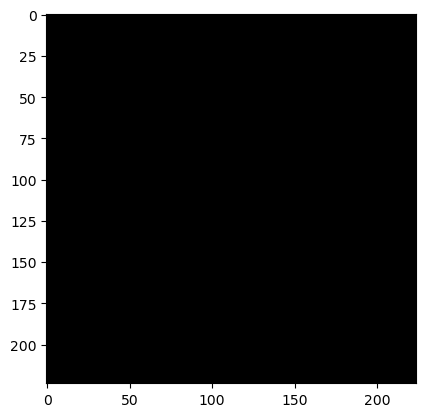

In [42]:
# Create the new folder and save mask

image_paths = lst_images_train

new_f = 'mask_image_train_1'
if not os.path.exists(new_f):
    os.makedirs(new_f)
    
new_f_test = 'mask_image_test_1'
if not os.path.exists(new_f_test):
    os.makedirs(new_f_test)

#base_name_train = os.path.basename(image_paths)
base_name_train = []
for images_p in image_paths:
    baname = os.path.basename(images_p)
    baname = baname[:-4]
    base_name_train.append(baname)

for i,x in df_f.iterrows():
    #print(images_p)
    if x.Mask != '0':
        r = rle2mask(x.Mask,1024,1024)
        IMG_PX_SIZE = 224
        resized_img = cv2.resize(r, (IMG_PX_SIZE, IMG_PX_SIZE))
        plt.imshow(resized_img , cmap="gray", vmin=0, vmax=255)
        base_name = x.ImageId
        if base_name in base_name_train:
            base_name = x.ImageId
            cv2.imwrite(os.path.join(new_f, base_name + '.png'), resized_img)
        else:
            base_name = x.ImageId
            cv2.imwrite(os.path.join(new_f_test, base_name + '.png'), resized_img)
    else:
        r = rle2mask('',1024,1024)
        IMG_PX_SIZE = 224
        resized_img = cv2.resize(r, (IMG_PX_SIZE, IMG_PX_SIZE))
        plt.imshow(resized_img , cmap="gray", vmin=0, vmax=255)
        
        base_name = x.ImageId
        
        if base_name in base_name_train:
            base_name = x.ImageId
            cv2.imwrite(os.path.join(new_f, base_name + '.png'), resized_img)
        else:
            base_name = x.ImageId
            cv2.imwrite(os.path.join(new_f_test, base_name + '.png'), resized_img)

In [47]:
# # Resize images
# import cv2
# import pydicom
# import os
# import shutil
# from skimage.transform import resize

# # List of image file paths
# image_paths = lstFilesDCM

# # Create the new folder
# new_folder = 'resized_images'
# if not os.path.exists(new_folder):
#     os.makedirs(new_folder)

# resized_img = []
# # Loop through the list of images
# for image_path in image_paths:
#     # Load the DICOM image using pydicom
#     ds = pydicom.dcmread(image_path)
# #     # Convert the image data to a NumPy array
# #     image_data = ds.pixel_array
# #     image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)

# #     # Resize the image using OpenCV's resize function
# #     resized_image = resize(image_data, (512, 512), anti_aliasing=True)
# #     #resized_img.append(resized_image)
    
#     data = ds.pixel_array
#     data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
#     data.shape
#     from skimage.transform import resize
#     IMG_PX_SIZE = 128
#     resized_img = cv2.resize(data, (IMG_PX_SIZE, IMG_PX_SIZE))
    
    

#     # Get the base file name
#     base_name = os.path.basename(image_path)
#     #pydicom.dcmwrite(os.path.join(new_folder, base_name), resized_image)
#     base_name = base_name[:-4]
#     # Save the resized image as a PNG file
#     cv2.imwrite(os.path.join(new_folder, base_name + '.png'), resized_img)
#     #cv2.imwrite(os.path.join(new_folder, base_name), resized_image)

In [172]:
# Create U-Net for super-resolution

from keras.models import Model
from keras.layers import Input, UpSampling2D
from keras.layers import Dropout
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import AveragePooling2D
from keras.layers import concatenate
train_width = 224
train_height = 224
inputs = Input((train_width, train_height, 1))

c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (inputs)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c1)
p1 = AveragePooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c2)
p2 = AveragePooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c3)
p3 = AveragePooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c4)

u5 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c4)
u5 = concatenate([u5, c3])
c5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u5)
c5 = Dropout(0.2) (c5)
c5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c2])
c6 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.1) (c6)
c6 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c1], axis=3)
c7 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.1) (c7)
c7 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same') (c7)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c7)

model = Model(inputs=[inputs], outputs=[outputs])
# compile the model with RMSProp as optimizer, MSE as loss function and MAE as metric
model.compile(optimizer= 'rmsprop', loss="binary_crossentropy")
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 224, 224, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_7 (Dropout)            (None, 224, 224, 16  0           ['conv2d_15[0][0]']              
                                )                                                           

In [173]:
from skimage.util import img_as_ubyte
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
import os
import imageio.v2 as imageio
from tensorflow import keras


In [181]:

# Path to the training images
# train_path = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/train_images/0'

# Read the list of file names
#train_filenames = sorted([x for x in os.listdir( train_path ) if x.endswith(".png")])
train_filenames = [x for x in lst_images_train if x.endswith(".png")]
#print(train_filenames)
print( 'Images loaded: ' + str( len(train_filenames)) )

#for x in train_filenames:
#  print(x)

# read training images
train_img = [ img_as_ubyte( io.imread(x,as_gray=True) ) for x in train_filenames ]
#train_img = [ Image.open(x).convert('L') for x in train_filenames ]

Images loaded: 7740


In [182]:
# Path to the training images
test_path2 = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/mask_image_train/'
# Read the list of file names
test_filenames2 = sorted([x for x in os.listdir( test_path2 ) if x.endswith(".png")])


#print(test_filenames2)
print( 'Images loaded: ' + str( len(test_filenames2)) )
#for x in train_filenames2:
#  print(x)

# read training images
test_img = [ img_as_ubyte( io.imread(test_path2 + x) ) for x in test_filenames2 ]

Images loaded: 7740


In [183]:
type(train_img)

list

In [184]:
train_img[0]

array([[  8,   7,   7, ...,   6,   6,   6],
       [  7,   7,   6, ...,   6,   6,   6],
       [  6,   6,   6, ...,   6,   6,   6],
       ...,
       [205, 206, 206, ...,   7,   7,   8],
       [206, 210, 210, ...,   7,   7,  10],
       [212, 214, 217, ...,  18,   7,  11]], dtype=uint8)

In [185]:
X_train = [cv2.resize(x, (224, 224)) for x in train_img]
X_train = [x/255  for x in X_train] # normalize between 0 and 1
X_train = [(1-x) for x in X_train] # normalize between 0 and 1
X_train = [np.reshape(x, (224, 224, 1)) for x in X_train]
X_train = np.asarray(X_train)

In [186]:
Y_train = [cv2.resize(x, (224, 224)) for x in test_img]
Y_train = [x/255  for x in Y_train] # normalize between 0 and 1
Y_train = [(1-x) for x in Y_train] # normalize between 0 and 1
Y_train = [np.reshape(x, (224, 224, 1)) for x in Y_train]
Y_train = np.asarray(Y_train)

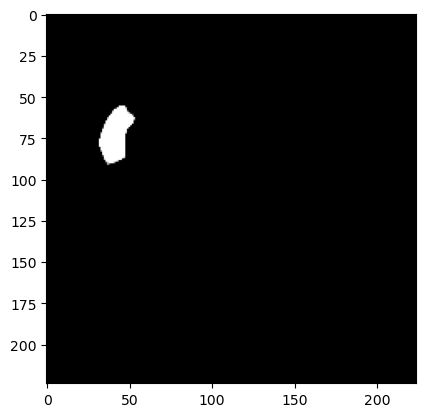

In [167]:
plt.imshow( invert(Y_train[10]), 'gray' )

In [220]:
# Train the network
from keras.callbacks import EarlyStopping
import numpy as np

numEpochs = 2
earlystopper = EarlyStopping(patience=5, verbose=1, restore_best_weights=True)

# X_train = train_img
# # training input
input_shape = ( 224, 224, 3 ) # 512x512x1
# # maxVal = np.amax(test_patches) *1.1
# # minVal = np.amin(test_patches) * 0.75
# # X_train = [(x-minVal)/(maxVal-minVal) for x in train_patches] # normalize between 0 and 1
# # X_train = [x / 2**7 for x in train_patches] # normalize between 0 and 1

# X_train = [x / 2**7 for x in train_img] # normalize between 0 and 1

# #X_train = [x/255  for x in train_img] # normalize between 0 and 1
# X_train = [(1-x) for x in X_train] # normalize between 0 and 1
# #X_train = [np.reshape(x, input_shape ) for x in X_train]
# X_train = [np.reshape(x, (224, 224, 3)) for x in X_train]
# X_train = np.asarray(X_train)



# output_shape = ( 224, 224, 3 ) # 512x512x1
# Y_train = [cv2.resize(x, (224, 224)) for x in test_img]
# Y_train = [x/255  for x in Y_train] # normalize between 0 and 1
# Y_train = [(1-x) for x in Y_train]
# Y_train = [np.reshape(x, output_shape ) for x in Y_train]
# Y_train = np.asarray(Y_train)



In [221]:
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [222]:
print(X_train.shape)
print(Y_train.shape)

(7740, 224, 224, 1)
(7740, 224, 224, 1)


In [223]:
history = model.fit( X_train, Y_train, validation_split=0.1, batch_size = 6,
                    epochs=numEpochs, callbacks=[earlystopper])


Epoch 1/2
1161/1161 [==============================] - 1811s 2s/step - loss: 0.0154 - val_loss: 0.0178
Epoch 2/2
1161/1161 [==============================] - 1786s 2s/step - loss: 0.0154 - val_loss: 0.0176


In [203]:
PathDicom = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/test_images'

lst_images_test = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".png" in filename.lower():  # check whether the file's DICOM
            lst_images_test.append(os.path.join(dirName,filename))

In [204]:

# Path to the training images
#train_path = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/train_images/0'
#type(train_path)
# Read the list of file names
#train_filenames = sorted([x for x in os.listdir( train_path ) if x.endswith(".png")])
train_filenames = [x for x in lst_images_test if x.endswith(".png")]
#print(train_filenames)
print( 'Images loaded: ' + str( len(train_filenames)) )

#for x in train_filenames:
#  print(x)

# read training images
train_img = [ img_as_ubyte( io.imread(x,as_gray=True) ) for x in train_filenames ]

Images loaded: 1936


In [205]:
# Path to the training images
test_path2 = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/mask_image_test/'
# Read the list of file names
test_filenames2 = sorted([x for x in os.listdir( test_path2 ) if x.endswith(".png")])


#print(test_filenames2)
print( 'Images loaded: ' + str( len(test_filenames2)) )
#for x in train_filenames2:
#  print(x)

# read training images
test_img = [ img_as_ubyte( io.imread(test_path2 + x) ) for x in test_filenames2 ]

Images loaded: 1936


In [206]:
X_test = [cv2.resize(x, (224, 224)) for x in train_img]
X_test = [x/255  for x in X_test] # normalize between 0 and 1
X_test = [(1-x) for x in X_test] # normalize between 0 and 1
X_test = [np.reshape(x, (224, 224, 1)) for x in X_test]
X_test = np.asarray(X_test)

In [207]:
output_shape = ( 224, 224, 1 ) # 512x512x1
Y_test = [x/255  for x in test_img] # normalize between 0 and 1
Y_test = [(1-x) for x in Y_test]
Y_test = [np.reshape(x, output_shape ) for x in Y_test]
Y_test = np.asarray(Y_test)

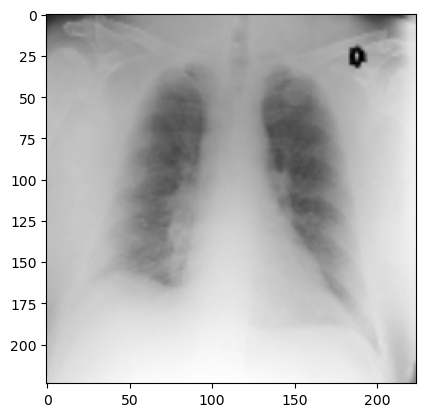

In [214]:
plt.imshow( invert(X_test[100]), 'gray' )

In [224]:
predictions = model.predict(X_test)
print('predictions shape:', predictions.shape)

61/61 [==============================] - 105s 2s/step
predictions shape: (1936, 224, 224, 1)


In [209]:
model.save("my_h5_model.h5")

In [42]:
model = keras.models.load_model('my_h5_model.h5')

Text(0.5, 1.0, 'Difference Pred-GT')

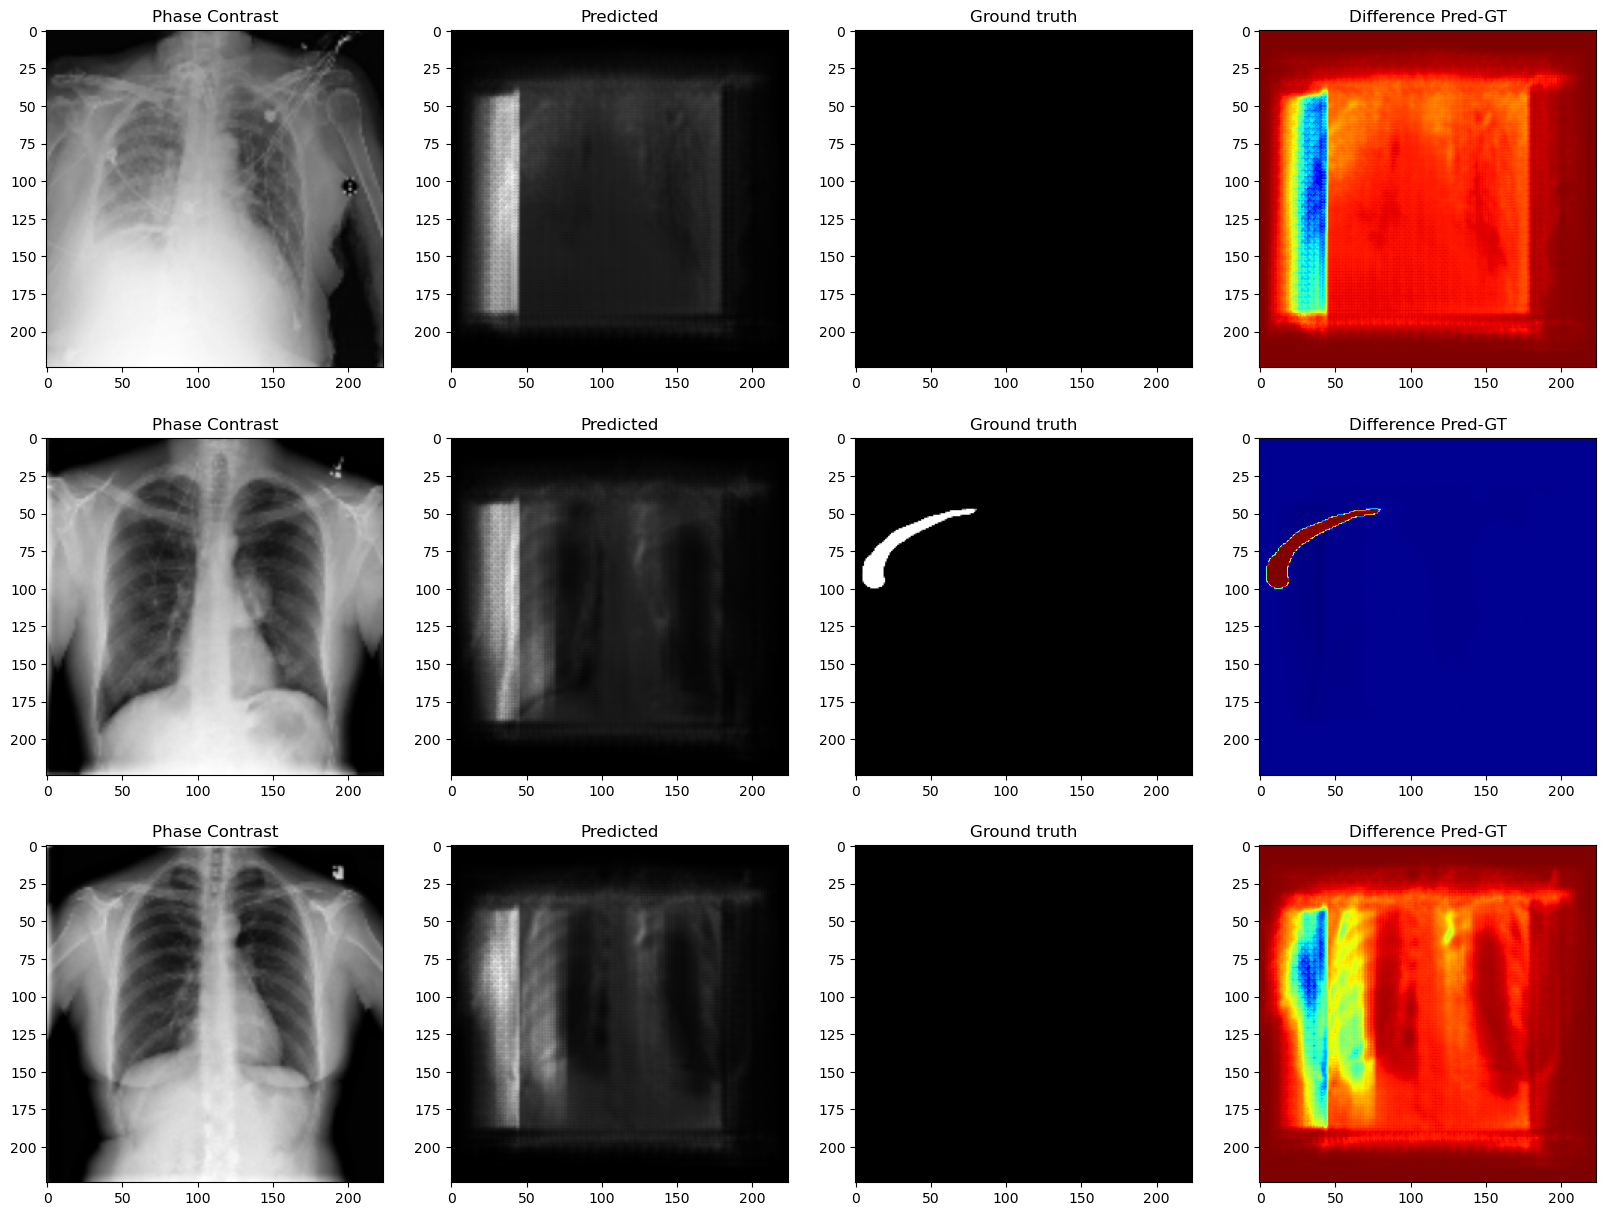

In [225]:
from skimage.util import invert
plt.figure(figsize=(20,15))

img = 77

plt.subplot(3, 4, 1)
plt.imshow( invert(X_test[img,:,:,0]), 'gray' )
plt.title( 'Phase Contrast' )


plt.subplot(3, 4, 2)
plt.imshow( invert(predictions[img,:,:,0]), 'gray' )
plt.title( 'Predicted' )

plt.subplot(3, 4, 3)
plt.imshow( invert(Y_test[img,:,:,0]), 'gray' )
plt.title( 'Ground truth' )

plt.subplot(3, 4, 4)
plt.imshow( predictions[img,:,:,0] - Y_test[img,:,:,0], 'jet' )
plt.title( 'Difference Pred-GT' )

img = 225

plt.subplot(3, 4, 5)
plt.imshow( invert(X_test[img,:,:,0]), 'gray' )
plt.title( 'Phase Contrast' )


plt.subplot(3, 4, 6)
plt.imshow( invert(predictions[img,:,:,0]), 'gray' )
plt.title( 'Predicted' )

plt.subplot(3, 4, 7)
plt.imshow( invert(Y_test[img,:,:,0]), 'gray' )
plt.title( 'Ground truth' )

plt.subplot(3, 4, 8)
plt.imshow( predictions[img,:,:,0] - Y_test[img,:,:,0], 'jet' )
plt.title( 'Difference Pred-GT' )


img = 222

plt.subplot(3, 4, 9)
plt.imshow( invert(X_test[img,:,:,0]), 'gray' )
plt.title( 'Phase Contrast' )


plt.subplot(3, 4, 10)
plt.imshow( invert(predictions[img,:,:,0]), 'gray' )
plt.title( 'Predicted' )

plt.subplot(3, 4, 11)
plt.imshow( invert(Y_test[img,:,:,0]), 'gray' )
plt.title( 'Ground truth' )

plt.subplot(3, 4, 12)
plt.imshow( predictions[img,:,:,0] - Y_test[img,:,:,0], 'jet' )
plt.title( 'Difference Pred-GT' )

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow( invert(predictions[50,180:280,155:255,0]), 'jet' )
plt.title( 'Predicted example 1' )
plt.subplot(1, 3, 2)
plt.imshow( invert(predictions[50,90:190,260:360,0]), 'jet' )
plt.title( 'Predicted example 2' )
plt.subplot(1, 3, 3)
plt.imshow( invert(Y_test[50,90:190,260:360,0]), 'jet' )
plt.title( 'GT example 2' )


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

# Définir les paramètres d'entraînement
batch_size = 32
num_classes = 2
epochs = 25

# Générer des données d'entraînement à partir des dossiers d'images
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical')

# Générer des données de test à partir des dossiers d'images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical')

# Définir le modèle
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compiler le modèle
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [270]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# define the folders path
success_folder = 'resized_images_1'
failure_folder = 'resized_images_0'

# empty list to store the images and labels
images = []
labels = []

# loop through the success images
for img in os.listdir(success_folder):
    path = os.path.join(success_folder, img)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    labels.append(1)

# loop through the failure images
for img in os.listdir(failure_folder):
    path = os.path.join(failure_folder, img)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    labels.append(0)

# convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# normalizing the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# building the model
model = keras.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(84, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',loss_weights=[1,10], metrics=['accuracy'])

# training the model
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))


Epoch 1/2


ValueError: in user code:

    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 224, 224, 3)


In [138]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
# calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

61/61 [==============================] - 21s 337ms/step
[[1500    0]
 [ 436    0]]


In [140]:
pred = model.predict(x_test)

61/61 [==============================] - 20s 326ms/step


In [141]:
pred

array([[0.1569951 ],
       [0.1766579 ],
       [0.28489646],
       ...,
       [0.2053023 ],
       [0.3459656 ],
       [0.1498713 ]], dtype=float32)

In [144]:
failure_image_paths = 'resized_images_0'
failure_image_paths

'resized_images_0'

In [152]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Path to success folder
success_folder_path = 'resized_images_1'

# Path to failure folder
failure_folder_path = 'resized_images_0'

# Get list of success images
success_image_paths = [os.path.join(success_folder_path,img) for img in os.listdir(success_folder_path)]

# Get list of failure images
failure_image_paths = [os.path.join(failure_folder_path,img) for img in os.listdir(failure_folder_path)]


# Split the success images into train and test sets
success_train_images, success_test_images = train_test_split(success_image_paths, test_size=0.2, random_state=42)

# Split the failure images into train and test sets
failure_train_images, failure_test_images = train_test_split(failure_image_paths, test_size=0.2, random_state=42)

# Create the new train and test folders
train_folder = 'train_images'
if not os.path.exists(train_folder):
    os.makedirs(train_folder)
    os.makedirs(os.path.join(train_folder, '1'))
    os.makedirs(os.path.join(train_folder, '0'))

test_folder = 'test_images'
if not os.path.exists(test_folder):
    os.makedirs(test_folder)
    os.makedirs(os.path.join(test_folder, '1'))
    os.makedirs(os.path.join(test_folder, '0'))

# Copy the train images to the new train folder
for image in success_train_images:
    shutil.copy(image, os.path.join(train_folder, '1', os.path.basename(image)))
for image in failure_train_images:
    shutil.copy(image, os.path.join(train_folder, '0', os.path.basename(image)))

# Copy the test images to the new test folder
for image in success_test_images:
    shutil.copy(image, os.path.join(test_folder, '1', os.path.basename(image)))
for image in failure_test_images:
    shutil.copy(image, os.path.join(test_folder, '0', os.path.basename(image)))


'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11639.1517875234.49961.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2714.1517875174.208635.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3789.1517875179.419895.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4706.1517875184.240235.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12593.1517875239.931642.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4273.1517875182.56762.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14468.1517875252.245743.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4729.1517875184.343855.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5231.1517875187.99671.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4213.1517875181.745496.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3275.1517875177.46737.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1964.1517875170.448633.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3631.1517875178.742952.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11614.1517875233.931863.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11139.1517875231.356380.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5201.1517875186.937125.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2060.1517875170.960326.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3455.1517875177.916697.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3218.1517875176.673694.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12047.1517875237.87687.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2634.1517875173.807824.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11824.1517875235.295912.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10098.1517875222.57431.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3449.1517875177.894177.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32714.1517875161.932531.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12824.1517875242.24774.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10277.1517875222.949665.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11580.1517875233.717684.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32113.1517875158.485626.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10118.1517875222.182265.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12436.1517875239.104875.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12818.1517875241.993181.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31823.1517875157.41461.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4509.1517875183.211958.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4425.1517875182.805407.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11861.1517875236.75447.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5342.1517875187.687668.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4473.1517875183.52072.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10646.1517875224.719426.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10844.1517875225.917310.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13884.1517875248.478629.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32311.1517875159.954516.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12539.1517875239.620454.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31748.1517875156.603377.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11284.1517875232.140220.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3637.1517875178.776612.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4553.1517875183.420292.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2663.1517875173.932279.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5735.1517875189.897050.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10796.1517875225.651428.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13267.1517875244.426079.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12283.1517875238.377425.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3626.1517875178.720627.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3623.1517875178.729132.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32390.1517875160.350797.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3171.1517875176.420860.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32681.1517875161.766764.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10911.1517875227.881792.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12750.1517875241.644269.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5651.1517875189.308283.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12057.1517875237.166922.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11489.1517875233.189659.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4683.1517875184.107041.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32188.1517875158.933060.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13682.1517875247.188359.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5686.1517875189.611807.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5766.1517875190.239110.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14177.1517875250.115681.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13017.1517875243.103339.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10216.1517875222.661273.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11763.1517875234.654474.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12701.1517875241.233681.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13291.1517875244.527846.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3549.1517875178.360944.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13483.1517875245.528161.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10266.1517875222.906294.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.21631.1517874435.266171.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13058.1517875243.342160.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14034.1517875249.250433.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2332.1517875172.214240.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32190.1517875158.952220.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11915.1517875236.451741.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12987.1517875242.890311.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31967.1517875157.748432.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2161.1517875171.418563.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32231.1517875159.142529.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2214.1517875171.662903.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10169.1517875222.447445.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12389.1517875238.917154.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11233.1517875231.878552.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32601.1517875161.427223.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3482.1517875178.36159.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3971.1517875180.404576.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3547.1517875178.348284.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11880.1517875236.169324.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5169.1517875186.763360.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11689.1517875234.317495.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13102.1517875243.606087.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10110.1517875222.142071.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2980.1517875175.534865.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32497.1517875160.866668.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2113.1517875171.230140.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4280.1517875182.93581.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13611.1517875246.854664.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2144.1517875171.362910.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11462.1517875233.57314.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13486.1517875245.544172.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11497.1517875233.215084.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10328.1517875223.177887.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3921.1517875180.127223.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5782.1517875190.531042.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4429.1517875182.835395.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4661.1517875184.22180.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11075.1517875230.895962.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3039.1517875175.763794.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4333.1517875182.329762.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12394.1517875238.940144.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3053.1517875175.804894.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13711.1517875247.325499.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1778.1517875169.386577.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2710.1517875174.159257.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4046.1517875180.864544.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11260.1517875232.18469.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12671.1517875241.63757.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14178.1517875250.124667.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11323.1517875232.328900.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32644.1517875161.601009.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11930.1517875236.508233.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10691.1517875225.96424.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3987.1517875180.521887.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2211.1517875171.651877.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4481.1517875183.93971.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10472.1517875223.864249.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4746.1517875184.591608.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11693.1517875234.338316.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3707.1517875179.88657.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5355.1517875187.744168.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10143.1517875222.320737.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11968.1517875236.678579.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2491.1517875173.32366.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3843.1517875179.736412.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11409.1517875232.812814.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10801.1517875225.674698.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5358.1517875187.748481.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11366.1517875232.635941.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11107.1517875231.192271.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3571.1517875178.480935.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12493.1517875239.385688.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4629.1517875183.838757.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13070.1517875243.405687.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32178.1517875158.893936.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3815.1517875179.613404.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12762.1517875241.679681.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32520.1517875160.990399.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5180.1517875186.848893.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2820.1517875174.884740.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5458.1517875188.246247.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2107.1517875171.207598.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12452.1517875239.179149.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4120.1517875181.206287.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4340.1517875182.354827.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13703.1517875247.293579.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1846.1517875169.900917.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14025.1517875249.196795.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2744.1517875174.402818.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3071.1517875175.918594.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4018.1517875180.673289.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1805.1517875169.650570.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12687.1517875241.189007.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2723.1517875174.268600.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5096.1517875186.389495.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11576.1517875233.682788.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14390.1517875251.873929.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5529.1517875188.679889.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13408.1517875245.184359.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2995.1517875175.606037.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12507.1517875239.446477.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13484.1517875245.530837.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5085.1517875186.344997.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2565.1517875173.447285.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13780.1517875247.897181.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32609.1517875161.460309.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5447.1517875188.190197.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32312.1517875159.978512.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1815.1517875169.717332.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11342.1517875232.472952.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14116.1517875249.697115.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14089.1517875249.578840.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13247.1517875244.345650.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3334.1517875177.309082.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5505.1517875188.557228.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11459.1517875233.42491.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11709.1517875234.404815.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12516.1517875239.506732.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3607.1517875178.656616.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11227.1517875231.820640.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13637.1517875246.989758.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4808.1517875184.910921.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4176.1517875181.518080.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10558.1517875224.272500.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5745.1517875190.95784.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10012.1517875220.965942.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12469.1517875239.255420.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5202.1517875186.940296.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11440.1517875232.954675.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4605.1517875183.697433.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11103.1517875231.154409.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11618.1517875233.948060.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14018.1517875249.164341.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11885.1517875236.191346.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11141.1517875231.381221.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11017.1517875229.949619.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13120.1517875243.751387.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14335.1517875251.369818.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31976.1517875157.813429.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31902.1517875157.405933.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12651.1517875240.978591.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11772.1517875234.733501.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11146.1517875231.400779.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1717.1517875169.86570.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11031.1517875230.4520.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11770.1517875234.708511.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2792.1517875174.755330.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32314.1517875159.974148.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11308.1517875232.252349.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2616.1517875173.725749.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13786.1517875247.916778.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11804.1517875234.959778.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5531.1517875188.684573.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13872.1517875248.424150.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32480.1517875160.802995.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32596.1517875161.396010.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2617.1517875173.746955.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2459.1517875172.853488.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13127.1517875243.795659.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12271.1517875238.339231.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3037.1517875175.760202.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3056.1517875175.812568.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10734.1517875225.372178.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10674.1517875224.997553.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13228.1517875244.222717.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13404.1517875245.162172.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10777.1517875225.586461.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12706.1517875241.251578.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4682.1517875184.111953.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10627.1517875224.606582.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13706.1517875247.304787.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11144.1517875231.391277.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12692.1517875241.210061.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4186.1517875181.565710.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32334.1517875160.114739.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2123.1517875171.270461.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11605.1517875233.887777.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10918.1517875227.904054.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12552.1517875239.680453.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14449.1517875252.165529.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2797.1517875174.778363.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4515.1517875183.250981.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10531.1517875224.152338.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12236.1517875238.137031.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13587.1517875246.748946.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11425.1517875232.878035.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2410.1517875172.587385.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3129.1517875176.240639.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3725.1517875179.163005.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5331.1517875187.648627.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10060.1517875221.792744.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3476.1517875178.7133.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1891.1517875170.128096.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4154.1517875181.391306.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4814.1517875184.934535.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12444.1517875239.156894.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12842.1517875242.118581.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14049.1517875249.339870.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2125.1517875171.280070.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11977.1517875236.716995.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14515.1517875252.471942.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10829.1517875225.821589.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5575.1517875188.864922.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31802.1517875156.926127.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2597.1517875173.653909.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2981.1517875175.538064.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14578.1517875252.802768.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32281.1517875159.350469.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2834.1517875174.974983.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12540.1517875239.627741.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5419.1517875188.17023.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3424.1517875177.790867.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3478.1517875178.16793.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32512.1517875160.957247.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3879.1517875179.946866.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13260.1517875244.387213.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10157.1517875222.388499.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2487.1517875173.12426.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11147.1517875231.406761.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2801.1517875174.802060.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10367.1517875223.390827.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1987.1517875170.572828.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14275.1517875250.530260.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4281.1517875182.110725.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10392.1517875223.495133.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14009.1517875249.111902.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12133.1517875237.603189.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5769.1517875190.264423.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32207.1517875159.19310.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14415.1517875251.998778.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13621.1517875246.889293.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3686.1517875178.975134.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2836.1517875174.995788.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32259.1517875159.267284.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4799.1517875184.887948.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13949.1517875248.810438.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13444.1517875245.346980.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13088.1517875243.537157.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10265.1517875222.899187.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14410.1517875251.964005.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32504.1517875160.920006.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3133.1517875176.254127.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4044.1517875180.836603.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12053.1517875237.131392.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4780.1517875184.742073.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12179.1517875237.861440.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13945.1517875248.784654.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14516.1517875252.479227.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3289.1517875177.113690.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5780.1517875190.515264.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32662.1517875161.690111.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32367.1517875160.242064.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4491.1517875183.133132.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3524.1517875178.217961.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5715.1517875189.727011.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11311.1517875232.266544.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2428.1517875172.652980.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11741.1517875234.559182.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14039.1517875249.288436.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14431.1517875252.82936.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2495.1517875173.44566.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14067.1517875249.469565.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4209.1517875181.736553.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11307.1517875232.268960.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10940.1517875228.343225.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13259.1517875244.388147.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4865.1517875185.161274.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14181.1517875250.134695.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5450.1517875188.203707.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4110.1517875181.152495.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32043.1517875158.178003.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2118.1517875171.244042.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1732.1517875169.156805.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10582.1517875224.406501.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3280.1517875177.67172.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32034.1517875158.122247.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11221.1517875231.796510.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13003.1517875242.959783.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13056.1517875243.326353.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1813.1517875169.699160.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1876.1517875170.19743.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12460.1517875239.218904.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12395.1517875238.944559.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2835.1517875174.981398.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13050.1517875243.320050.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1980.1517875170.526219.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3417.1517875177.755442.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4219.1517875181.794578.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32639.1517875161.579169.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13271.1517875244.437178.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3112.1517875176.157055.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32277.1517875159.327185.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10660.1517875224.944712.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13182.1517875244.37130.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2385.1517875172.478313.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11189.1517875231.628822.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5181.1517875186.849086.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5710.1517875189.709115.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12747.1517875241.618058.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12587.1517875239.902166.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3911.1517875180.95106.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11622.1517875233.954021.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4611.1517875183.726219.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31679.1517875156.286715.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4383.1517875182.596724.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4168.1517875181.481728.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32515.1517875160.961341.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1769.1517875169.341759.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10153.1517875222.374774.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32698.1517875161.880118.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31791.1517875156.859842.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31805.1517875156.946483.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13798.1517875247.990948.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13741.1517875247.682421.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12667.1517875241.45147.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2529.1517875173.221993.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3802.1517875179.552823.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3514.1517875178.176496.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14385.1517875251.851725.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4819.1517875184.967758.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12108.1517875237.422446.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32762.1517875162.235692.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11151.1517875231.427516.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13304.1517875244.575626.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5451.1517875188.206769.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11538.1517875233.464937.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4659.1517875184.19019.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10985.1517875229.141787.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12367.1517875238.826064.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12240.1517875238.163054.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2648.1517875173.867556.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10875.1517875226.72338.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3307.1517875177.186295.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13125.1517875243.774483.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31974.1517875157.798569.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5453.1517875188.223867.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3355.1517875177.462118.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10210.1517875222.631015.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12751.1517875241.623881.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5713.1517875189.730475.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3691.1517875179.7554.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12542.1517875239.629835.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4329.1517875182.319628.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11560.1517875233.626521.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12172.1517875237.815904.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14265.1517875250.487676.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2894.1517875175.254917.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4451.1517875182.930106.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13218.1517875244.189414.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32134.1517875158.614035.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5428.1517875188.88085.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3212.1517875176.630558.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5697.1517875189.643327.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1810.1517875169.674072.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10451.1517875223.778479.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32011.1517875158.5588.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13065.1517875243.383187.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1991.1517875170.600752.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13262.1517875244.406985.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12248.1517875238.212327.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31695.1517875156.358341.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1821.1517875169.736963.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12211.1517875237.991362.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10295.1517875223.23166.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5705.1517875189.687669.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1799.1517875169.623028.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2412.1517875172.603697.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11635.1517875234.31437.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4620.1517875183.778580.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4820.1517875184.975018.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10310.1517875223.101698.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4791.1517875184.817101.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12928.1517875242.568516.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13425.1517875245.261740.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11400.1517875232.772869.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10031.1517875221.31204.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4469.1517875183.18796.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32518.1517875160.978553.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2345.1517875172.290155.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14435.1517875252.97906.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10647.1517875224.720668.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32270.1517875159.310960.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11927.1517875236.503729.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12078.1517875237.250410.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32007.1517875157.982809.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4162.1517875181.450856.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11197.1517875231.668774.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2145.1517875171.363123.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10316.1517875223.125686.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32653.1517875161.643037.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1962.1517875170.445859.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14466.1517875252.239817.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2828.1517875174.930856.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4905.1517875185.363996.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4874.1517875185.188564.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1741.1517875169.196573.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2015.1517875170.706887.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2421.1517875172.635738.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32242.1517875159.192599.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2874.1517875175.174019.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4679.1517875184.95876.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11391.1517875232.744682.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3082.1517875175.983997.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11888.1517875236.213146.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13687.1517875247.233530.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2447.1517875172.804337.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31956.1517875157.678828.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13684.1517875247.213718.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2707.1517875174.151538.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11480.1517875233.143118.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5415.1517875187.1841.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10710.1517875225.214140.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14113.1517875249.683687.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14316.1517875251.146623.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32121.1517875158.535511.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10314.1517875223.121149.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3471.1517875177.984670.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5598.1517875188.965313.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4603.1517875183.683946.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11953.1517875236.605208.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13438.1517875245.327302.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31643.1517875156.72769.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12801.1517875241.917248.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5405.1517875187.952236.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10196.1517875222.580181.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5142.1517875186.606737.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3937.1517875180.208198.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3738.1517875179.226404.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12805.1517875241.941377.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5474.1517875188.361438.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12941.1517875242.635403.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10915.1517875227.910168.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10426.1517875223.671083.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4987.1517875185.852519.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31903.1517875157.413584.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2357.1517875172.319430.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10684.1517875225.62970.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14599.1517875252.965082.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12536.1517875239.598768.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31892.1517875157.349249.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4242.1517875181.862335.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10076.1517875221.859592.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11794.1517875234.871858.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32500.1517875160.888047.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11180.1517875231.591001.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4362.1517875182.469446.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11812.1517875235.139557.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3967.1517875180.392154.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14397.1517875251.921482.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12911.1517875242.492201.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10111.1517875222.157809.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5787.1517875190.589131.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13128.1517875243.795794.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5042.1517875186.96267.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4821.1517875184.980575.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3681.1517875178.965337.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10899.1517875226.229115.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5326.1517875187.640630.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32055.1517875158.218416.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3505.1517875178.142219.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11385.1517875232.721726.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12409.1517875238.370.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4257.1517875181.967566.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13041.1517875243.254920.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4735.1517875184.410483.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31701.1517875156.392542.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11448.1517875232.994504.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12748.1517875241.622318.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10581.1517875224.408878.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31753.1517875156.623360.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11549.1517875233.561988.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10305.1517875223.79499.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4558.1517875183.436316.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14414.1517875251.984282.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10175.1517875222.467676.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11983.1517875236.762310.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13911.1517875248.626599.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10620.1517875224.578477.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14541.1517875252.607505.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2466.1517875172.902109.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4327.1517875182.309148.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3426.1517875177.797470.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31778.1517875156.797052.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4559.1517875183.435244.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13778.1517875247.879585.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12148.1517875237.694692.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5213.1517875187.9472.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10716.1517875225.244163.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14288.1517875250.580679.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4947.1517875185.628602.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5176.1517875186.820533.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10732.1517875225.361818.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10712.1517875225.224680.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3088.1517875176.43298.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32235.1517875159.166780.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4506.1517875183.200374.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14168.1517875249.982029.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4521.1517875183.281617.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12280.1517875238.377093.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11476.1517875233.126902.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5333.1517875187.646628.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5716.1517875189.736148.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10879.1517875226.99155.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4124.1517875181.222804.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11662.1517875234.206066.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3110.1517875176.151774.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5122.1517875186.514632.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12605.1517875240.120412.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32433.1517875160.571504.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11010.1517875229.498545.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2093.1517875171.146194.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13559.1517875246.622712.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14150.1517875249.852043.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2650.1517875173.880323.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5461.1517875188.265028.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11314.1517875232.287707.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5584.1517875188.891122.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14297.1517875250.632060.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12872.1517875242.289734.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3864.1517875179.864062.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11602.1517875233.861175.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12425.1517875239.64849.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32163.1517875158.785706.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13662.1517875247.103082.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14360.1517875251.745589.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31797.1517875156.918192.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13600.1517875246.823703.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13439.1517875245.328664.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3156.1517875176.359932.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14496.1517875252.386912.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5696.1517875189.638196.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32656.1517875161.665151.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10493.1517875223.945577.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13934.1517875248.729586.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14460.1517875252.208684.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11514.1517875233.284248.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3924.1517875180.160770.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12973.1517875242.807182.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4141.1517875181.303525.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2064.1517875170.973419.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14375.1517875251.811944.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3645.1517875178.808017.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10557.1517875224.257683.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3615.1517875178.696576.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32483.1517875160.802853.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2615.1517875173.725633.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4311.1517875182.219641.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4981.1517875185.834231.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4588.1517875183.632318.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3550.1517875178.367616.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13085.1517875243.514098.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1963.1517875170.446426.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4887.1517875185.266125.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10042.1517875221.699011.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3446.1517875177.873129.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2775.1517875174.639059.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13297.1517875244.548197.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12731.1517875241.528430.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2869.1517875175.160365.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10507.1517875224.16428.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13719.1517875247.372338.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11377.1517875232.682384.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32319.1517875160.11685.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10057.1517875221.791666.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4392.1517875182.623329.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10900.1517875226.344445.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31924.1517875157.522938.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32098.1517875158.420481.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2612.1517875173.713262.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13826.1517875248.140288.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12225.1517875238.56611.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12573.1517875239.837855.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10810.1517875225.727416.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11211.1517875231.745630.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14204.1517875250.228481.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31683.1517875156.309567.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32709.1517875161.908316.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12362.1517875238.799884.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10624.1517875224.585118.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11784.1517875234.818506.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14051.1517875249.351067.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12037.1517875237.57272.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5386.1517875187.872943.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12385.1517875238.894587.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11680.1517875234.276168.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12491.1517875239.375978.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4904.1517875185.355709.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5423.1517875188.37987.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4655.1517875184.5256.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13642.1517875247.6947.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5410.1517875187.977318.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14454.1517875252.187556.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2542.1517875173.291111.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12892.1517875242.411217.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3939.1517875180.226049.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10561.1517875224.274935.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3999.1517875180.584569.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31689.1517875156.331949.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11792.1517875234.860530.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13540.1517875246.540854.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12693.1517875241.217666.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11239.1517875231.899296.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11727.1517875234.495747.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10317.1517875223.123236.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32435.1517875160.590585.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5674.1517875189.430619.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10509.1517875224.22292.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2367.1517875172.378051.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2657.1517875173.908815.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32513.1517875160.958900.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3914.1517875180.105431.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13157.1517875243.927171.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3023.1517875175.697978.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11136.1517875231.344789.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32619.1517875161.506662.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14040.1517875249.289553.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3762.1517875179.334004.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32360.1517875160.217443.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11617.1517875233.926386.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11422.1517875232.865125.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3116.1517875176.172745.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5199.1517875186.924502.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2147.1517875171.360386.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14026.1517875249.199039.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13435.1517875245.308344.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2937.1517875175.424132.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11397.1517875232.774703.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4117.1517875181.196918.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10047.1517875221.722653.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13972.1517875248.923886.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10677.1517875225.29879.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11074.1517875230.897616.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31831.1517875157.88786.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3746.1517875179.258086.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13996.1517875249.45103.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11068.1517875230.868573.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13730.1517875247.610996.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10538.1517875224.193267.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11345.1517875232.494206.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4853.1517875185.123274.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31941.1517875157.590337.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3590.1517875178.591002.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12402.1517875238.977135.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10542.1517875224.195036.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5029.1517875186.40650.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12294.1517875238.418455.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10934.1517875228.144700.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13129.1517875243.803200.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4961.1517875185.712498.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4204.1517875181.699922.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11383.1517875232.707189.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32100.1517875158.440666.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3721.1517875179.153058.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13094.1517875243.559528.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13743.1517875247.687747.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10798.1517875225.673226.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12455.1517875239.199904.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14192.1517875250.184608.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12166.1517875237.793760.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3140.1517875176.297522.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3123.1517875176.214943.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12809.1517875241.965981.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10016.1517875220.992175.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3050.1517875175.795900.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11980.1517875236.742350.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10026.1517875221.22915.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3429.1517875177.805141.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12356.1517875238.751271.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10945.1517875228.385481.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1841.1517875169.876272.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12345.1517875238.693725.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11008.1517875229.467452.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13974.1517875248.921865.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2988.1517875175.570430.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2340.1517875172.266257.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31716.1517875156.446429.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4994.1517875185.886461.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13717.1517875247.371360.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5376.1517875187.823993.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32255.1517875159.256803.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11149.1517875231.412560.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12877.1517875242.319298.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32164.1517875158.794557.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11322.1517875232.314499.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12998.1517875242.930733.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3941.1517875180.226042.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11798.1517875234.913352.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12558.1517875239.714420.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5730.1517875189.841538.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12715.1517875241.285367.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3137.1517875176.273163.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2515.1517875173.119517.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10943.1517875228.376682.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2875.1517875175.176472.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2375.1517875172.428156.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4536.1517875183.345270.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31781.1517875156.805570.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10248.1517875222.820071.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10095.1517875221.988309.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10570.1517875224.334838.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12315.1517875238.529618.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13597.1517875246.803741.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2878.1517875175.188420.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10312.1517875223.105803.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5693.1517875189.633632.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5297.1517875187.484471.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2661.1517875173.926521.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12060.1517875237.171435.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4401.1517875182.657346.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5394.1517875187.924400.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32680.1517875161.762287.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3583.1517875178.571601.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11554.1517875233.580887.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4487.1517875183.115597.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3073.1517875175.935757.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14574.1517875252.774870.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14605.1517875253.25162.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31861.1517875157.200473.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32580.1517875161.296231.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2664.1517875173.936749.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12896.1517875242.420356.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11567.1517875233.659603.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10273.1517875222.936783.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10100.1517875222.77135.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3611.1517875178.670999.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12267.1517875238.313953.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13159.1517875243.930257.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10197.1517875222.581234.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12774.1517875241.749779.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11275.1517875232.96765.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13114.1517875243.717967.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12721.1517875241.338312.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10032.1517875221.34651.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13561.1517875246.628660.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1787.1517875169.432107.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11433.1517875232.907958.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10174.1517875222.481277.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4569.1517875183.532479.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10380.1517875223.444038.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11483.1517875233.162285.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1926.1517875170.276641.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10994.1517875229.252752.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10885.1517875226.112809.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2258.1517875171.834139.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32054.1517875158.212647.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4815.1517875184.936640.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13513.1517875246.27434.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2027.1517875170.775601.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32260.1517875159.278237.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2896.1517875175.265931.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5341.1517875187.686062.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4758.1517875184.624326.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12251.1517875238.225515.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10960.1517875228.653065.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12807.1517875241.947085.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3964.1517875180.379578.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12301.1517875238.453250.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3965.1517875180.406042.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12636.1517875240.809095.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31814.1517875157.8691.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1900.1517875170.166326.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32305.1517875159.800950.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10222.1517875222.699231.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32102.1517875158.442966.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10336.1517875223.220220.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12897.1517875242.426825.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31865.1517875157.209292.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4528.1517875183.319682.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11158.1517875231.450872.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2867.1517875175.139204.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11539.1517875233.482900.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32612.1517875161.476859.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3136.1517875176.271336.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13747.1517875247.714077.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2535.1517875173.254390.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32703.1517875161.876097.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10409.1517875223.576347.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10156.1517875222.384521.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10491.1517875223.932549.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10851.1517875225.946207.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10192.1517875222.561134.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12350.1517875238.718935.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10252.1517875222.844708.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2999.1517875175.617235.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4177.1517875181.520808.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10735.1517875225.405647.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10533.1517875224.163136.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13990.1517875248.997209.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13528.1517875246.468876.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10520.1517875224.82979.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10287.1517875222.997107.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3846.1517875179.755149.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4159.1517875181.421584.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12326.1517875238.596953.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4416.1517875182.743351.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14367.1517875251.770073.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10648.1517875224.735027.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11023.1517875229.944401.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11900.1517875236.364220.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3047.1517875175.785131.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13794.1517875247.976810.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31828.1517875157.72204.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10358.1517875223.346264.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13578.1517875246.695724.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13229.1517875244.228614.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3438.1517875177.844536.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10370.1517875223.412578.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11858.1517875236.66881.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10267.1517875222.914154.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12482.1517875239.327262.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31777.1517875156.793054.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4969.1517875185.754340.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2654.1517875173.901803.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14042.1517875249.292805.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4937.1517875185.552993.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4757.1517875184.619254.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4925.1517875185.498237.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13334.1517875244.690937.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14396.1517875251.895730.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11670.1517875234.243046.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10966.1517875228.762329.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3960.1517875180.358445.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11117.1517875231.259911.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3105.1517875176.124577.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31691.1517875156.352314.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10449.1517875223.772269.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4471.1517875183.40562.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12929.1517875242.577350.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11027.1517875229.978501.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3694.1517875179.15919.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5786.1517875190.569598.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10346.1517875223.277415.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10122.1517875222.202189.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3745.1517875179.256119.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4741.1517875184.511107.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11917.1517875236.463943.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13103.1517875243.616586.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3211.1517875176.623768.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4017.1517875180.678585.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10005.1517875220.958951.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32696.1517875161.855596.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2046.1517875170.857799.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2114.1517875171.231861.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3190.1517875176.503768.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10303.1517875223.65433.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32216.1517875159.54881.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12940.1517875242.632293.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3688.1517875178.995015.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1777.1517875169.369491.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13388.1517875245.113408.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31859.1517875157.181850.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32184.1517875158.914008.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4343.1517875182.374454.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3966.1517875180.399557.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11740.1517875234.556763.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4991.1517875185.874401.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32262.1517875159.289880.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32486.1517875160.828401.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10374.1517875223.421330.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12993.1517875242.925626.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4163.1517875181.454294.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13667.1517875247.125535.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2701.1517875174.132262.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10226.1517875222.727019.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3004.1517875175.645877.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13763.1517875247.776069.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32573.1517875161.267282.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2803.1517875174.812959.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10923.1517875227.958322.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10571.1517875224.333275.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1975.1517875170.498018.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11613.1517875233.920962.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5053.1517875186.153242.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2246.1517875171.800340.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5411.1517875187.977062.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4004.1517875180.609434.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2843.1517875175.52344.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2814.1517875174.863254.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4440.1517875182.865105.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32125.1517875158.565829.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10037.1517875221.677730.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11922.1517875236.475756.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13071.1517875243.401523.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11056.1517875230.475630.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13913.1517875248.625290.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11672.1517875234.255653.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32470.1517875160.759397.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14024.1517875249.194802.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14083.1517875249.540371.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4882.1517875185.245838.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4185.1517875181.568007.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11961.1517875236.648500.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32122.1517875158.545273.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4872.1517875185.186603.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2373.1517875172.417600.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14253.1517875250.443788.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12154.1517875237.738674.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13233.1517875244.249214.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10151.1517875222.348415.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13847.1517875248.270839.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13190.1517875244.65284.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12323.1517875238.576790.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2511.1517875173.103305.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3134.1517875176.262695.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13027.1517875243.170022.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3335.1517875177.319000.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32701.1517875161.857426.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5650.1517875189.325122.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2259.1517875171.842594.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14608.1517875253.48724.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11607.1517875233.889082.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12904.1517875242.467403.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5373.1517875187.819904.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11527.1517875233.390738.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14290.1517875250.595734.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13465.1517875245.453653.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13221.1517875244.199643.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31669.1517875156.239920.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1725.1517875169.119831.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14305.1517875250.671909.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4077.1517875180.993479.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3862.1517875179.853787.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5222.1517875187.61027.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4346.1517875182.395799.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4072.1517875180.971125.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3099.1517875176.96225.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32562.1517875161.229897.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3875.1517875179.932640.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31982.1517875157.832985.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4630.1517875183.839053.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2768.1517875174.607604.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4834.1517875185.39692.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4958.1517875185.686212.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2666.1517875173.948896.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13925.1517875248.651279.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10279.1517875222.955294.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2393.1517875172.523399.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13606.1517875246.843676.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32197.1517875158.978910.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12927.1517875242.560557.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4122.1517875181.217677.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10205.1517875222.627574.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10524.1517875224.108162.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2239.1517875171.766942.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14125.1517875249.737586.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4812.1517875184.925569.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13656.1517875247.79269.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32023.1517875158.63419.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3462.1517875177.935557.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2585.1517875173.602154.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12167.1517875237.806287.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5286.1517875187.372778.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11478.1517875233.132109.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11666.1517875234.211033.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14559.1517875252.701386.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31817.1517875157.9340.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13950.1517875248.813770.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13669.1517875247.140950.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5566.1517875188.826181.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12028.1517875236.988922.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3765.1517875179.328110.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3679.1517875178.973051.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3371.1517875177.526184.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12833.1517875242.76085.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10679.1517875225.17163.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32203.1517875158.998670.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2275.1517875171.896099.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10138.1517875222.277673.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13092.1517875243.583622.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10322.1517875223.142884.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10659.1517875224.931582.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2534.1517875173.252618.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13885.1517875248.490432.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32568.1517875161.247855.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4784.1517875184.787324.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5560.1517875188.814223.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1999.1517875170.634380.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2313.1517875172.107269.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3083.1517875176.13735.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32635.1517875161.575565.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3160.1517875176.369130.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12199.1517875237.934263.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12146.1517875237.682870.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32600.1517875161.421979.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4474.1517875183.51654.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11435.1517875232.930413.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4656.1517875184.15128.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2460.1517875172.851039.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10105.1517875222.102502.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2601.1517875173.671582.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32394.1517875160.384909.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13516.1517875246.398635.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14191.1517875250.178762.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4974.1517875185.796001.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10672.1517875224.985275.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3432.1517875177.822407.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2492.1517875173.23062.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2771.1517875174.621316.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3412.1517875177.728278.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14030.1517875249.227721.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12097.1517875237.372856.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14229.1517875250.331464.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2031.1517875170.797652.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14610.1517875253.71941.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12530.1517875239.554811.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13282.1517875244.499641.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12855.1517875242.199196.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10965.1517875228.736774.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13204.1517875244.128044.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5776.1517875190.487379.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4580.1517875183.601524.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2317.1517875172.138860.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3764.1517875179.325970.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3528.1517875178.246272.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4551.1517875183.407216.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14134.1517875249.781605.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2555.1517875173.367842.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1851.1517875169.919023.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10393.1517875223.501773.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4165.1517875181.463030.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12438.1517875239.123088.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2371.1517875172.403783.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2405.1517875172.567924.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32328.1517875160.60457.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32275.1517875159.332915.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13940.1517875248.769531.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14198.1517875250.193891.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1786.1517875169.412487.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3257.1517875176.943786.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32674.1517875161.744716.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3845.1517875179.750910.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13920.1517875248.649448.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4759.1517875184.635338.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5647.1517875189.288970.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4135.1517875181.280663.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13753.1517875247.748495.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31913.1517875157.465809.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13220.1517875244.191261.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13106.1517875243.646882.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11943.1517875236.566279.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11090.1517875230.969160.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10269.1517875222.913699.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4703.1517875184.225849.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11891.1517875236.305427.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11694.1517875234.339813.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10707.1517875225.189898.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1756.1517875169.270791.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5032.1517875186.53508.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3425.1517875177.791577.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3968.1517875180.410977.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32712.1517875161.923428.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12567.1517875239.760194.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10224.1517875222.707891.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2971.1517875175.504411.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13870.1517875248.413346.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3874.1517875179.927009.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10904.1517875227.861655.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11152.1517875231.426864.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32544.1517875161.106680.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31860.1517875157.200685.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10131.1517875222.282462.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3995.1517875180.551647.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12879.1517875242.339686.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5658.1517875189.357249.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4195.1517875181.646845.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14334.1517875251.367307.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32647.1517875161.607621.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4297.1517875182.164262.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13230.1517875244.228646.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10793.1517875225.655408.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14044.1517875249.310829.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11946.1517875236.581091.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31955.1517875157.678828.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12939.1517875242.615932.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13322.1517875244.666217.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5527.1517875188.658681.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4445.1517875182.890975.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13177.1517875244.13038.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4658.1517875184.17057.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31876.1517875157.268833.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11764.1517875234.663839.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2034.1517875170.825136.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32374.1517875160.272970.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32430.1517875160.547656.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13666.1517875247.117800.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3902.1517875180.48607.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12694.1517875241.211714.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10439.1517875223.736606.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11778.1517875234.750619.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5612.1517875189.55165.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14302.1517875250.662991.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12640.1517875240.944081.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5630.1517875189.206893.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10318.1517875223.123532.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13748.1517875247.714417.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5435.1517875188.103141.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5626.1517875189.167475.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13294.1517875244.543387.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12143.1517875237.684007.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2854.1517875175.98773.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3085.1517875175.993732.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10046.1517875221.743999.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11698.1517875234.361646.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11179.1517875231.595038.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5599.1517875188.965681.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1855.1517875169.943519.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2474.1517875172.944514.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32066.1517875158.253836.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3331.1517875177.287379.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5084.1517875186.345765.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32112.1517875158.497648.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12996.1517875242.923419.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4573.1517875183.559809.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32641.1517875161.583657.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5541.1517875188.722966.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12994.1517875242.926230.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13759.1517875247.759896.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32303.1517875159.768282.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10631.1517875224.629432.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13958.1517875248.843047.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4320.1517875182.271396.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11065.1517875230.826786.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11426.1517875232.880228.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5546.1517875188.747696.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1751.1517875169.242980.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12224.1517875238.53432.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3157.1517875176.362072.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14508.1517875252.443873.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13386.1517875245.78550.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5129.1517875186.558649.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5090.1517875186.367254.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13330.1517875244.685390.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2719.1517875174.245677.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2523.1517875173.175399.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3755.1517875179.310611.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2173.1517875171.480769.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12245.1517875238.183847.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10093.1517875221.950467.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11524.1517875233.358111.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2855.1517875175.101534.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3028.1517875175.711269.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3502.1517875178.124390.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4805.1517875184.886608.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11442.1517875232.964879.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11837.1517875235.944323.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12006.1517875236.857509.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10907.1517875227.850816.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14027.1517875249.216542.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2639.1517875173.830311.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4424.1517875182.788031.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14479.1517875252.303861.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14250.1517875250.433073.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10340.1517875223.231245.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14464.1517875252.243762.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1889.1517875170.126229.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1997.1517875170.635215.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4369.1517875182.536093.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3017.1517875175.684558.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13026.1517875243.170116.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2115.1517875171.246998.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14413.1517875251.979819.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32136.1517875158.627111.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10613.1517875224.562617.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2035.1517875170.824968.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4968.1517875185.746252.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5795.1517875190.759172.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13503.1517875245.600367.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12494.1517875239.387262.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3219.1517875176.673319.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13054.1517875243.311132.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2579.1517875173.586381.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2952.1517875175.464531.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4736.1517875184.425341.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2799.1517875174.801600.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12068.1517875237.218872.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3472.1517875177.993270.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12407.1517875239.7506.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2244.1517875171.776116.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5248.1517875187.168063.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2157.1517875171.388809.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13557.1517875246.608609.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12204.1517875237.948597.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12760.1517875241.669784.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3811.1517875179.590608.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3678.1517875178.953520.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14482.1517875252.317331.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4174.1517875181.508158.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2282.1517875171.924888.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13505.1517875245.623443.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10445.1517875223.758891.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3230.1517875176.767003.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13243.1517875244.313404.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4826.1517875185.8660.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1952.1517875170.398574.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3475.1517875178.11262.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13676.1517875247.165344.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10452.1517875223.788338.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12853.1517875242.182185.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4698.1517875184.188970.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5156.1517875186.695714.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5610.1517875189.27800.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12763.1517875241.680763.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11601.1517875233.863251.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11135.1517875231.335673.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12852.1517875242.178513.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14139.1517875249.805688.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13654.1517875247.63820.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13831.1517875248.167238.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10173.1517875222.480007.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31772.1517875156.758919.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4909.1517875185.382418.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14400.1517875251.918427.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13887.1517875248.495766.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13422.1517875245.238001.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2611.1517875173.712574.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2177.1517875171.497541.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10025.1517875221.19235.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5322.1517875187.606898.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14439.1517875252.132263.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4745.1517875184.584409.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4982.1517875185.837576.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11086.1517875230.954741.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4288.1517875182.134645.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12684.1517875241.167434.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11890.1517875236.228989.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14438.1517875252.113529.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1913.1517875170.205289.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13698.1517875247.279830.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12969.1517875242.788276.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5109.1517875186.450605.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11280.1517875232.119315.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31733.1517875156.519326.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4225.1517875181.811289.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11315.1517875232.289312.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10586.1517875224.429817.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2268.1517875171.869089.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2583.1517875173.593347.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12456.1517875239.197012.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3890.1517875179.988281.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3753.1517875179.289763.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10179.1517875222.489133.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4765.1517875184.650680.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13169.1517875243.990757.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13686.1517875247.220182.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31786.1517875156.825026.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2143.1517875171.352959.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2368.1517875172.379263.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11990.1517875236.793020.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14306.1517875250.681247.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12837.1517875242.96446.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11712.1517875234.423987.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12201.1517875237.934859.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11349.1517875232.520838.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10078.1517875221.860801.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12982.1517875242.860537.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10129.1517875222.244336.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13998.1517875249.58755.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5287.1517875187.393932.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13668.1517875247.129857.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12264.1517875238.303916.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11744.1517875234.555294.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14047.1517875249.320209.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12317.1517875238.546037.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13310.1517875244.598087.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3838.1517875179.729923.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5602.1517875188.985234.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1839.1517875169.871073.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2507.1517875173.80173.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11018.1517875229.938372.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31952.1517875157.662284.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2181.1517875171.516361.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13474.1517875245.497443.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5069.1517875186.277709.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12074.1517875237.240864.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10616.1517875224.570767.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3664.1517875178.912759.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14261.1517875250.474127.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3749.1517875179.275948.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13769.1517875247.833210.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3025.1517875175.712386.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12724.1517875241.370386.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12986.1517875242.881750.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4252.1517875181.912877.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12440.1517875239.129700.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12424.1517875239.60767.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4084.1517875181.28386.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10069.1517875221.825476.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10495.1517875223.952788.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3155.1517875176.356160.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2861.1517875175.126214.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5742.1517875190.33484.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14098.1517875249.625389.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14351.1517875251.481169.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11044.1517875230.76174.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10792.1517875225.646412.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2236.1517875171.758938.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14401.1517875251.918395.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13033.1517875243.208160.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4701.1517875184.209214.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12645.1517875240.950980.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10725.1517875225.308470.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11262.1517875232.18241.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12129.1517875237.568450.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4855.1517875185.129062.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4929.1517875185.534802.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4725.1517875184.322269.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5225.1517875187.66483.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5387.1517875187.884136.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12233.1517875238.102486.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31867.1517875157.221265.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1885.1517875170.101734.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12034.1517875237.23008.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10626.1517875224.599910.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2713.1517875174.188646.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2489.1517875173.17373.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10064.1517875221.817093.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32474.1517875160.777736.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1892.1517875170.126873.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5746.1517875190.97136.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12354.1517875238.746738.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3249.1517875176.879612.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12856.1517875242.202753.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4540.1517875183.379240.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14519.1517875252.500426.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4728.1517875184.339478.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32316.1517875160.25208.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14258.1517875250.465180.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5556.1517875188.783443.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11175.1517875231.539824.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3486.1517875178.51764.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13532.1517875246.500436.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4542.1517875183.374166.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10938.1517875228.310007.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10099.1517875222.78541.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5254.1517875187.192313.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4264.1517875182.14746.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11882.1517875236.177865.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5770.1517875190.291032.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3183.1517875176.467619.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10951.1517875228.428311.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10134.1517875222.256426.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3771.1517875179.359770.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13281.1517875244.490940.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1774.1517875169.362466.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31871.1517875157.242900.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11986.1517875236.774021.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4832.1517875185.36480.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5741.1517875190.56470.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12991.1517875242.902172.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1820.1517875169.733765.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12786.1517875241.834049.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4943.1517875185.590843.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2604.1517875173.685211.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2324.1517875172.174627.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31951.1517875157.659578.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32437.1517875160.595175.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4697.1517875184.173675.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2984.1517875175.554718.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5408.1517875187.959841.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13555.1517875246.605477.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3347.1517875177.419625.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10632.1517875224.636899.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3822.1517875179.653677.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14246.1517875250.417448.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3985.1517875180.514284.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2457.1517875172.834411.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13650.1517875247.40448.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3930.1517875180.176136.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4803.1517875184.881337.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13892.1517875248.512973.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14032.1517875249.239494.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10603.1517875224.506264.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10359.1517875223.342952.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5274.1517875187.303958.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12197.1517875237.923425.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2218.1517875171.672924.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2748.1517875174.444427.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4734.1517875184.394581.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4584.1517875183.604802.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10371.1517875223.410271.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3209.1517875176.611814.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32074.1517875158.305578.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5043.1517875186.118061.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12527.1517875239.531103.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5235.1517875187.117250.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3780.1517875179.400540.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2254.1517875171.821486.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10195.1517875222.579098.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10602.1517875224.500655.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11736.1517875234.529048.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2310.1517875172.88826.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10862.1517875226.16660.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5568.1517875188.842007.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3743.1517875179.246355.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2166.1517875171.437026.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5121.1517875186.514465.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10034.1517875221.47394.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14500.1517875252.425832.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5345.1517875187.698327.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1830.1517875169.795471.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11929.1517875236.508581.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3711.1517875179.120533.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11049.1517875230.116605.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3090.1517875176.48926.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13971.1517875248.912332.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5020.1517875185.984691.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13907.1517875248.593038.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3306.1517875177.180026.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5558.1517875188.790058.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12720.1517875241.330177.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11463.1517875233.59115.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5618.1517875189.112150.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4206.1517875181.718115.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11083.1517875230.944434.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3495.1517875178.82841.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3072.1517875175.923383.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32056.1517875158.218088.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10588.1517875224.439817.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12004.1517875236.852955.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4277.1517875182.88807.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12789.1517875241.863581.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13865.1517875248.387866.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5557.1517875188.792693.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12363.1517875238.803027.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5290.1517875187.406330.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14099.1517875249.625073.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12073.1517875237.231915.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4461.1517875182.971843.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3957.1517875180.336887.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5384.1517875187.872760.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2391.1517875172.503132.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10576.1517875224.381916.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4886.1517875185.262124.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31755.1517875156.629672.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11731.1517875234.510759.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14235.1517875250.364895.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5544.1517875188.732447.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12862.1517875242.264862.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4237.1517875181.859833.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3177.1517875176.445287.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11969.1517875236.686733.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3159.1517875176.367426.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10761.1517875225.526805.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2265.1517875171.868079.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2632.1517875173.802202.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12658.1517875241.13322.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10567.1517875224.320689.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13284.1517875244.503803.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32473.1517875160.776167.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4801.1517875184.873847.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14356.1517875251.713581.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10817.1517875225.769635.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3487.1517875178.52248.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13917.1517875248.644381.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4527.1517875183.306165.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11157.1517875231.447594.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11232.1517875231.872994.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13361.1517875244.832027.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11719.1517875234.460787.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10466.1517875223.830304.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2539.1517875173.268842.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10841.1517875225.902818.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32159.1517875158.751133.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13694.1517875247.267434.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11019.1517875229.942429.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32059.1517875158.232613.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3942.1517875180.238244.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5132.1517875186.572535.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13178.1517875244.12171.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3844.1517875179.743556.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5553.1517875188.778825.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2306.1517875172.62895.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3658.1517875178.862028.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32005.1517875157.975343.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11659.1517875234.187582.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5183.1517875186.860912.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4095.1517875181.100671.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13771.1517875247.842298.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32715.1517875161.932849.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10913.1517875227.879491.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12793.1517875241.886129.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10011.1517875220.977487.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10425.1517875223.660376.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13029.1517875243.181987.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2084.1517875171.71353.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14210.1517875250.253433.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3581.1517875178.551671.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3504.1517875178.134059.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5108.1517875186.444900.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31920.1517875157.501099.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31919.1517875157.499191.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4407.1517875182.689618.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32471.1517875160.769925.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2915.1517875175.363370.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5381.1517875187.848196.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11887.1517875236.204116.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32391.1517875160.365611.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4503.1517875183.187183.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2225.1517875171.708394.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3865.1517875179.871412.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2782.1517875174.682982.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5498.1517875188.505805.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3485.1517875178.44507.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3777.1517875179.379087.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31870.1517875157.251852.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4485.1517875183.106811.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5064.1517875186.253785.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12884.1517875242.357986.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12977.1517875242.840597.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2789.1517875174.751337.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4455.1517875182.942240.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5260.1517875187.223468.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3804.1517875179.572985.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11340.1517875232.460632.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12820.1517875242.12046.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3204.1517875176.582850.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32218.1517875159.68275.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13074.1517875243.428265.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31812.1517875156.983860.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2872.1517875175.153774.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4146.1517875181.343714.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14308.1517875250.683150.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12743.1517875241.599591.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12753.1517875241.648215.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5302.1517875187.529811.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3012.1517875175.659346.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31884.1517875157.314377.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31915.1517875157.480734.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2743.1517875174.392411.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5704.1517875189.675934.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2772.1517875174.628764.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3229.1517875176.754226.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31763.1517875156.711531.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5268.1517875187.283015.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32457.1517875160.716841.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3666.1517875178.910556.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31675.1517875156.269101.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5577.1517875188.867087.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4366.1517875182.502232.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5649.1517875189.300885.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3532.1517875178.263210.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1800.1517875169.639739.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13521.1517875246.436817.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3316.1517875177.224443.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4358.1517875182.442980.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3893.1517875180.3845.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2448.1517875172.793685.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1824.1517875169.753287.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12325.1517875238.587401.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3722.1517875179.149102.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4083.1517875181.28021.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4767.1517875184.661527.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10348.1517875223.298190.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14521.1517875252.507065.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12422.1517875239.46167.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13817.1517875248.92684.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32245.1517875159.215356.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4615.1517875183.748198.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1750.1517875169.234587.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10858.1517875225.990221.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11688.1517875234.315595.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13861.1517875248.361182.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11702.1517875234.378095.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5440.1517875188.131234.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14587.1517875252.862304.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32252.1517875159.238434.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14259.1517875250.472694.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32645.1517875161.612568.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4677.1517875184.79773.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13564.1517875246.632212.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4032.1517875180.769740.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12162.1517875237.788063.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13441.1517875245.342065.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4532.1517875183.328348.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10832.1517875225.844667.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4249.1517875181.895979.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11623.1517875233.967618.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11780.1517875234.771124.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3798.1517875179.546314.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11683.1517875234.295098.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3242.1517875176.837519.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2350.1517875172.303612.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32287.1517875159.439426.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5221.1517875187.34759.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2296.1517875171.986990.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31749.1517875156.609918.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10230.1517875222.741435.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5380.1517875187.847559.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2434.1517875172.712910.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12098.1517875237.375586.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11633.1517875234.21969.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13353.1517875244.792721.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13510.1517875245.849954.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1912.1517875170.206707.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13901.1517875248.564854.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11434.1517875232.918010.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14513.1517875252.454722.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2849.1517875175.74841.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11945.1517875236.568877.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13610.1517875246.851338.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14411.1517875251.964001.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4988.1517875185.860107.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10836.1517875225.855935.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10638.1517875224.671320.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32686.1517875161.807009.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13051.1517875243.309769.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32310.1517875159.845412.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2185.1517875171.553765.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14526.1517875252.528531.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32711.1517875161.917336.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4875.1517875185.211011.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10125.1517875222.220305.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13426.1517875245.272292.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32217.1517875159.56099.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31846.1517875157.113991.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3172.1517875176.420859.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5281.1517875187.347571.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11003.1517875229.349705.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5377.1517875187.826376.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12597.1517875239.995888.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2972.1517875175.509491.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5396.1517875187.925055.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12813.1517875241.984969.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3244.1517875176.846610.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2825.1517875174.908244.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4692.1517875184.149090.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12420.1517875239.43038.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10786.1517875225.618275.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4294.1517875182.149482.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14317.1517875251.183329.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5312.1517875187.554112.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1956.1517875170.423047.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12018.1517875236.922009.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13270.1517875244.435289.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10088.1517875221.907774.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11959.1517875236.636622.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2451.1517875172.813245.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14239.1517875250.382603.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2595.1517875173.648438.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32371.1517875160.257655.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13387.1517875245.89797.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3747.1517875179.262217.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10508.1517875224.21344.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5698.1517875189.651635.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3224.1517875176.717235.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11402.1517875232.785059.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2671.1517875173.980601.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11978.1517875236.725141.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3506.1517875178.142345.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2022.1517875170.745807.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2202.1517875171.620051.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2942.1517875175.449126.png'

'train_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13800.1517875248.3982.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4279.1517875182.90696.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3081.1517875175.964702.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2025.1517875170.762186.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5164.1517875186.739639.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5165.1517875186.741389.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1848.1517875169.910250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12523.1517875239.521711.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11706.1517875234.406356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10575.1517875224.367392.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12114.1517875237.447839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11067.1517875230.844427.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10553.1517875224.247554.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4175.1517875181.511068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32659.1517875161.681813.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10592.1517875224.456209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13248.1517875244.346161.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14227.1517875250.321383.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10587.1517875224.435766.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10993.1517875229.254484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12017.1517875236.916922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2763.1517875174.576441.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3977.1517875180.465446.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5513.1517875188.606804.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2817.1517875174.874074.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32140.1517875158.644296.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13407.1517875245.171909.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11379.1517875232.686921.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10830.1517875225.822040.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4085.1517875181.34455.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11604.1517875233.868943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10292.1517875222.809.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3872.1517875179.922962.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4334.1517875182.338245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10150.1517875222.349174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10068.1517875221.829412.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11973.1517875236.691864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11458.1517875233.35953.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2073.1517875171.24615.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12066.1517875237.199621.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12384.1517875238.897374.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13217.1517875244.193031.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13209.1517875244.146510.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4434.1517875182.843610.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4626.1517875183.803149.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4308.1517875182.210492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5767.1517875190.254893.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13066.1517875243.389170.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1914.1517875170.215358.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2272.1517875171.901818.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14322.1517875251.293898.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11972.1517875236.690228.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4480.1517875183.82944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2198.1517875171.603544.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3592.1517875178.607340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5417.1517875187.999342.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13309.1517875244.606752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3287.1517875177.101984.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31764.1517875156.691740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2208.1517875171.641241.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12880.1517875242.363842.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10933.1517875228.148018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12304.1517875238.474454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32525.1517875160.987035.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2752.1517875174.512197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10075.1517875221.868899.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13627.1517875246.918065.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3832.1517875179.711423.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4187.1517875181.576465.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10708.1517875225.188247.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12513.1517875239.507928.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32286.1517875159.424645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10755.1517875225.483674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32336.1517875160.117035.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2318.1517875172.140857.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10848.1517875225.939482.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5720.1517875189.752508.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12476.1517875239.289022.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10970.1517875228.857718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14088.1517875249.564822.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4267.1517875182.25165.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4500.1517875183.163727.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5637.1517875189.242847.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10444.1517875223.755891.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13493.1517875245.560964.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10401.1517875223.545793.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13895.1517875248.537147.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4247.1517875181.881476.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3393.1517875177.640691.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5633.1517875189.211170.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32169.1517875158.824480.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13956.1517875248.840592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2384.1517875172.462098.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5184.1517875186.877352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12545.1517875239.646326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5711.1517875189.704083.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12754.1517875241.649138.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11140.1517875231.374652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13922.1517875248.648947.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5466.1517875188.300721.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4344.1517875182.377198.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31934.1517875157.561952.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31703.1517875156.389326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2811.1517875174.841752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10503.1517875223.988998.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3304.1517875177.177601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13968.1517875248.897980.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32053.1517875158.214452.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12560.1517875239.723394.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3713.1517875179.123371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14277.1517875250.538611.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2150.1517875171.378050.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4778.1517875184.718992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12038.1517875237.52068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4036.1517875180.807683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32575.1517875161.285851.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4078.1517875180.992990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32236.1517875159.175562.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11791.1517875234.847450.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11204.1517875231.701406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4881.1517875185.250249.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1899.1517875170.165728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12732.1517875241.539975.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1785.1517875169.410238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12965.1517875242.766313.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3362.1517875177.486289.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2033.1517875170.793680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5712.1517875189.711763.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11869.1517875236.125706.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10166.1517875222.430291.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10649.1517875224.754724.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12772.1517875241.746450.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3003.1517875175.627534.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10404.1517875223.554870.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12506.1517875239.442539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12365.1517875238.808581.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3191.1517875176.522867.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11244.1517875231.942768.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13018.1517875243.111989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32615.1517875161.503303.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10593.1517875224.460944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11818.1517875235.186726.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11120.1517875231.257340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5635.1517875189.234100.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5282.1517875187.356850.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14273.1517875250.517000.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11899.1517875236.355560.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2347.1517875172.296854.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11941.1517875236.547392.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11537.1517875233.463316.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2582.1517875173.620429.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13755.1517875247.751015.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3788.1517875179.411039.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14298.1517875250.637373.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31979.1517875157.821308.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3574.1517875178.507179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32274.1517875159.326432.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10388.1517875223.479249.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5573.1517875188.846910.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2766.1517875174.605668.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13448.1517875245.366336.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31953.1517875157.653024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2908.1517875175.316144.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4448.1517875182.912279.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2702.1517875174.132570.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5308.1517875187.533790.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3599.1517875178.629153.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11449.1517875232.514.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4566.1517875183.515771.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2076.1517875171.36210.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2809.1517875174.838624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2547.1517875173.313952.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14033.1517875249.243727.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3671.1517875178.945936.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32365.1517875160.240936.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10768.1517875225.579291.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10079.1517875221.858501.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14511.1517875252.461370.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11043.1517875230.64239.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32498.1517875160.877894.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31782.1517875156.802710.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4955.1517875185.669755.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2858.1517875175.102926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32301.1517875159.761929.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2536.1517875173.247002.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12263.1517875238.298329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11768.1517875234.713828.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14552.1517875252.673900.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31849.1517875157.132332.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11550.1517875233.567414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2677.1517875174.14209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5001.1517875185.915949.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1976.1517875170.502492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31697.1517875156.368584.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32000.1517875157.954176.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12736.1517875241.563875.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4300.1517875182.173709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10255.1517875222.866458.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31704.1517875156.395012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4075.1517875180.989298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2404.1517875172.560514.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10566.1517875224.308117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32332.1517875160.85280.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10742.1517875225.421952.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11840.1517875235.990670.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4753.1517875184.611783.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13466.1517875245.459483.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13147.1517875243.883085.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5040.1517875186.95344.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3375.1517875177.543220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10597.1517875224.480957.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4138.1517875181.301175.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4342.1517875182.370333.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32465.1517875160.738301.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12229.1517875238.89475.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13069.1517875243.404348.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3630.1517875178.741319.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10920.1517875227.933102.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32678.1517875161.759787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13541.1517875246.543491.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32559.1517875161.194432.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10249.1517875222.824497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2307.1517875172.62697.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11052.1517875230.197722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12336.1517875238.636145.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12428.1517875239.79052.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12470.1517875239.271633.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12903.1517875242.464012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5003.1517875185.922422.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12511.1517875239.482474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31671.1517875156.242546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2058.1517875170.950295.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13214.1517875244.169305.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32599.1517875161.411672.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10713.1517875225.217665.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3575.1517875178.505216.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12639.1517875240.925369.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5559.1517875188.796263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10941.1517875228.369063.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32616.1517875161.509371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3839.1517875179.725802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10747.1517875225.441276.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4234.1517875181.847945.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4597.1517875183.651531.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11809.1517875235.113616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4150.1517875181.365150.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3253.1517875176.905250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5224.1517875187.63036.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11200.1517875231.680801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14287.1517875250.582662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11879.1517875236.160214.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13142.1517875243.860471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5552.1517875188.772279.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4908.1517875185.384182.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14398.1517875251.913359.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3286.1517875177.92692.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4848.1517875185.97622.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14225.1517875250.310525.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2544.1517875173.301339.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11224.1517875231.807506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2757.1517875174.577695.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5149.1517875186.649913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3974.1517875180.434006.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10019.1517875220.2752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4866.1517875185.157274.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10432.1517875223.696626.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31666.1517875156.214364.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32445.1517875160.657859.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11523.1517875233.347321.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14276.1517875250.535237.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13757.1517875247.753666.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4129.1517875181.250442.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14491.1517875252.363813.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11796.1517875234.897335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10559.1517875224.273587.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11589.1517875233.761333.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5587.1517875188.903880.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4079.1517875181.3810.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1826.1517875169.764288.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3596.1517875178.612003.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4125.1517875181.238913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5631.1517875189.211969.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11534.1517875233.447483.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14568.1517875252.747244.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14155.1517875249.898163.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13118.1517875243.735966.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12417.1517875239.35639.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32068.1517875158.260753.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3354.1517875177.448935.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11737.1517875234.532935.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32692.1517875161.834388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13821.1517875248.109809.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13726.1517875247.412197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14209.1517875250.247490.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13702.1517875247.287688.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2649.1517875173.888097.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13430.1517875245.275495.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31657.1517875156.175522.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10523.1517875224.107465.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31785.1517875156.822273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11360.1517875232.583238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3310.1517875177.193004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3214.1517875176.634616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12783.1517875241.792448.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3904.1517875180.51981.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5218.1517875187.23413.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3570.1517875178.472245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12949.1517875242.675749.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11332.1517875232.397270.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32047.1517875158.179610.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12580.1517875239.881169.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11230.1517875231.838009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14071.1517875249.480171.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10917.1517875227.910300.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10717.1517875225.256378.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13556.1517875246.601809.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13273.1517875244.439409.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11907.1517875236.406200.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10864.1517875226.16468.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10044.1517875221.721779.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32022.1517875158.58928.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2693.1517875174.84212.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10059.1517875221.797139.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2097.1517875171.153280.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13392.1517875245.112127.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11272.1517875232.76256.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31677.1517875156.274993.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12510.1517875239.471641.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4623.1517875183.792644.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13789.1517875247.946630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2186.1517875171.557922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32453.1517875160.693238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1781.1517875169.389168.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13286.1517875244.519570.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12207.1517875237.962711.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5703.1517875189.669594.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4763.1517875184.661706.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4365.1517875182.491480.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10035.1517875221.57974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4224.1517875181.811289.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10084.1517875221.884191.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11373.1517875232.661917.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13953.1517875248.824290.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3840.1517875179.739126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4270.1517875182.51042.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13904.1517875248.586162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11911.1517875236.437412.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10315.1517875223.121268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14318.1517875251.231260.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4013.1517875180.650521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3736.1517875179.216615.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31684.1517875156.314906.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1792.1517875169.512878.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11578.1517875233.705534.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13579.1517875246.713835.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11279.1517875232.116300.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12368.1517875238.845224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31948.1517875157.640232.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12849.1517875242.164594.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31710.1517875156.423205.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32208.1517875159.18115.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5292.1517875187.432869.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12575.1517875239.860674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3642.1517875178.802201.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14091.1517875249.579277.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2902.1517875175.293756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14388.1517875251.859327.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13296.1517875244.560468.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12441.1517875239.134492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14527.1517875252.540716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2847.1517875175.58827.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2695.1517875174.90064.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14344.1517875251.413849.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14530.1517875252.554209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10349.1517875223.289849.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5520.1517875188.629951.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31882.1517875157.307899.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12080.1517875237.260215.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12342.1517875238.672376.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13655.1517875247.68848.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3225.1517875176.717969.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1966.1517875170.465054.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14146.1517875249.831366.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5036.1517875186.71710.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31726.1517875156.496406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5571.1517875188.850958.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12758.1517875241.654627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32661.1517875161.688353.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4888.1517875185.282572.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4152.1517875181.386920.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5359.1517875187.749312.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10849.1517875225.943179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13345.1517875244.737754.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2411.1517875172.597759.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31645.1517875156.73365.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2096.1517875171.141250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12589.1517875239.915379.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10411.1517875223.585461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10417.1517875223.617426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3095.1517875176.71736.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1996.1517875170.620569.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4543.1517875183.373493.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32091.1517875158.376841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13002.1517875242.948222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2608.1517875173.700705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10867.1517875226.40702.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5311.1517875187.557055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32613.1517875161.482626.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3827.1517875179.677923.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32155.1517875158.759379.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5582.1517875188.893242.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3169.1517875176.404725.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10333.1517875223.203601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11039.1517875230.36760.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11783.1517875234.776002.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11343.1517875232.501543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5583.1517875188.890705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11289.1517875232.174262.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11073.1517875230.888220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13805.1517875248.32385.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3853.1517875179.790178.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10355.1517875223.312989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12103.1517875237.397110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11184.1517875231.611395.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2688.1517875174.59539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12285.1517875238.387306.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5580.1517875188.878437.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2323.1517875172.175897.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14581.1517875252.811580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32691.1517875161.831257.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32539.1517875161.95502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12127.1517875237.541844.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13235.1517875244.268399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1943.1517875170.352273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5318.1517875187.609974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12361.1517875238.784537.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4339.1517875182.352123.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13140.1517875243.849992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2531.1517875173.230476.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2485.1517875172.994734.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11787.1517875234.823701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31881.1517875157.298451.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4411.1517875182.703161.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3046.1517875175.783356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12803.1517875241.935334.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13631.1517875246.946963.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12936.1517875242.612323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13397.1517875245.126273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11994.1517875236.799616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13595.1517875246.789870.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5477.1517875188.382073.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4618.1517875183.767571.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13723.1517875247.392243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10499.1517875223.984223.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13924.1517875248.650217.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2467.1517875172.904323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32350.1517875160.161040.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2774.1517875174.639065.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10039.1517875221.692906.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2767.1517875174.615519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2751.1517875174.472847.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4396.1517875182.638294.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14497.1517875252.395764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11437.1517875232.932286.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3234.1517875176.774624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10170.1517875222.449980.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4331.1517875182.322446.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3778.1517875179.386487.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13452.1517875245.384447.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3065.1517875175.863257.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31736.1517875156.539492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2986.1517875175.564319.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2068.1517875170.991538.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12043.1517875237.79940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4197.1517875181.675711.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4275.1517875182.100527.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10794.1517875225.648898.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10103.1517875222.105132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11760.1517875234.645318.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11862.1517875236.77647.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5112.1517875186.463466.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3792.1517875179.438450.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2731.1517875174.307571.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1828.1517875169.776930.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2728.1517875174.290224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1886.1517875170.118095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32679.1517875161.762322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10207.1517875222.629380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1895.1517875170.137496.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12048.1517875237.99505.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4189.1517875181.586736.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10610.1517875224.537160.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5293.1517875187.439679.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3648.1517875178.824011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10560.1517875224.269497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14112.1517875249.686238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3384.1517875177.597941.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11072.1517875230.888179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5325.1517875187.623322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2179.1517875171.512878.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11266.1517875232.42987.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4332.1517875182.323304.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11471.1517875233.100146.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4068.1517875180.946700.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11076.1517875230.932012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4214.1517875181.760678.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11486.1517875233.168749.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11105.1517875231.190753.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31693.1517875156.354041.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5439.1517875188.125635.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4711.1517875184.266951.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5364.1517875187.784611.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12953.1517875242.697529.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11624.1517875233.973107.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11608.1517875233.902268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32046.1517875158.176273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1822.1517875169.745506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4379.1517875182.578374.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4243.1517875181.871825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13181.1517875244.47322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13007.1517875242.997197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31641.1517875156.38707.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4579.1517875183.586974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13573.1517875246.672694.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12746.1517875241.599188.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32357.1517875160.208353.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1775.1517875169.363625.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11354.1517875232.557775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14540.1517875252.606892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5265.1517875187.260165.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12174.1517875237.829149.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5124.1517875186.526805.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5734.1517875189.891532.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10476.1517875223.875757.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10609.1517875224.531023.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10874.1517875226.70346.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10239.1517875222.769919.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11849.1517875236.15545.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32571.1517875161.254429.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3016.1517875175.674916.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3708.1517875179.90734.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10569.1517875224.312447.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2996.1517875175.608152.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4211.1517875181.748662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11598.1517875233.839442.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11168.1517875231.500013.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4537.1517875183.348090.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4253.1517875181.919891.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5138.1517875186.592738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4228.1517875181.822090.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10141.1517875222.297299.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4147.1517875181.343696.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13852.1517875248.298148.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12082.1517875237.267550.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1873.1517875170.3342.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32672.1517875161.739529.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10186.1517875222.524504.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4100.1517875181.112573.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2567.1517875173.458001.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11721.1517875234.471809.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4811.1517875184.915669.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3578.1517875178.526339.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4624.1517875183.795379.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4809.1517875184.913708.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3339.1517875177.342521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12534.1517875239.589674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4538.1517875183.350295.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13231.1517875244.244657.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13137.1517875243.840686.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11071.1517875230.871839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12665.1517875241.39497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32031.1517875158.111139.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10622.1517875224.582455.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12562.1517875239.738012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4856.1517875185.126181.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11059.1517875230.479478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14221.1517875250.290770.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11411.1517875232.809263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10201.1517875222.607069.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11761.1517875234.645905.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32570.1517875161.258817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13571.1517875246.655059.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31646.1517875156.84694.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14106.1517875249.648711.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3712.1517875179.115911.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5537.1517875188.701804.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13276.1517875244.459207.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11325.1517875232.338037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32450.1517875160.680620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13363.1517875244.847035.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10744.1517875225.423918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4239.1517875181.860135.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11952.1517875236.609559.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5494.1517875188.474243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11671.1517875234.246195.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11855.1517875236.54071.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4953.1517875185.672097.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11935.1517875236.541131.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3643.1517875178.799075.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4432.1517875182.843613.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3661.1517875178.882800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2699.1517875174.110570.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31965.1517875157.748639.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32649.1517875161.626826.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11294.1517875232.196643.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4301.1517875182.167587.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2633.1517875173.805125.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4631.1517875183.840783.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11664.1517875234.224184.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13626.1517875246.910212.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10375.1517875223.426688.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10866.1517875226.31656.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13001.1517875242.947421.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3220.1517875176.689185.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2321.1517875172.164680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2289.1517875171.945206.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10782.1517875225.614295.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2476.1517875172.955439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13133.1517875243.822475.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14395.1517875251.897642.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2407.1517875172.578600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32495.1517875160.865140.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31824.1517875157.53211.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32352.1517875160.166042.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2000.1517875170.639029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4419.1517875182.755114.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13742.1517875247.675346.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13965.1517875248.884265.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10895.1517875226.164722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14028.1517875249.222200.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32088.1517875158.366009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13822.1517875248.113941.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13433.1517875245.302592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2761.1517875174.579862.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4484.1517875183.110708.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14498.1517875252.402631.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32475.1517875160.792742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32106.1517875158.460761.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13139.1517875243.844163.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2884.1517875175.215091.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12117.1517875237.455115.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2109.1517875171.219620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12938.1517875242.614757.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13691.1517875247.257916.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5611.1517875189.42296.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14569.1517875252.751822.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5262.1517875187.247268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10804.1517875225.700266.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13569.1517875246.653878.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4330.1517875182.317774.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11932.1517875236.508586.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32658.1517875161.664352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3273.1517875177.8720.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31907.1517875157.435142.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31670.1517875156.225110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1788.1517875169.429078.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14299.1517875250.643953.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12812.1517875241.969797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13187.1517875244.54801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5382.1517875187.852457.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12709.1517875241.263903.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1734.1517875169.155829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31984.1517875157.844895.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14035.1517875249.255029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3538.1517875178.292477.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10775.1517875225.586502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13862.1517875248.376394.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13101.1517875243.597747.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5389.1517875187.884108.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2085.1517875171.92632.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3573.1517875178.485239.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32307.1517875159.806079.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13770.1517875247.834528.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1723.1517875169.107832.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12848.1517875242.169642.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14421.1517875252.34061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5441.1517875188.133589.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5351.1517875187.720681.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10470.1517875223.855420.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2720.1517875174.257877.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31700.1517875156.389617.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5190.1517875186.883590.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14490.1517875252.365220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3572.1517875178.481737.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14403.1517875251.947454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13160.1517875243.942231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10124.1517875222.223963.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14300.1517875250.642258.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2333.1517875172.216483.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5246.1517875187.157238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4051.1517875180.870902.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12764.1517875241.688293.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4258.1517875181.973840.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5300.1517875187.493061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2659.1517875173.911793.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2036.1517875170.820638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11252.1517875231.981860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3973.1517875180.420141.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5564.1517875188.812568.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3018.1517875175.679553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2718.1517875174.237612.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5462.1517875188.269543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13277.1517875244.472993.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4715.1517875184.274249.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4990.1517875185.866012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5445.1517875188.168800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3866.1517875179.873942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4450.1517875182.915522.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5067.1517875186.266428.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32477.1517875160.787093.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4207.1517875181.715392.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3404.1517875177.685322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13736.1517875247.653513.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3953.1517875180.316133.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31719.1517875156.463113.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32215.1517875159.49087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4363.1517875182.473624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2328.1517875172.206395.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14426.1517875252.68865.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2798.1517875174.783709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11555.1517875233.584507.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14358.1517875251.712221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32503.1517875160.898471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3433.1517875177.828583.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5581.1517875188.882692.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10209.1517875222.631111.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11208.1517875231.726429.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11715.1517875234.436469.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1979.1517875170.520391.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32491.1517875160.845943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2808.1517875174.829184.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3962.1517875180.370910.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11841.1517875235.970217.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10254.1517875222.852517.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5418.1517875188.7944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32244.1517875159.212997.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4593.1517875183.642239.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10636.1517875224.655271.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11276.1517875232.97869.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10291.1517875222.993825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12568.1517875239.788691.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11187.1517875231.620018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3402.1517875177.678009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14065.1517875249.455183.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3064.1517875175.854655.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12324.1517875238.582784.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4903.1517875185.358634.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11586.1517875233.745119.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2192.1517875171.577238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2640.1517875173.835341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2261.1517875171.846417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3452.1517875177.895133.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14251.1517875250.445153.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13079.1517875243.466191.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1836.1517875169.847652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31937.1517875157.569151.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32490.1517875160.841778.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10403.1517875223.553178.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4132.1517875181.271032.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32133.1517875158.616122.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32094.1517875158.395601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32429.1517875160.547553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10381.1517875223.453980.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12662.1517875241.40943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2049.1517875170.872989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4422.1517875182.781330.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2513.1517875173.113616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4644.1517875183.949307.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11428.1517875232.885841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14090.1517875249.577947.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14294.1517875250.610123.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3680.1517875178.973850.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32479.1517875160.805561.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13141.1517875243.861980.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14050.1517875249.339978.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3988.1517875180.529819.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32099.1517875158.432266.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13811.1517875248.58912.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14230.1517875250.340645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14475.1517875252.268453.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14582.1517875252.816596.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10813.1517875225.746233.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13659.1517875247.89222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5761.1517875190.203059.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13850.1517875248.279988.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5624.1517875189.147458.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2773.1517875174.625706.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12289.1517875238.398488.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4839.1517875185.73816.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13005.1517875242.972177.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14455.1517875252.190377.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14130.1517875249.765192.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12811.1517875241.982150.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11767.1517875234.698399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5479.1517875188.387081.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3345.1517875177.396598.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14442.1517875252.135384.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11258.1517875232.13739.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14420.1517875252.27443.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11982.1517875236.756889.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2830.1517875174.942567.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5737.1517875189.948838.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4690.1517875184.131020.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11473.1517875233.105977.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2571.1517875173.497055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1901.1517875170.159523.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14353.1517875251.688872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3468.1517875177.974666.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4898.1517875185.318787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10562.1517875224.276393.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4395.1517875182.632090.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10754.1517875225.477546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11606.1517875233.894360.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10198.1517875222.594581.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11960.1517875236.634915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3975.1517875180.431790.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13722.1517875247.384355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12617.1517875240.150569.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11565.1517875233.635888.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31990.1517875157.880307.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13180.1517875244.25113.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12299.1517875238.450255.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10670.1517875224.983492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31988.1517875157.881392.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5576.1517875188.871028.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1984.1517875170.556439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10955.1517875228.566825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3258.1517875176.929921.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2291.1517875171.965082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11970.1517875236.686753.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13458.1517875245.414463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12002.1517875236.844860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5379.1517875187.846527.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5528.1517875188.663186.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4750.1517875184.571199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14157.1517875249.905485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3886.1517875179.980335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10148.1517875222.344315.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12297.1517875238.433576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5627.1517875189.178701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11779.1517875234.756127.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2570.1517875173.477427.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4459.1517875182.959010.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2116.1517875171.249730.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12582.1517875239.890405.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10460.1517875223.812334.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32368.1517875160.253094.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14145.1517875249.828548.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13364.1517875244.847615.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5037.1517875186.84962.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10961.1517875228.651064.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11013.1517875229.551153.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4139.1517875181.311417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14417.1517875252.4262.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2548.1517875173.323110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10422.1517875223.642249.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11678.1517875234.269005.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14480.1517875252.313837.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14266.1517875250.483166.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5594.1517875188.948557.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5762.1517875190.207461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4885.1517875185.263454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12344.1517875238.676972.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3121.1517875176.197831.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32650.1517875161.635932.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32370.1517875160.252692.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12676.1517875241.80635.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31768.1517875156.733195.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31966.1517875157.747846.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10096.1517875222.7406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32664.1517875161.695355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14159.1517875249.913728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2201.1517875171.622091.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11653.1517875234.140877.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12185.1517875237.874943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13795.1517875247.991820.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4040.1517875180.829812.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32087.1517875158.375383.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31954.1517875157.658341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12830.1517875242.58555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5327.1517875187.638637.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12221.1517875238.40889.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11441.1517875232.962914.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3360.1517875177.484960.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3729.1517875179.180984.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3916.1517875180.111120.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12139.1517875237.629670.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3077.1517875175.944825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12468.1517875239.258921.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2231.1517875171.730913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32077.1517875158.326904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12118.1517875237.465519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11290.1517875232.184115.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4097.1517875181.118197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32434.1517875160.578580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4779.1517875184.732430.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11121.1517875231.258211.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14291.1517875250.601305.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12963.1517875242.754609.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13123.1517875243.762547.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14509.1517875252.460484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12399.1517875238.971852.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13168.1517875243.969043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10063.1517875221.813178.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1969.1517875170.479476.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11776.1517875234.743673.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13514.1517875246.374401.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10601.1517875224.491940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12933.1517875242.590049.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12284.1517875238.386388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11116.1517875231.245665.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3994.1517875180.563941.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5196.1517875186.906815.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10896.1517875226.194847.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32118.1517875158.517715.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2551.1517875173.343485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11701.1517875234.373651.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4172.1517875181.498459.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14376.1517875251.801990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2586.1517875173.602857.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5154.1517875186.676872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32472.1517875160.767538.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31973.1517875157.789037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11464.1517875233.62251.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11030.1517875230.3123.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5261.1517875187.228543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4590.1517875183.628888.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12907.1517875242.482234.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12810.1517875241.958189.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3216.1517875176.648507.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1931.1517875170.312115.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13501.1517875245.598547.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11801.1517875234.923117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2119.1517875171.256132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12429.1517875239.79506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12570.1517875239.797467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13357.1517875244.811168.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2939.1517875175.438803.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2705.1517875174.135742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32206.1517875159.15752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10655.1517875224.920628.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12920.1517875242.536528.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13538.1517875246.524607.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2501.1517875173.63544.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3507.1517875178.152896.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10040.1517875221.692042.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12466.1517875239.238077.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32556.1517875161.169710.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13382.1517875245.51471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1998.1517875170.639555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2081.1517875171.61146.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32467.1517875160.756893.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32195.1517875158.968948.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2197.1517875171.597892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10843.1517875225.915764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31760.1517875156.679508.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3435.1517875177.828278.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11423.1517875232.869116.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11134.1517875231.335543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14585.1517875252.849300.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11195.1517875231.661083.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32541.1517875161.97018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10149.1517875222.359705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5628.1517875189.189890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2521.1517875173.159583.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5457.1517875188.251538.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3919.1517875180.132514.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4216.1517875181.762584.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32442.1517875160.627096.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32632.1517875161.558209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12400.1517875238.965459.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13898.1517875248.558359.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11037.1517875230.27029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5563.1517875188.818824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2009.1517875170.674437.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14095.1517875249.603007.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13244.1517875244.320261.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14212.1517875250.251929.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12391.1517875238.926059.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32238.1517875159.178151.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11439.1517875232.961750.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4700.1517875184.196548.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14573.1517875252.762486.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13854.1517875248.316103.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3035.1517875175.735591.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13799.1517875248.12485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13289.1517875244.523714.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12170.1517875237.816780.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4012.1517875180.631900.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4980.1517875185.821182.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13034.1517875243.206323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13148.1517875243.884043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3496.1517875178.91885.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4008.1517875180.621635.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2588.1517875173.611062.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31909.1517875157.453217.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13689.1517875247.239137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31678.1517875156.282894.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4680.1517875184.92637.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10245.1517875222.792596.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4870.1517875185.184951.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5539.1517875188.708990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4718.1517875184.290003.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11579.1517875233.706067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12874.1517875242.295453.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13894.1517875248.524075.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2592.1517875173.640105.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3544.1517875178.327448.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13487.1517875245.543110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5738.1517875189.994590.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12320.1517875238.552388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11098.1517875231.8549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2901.1517875175.285026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32040.1517875158.152764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13237.1517875244.282346.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10831.1517875225.830206.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3625.1517875178.732376.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3915.1517875180.118910.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11223.1517875231.804419.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10408.1517875223.570007.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11384.1517875232.711757.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13665.1517875247.111717.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5303.1517875187.517783.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31642.1517875156.68669.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11249.1517875231.974659.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3979.1517875180.481738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4260.1517875181.1486.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10015.1517875220.981738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11469.1517875233.87490.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32586.1517875161.354874.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14029.1517875249.225564.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5050.1517875186.131057.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2519.1517875173.152274.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11732.1517875234.518247.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11034.1517875230.12798.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5572.1517875188.849557.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4964.1517875185.724315.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32403.1517875160.433574.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14282.1517875250.561446.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1779.1517875169.383949.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10865.1517875226.22461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13224.1517875244.212103.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13651.1517875247.47241.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2284.1517875171.934065.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2698.1517875174.103169.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13490.1517875245.556432.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5550.1517875188.758743.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2912.1517875175.336371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3895.1517875180.10946.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2021.1517875170.729412.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3582.1517875178.554437.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13402.1517875245.153091.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13413.1517875245.197044.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32291.1517875159.535759.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10760.1517875225.523011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11905.1517875236.384080.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3388.1517875177.614646.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14603.1517875252.996914.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32226.1517875159.112159.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13733.1517875247.635331.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12286.1517875238.386407.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2152.1517875171.393102.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14347.1517875251.432471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10398.1517875223.525354.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12276.1517875238.350816.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4454.1517875182.937556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4638.1517875183.920156.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3403.1517875177.680624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5027.1517875186.36495.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2904.1517875175.302969.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14160.1517875249.920428.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3566.1517875178.457095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12208.1517875237.964275.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5652.1517875189.312470.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11759.1517875234.639908.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14352.1517875251.484657.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4026.1517875180.735518.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14406.1517875251.954574.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5561.1517875188.811997.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12947.1517875242.656443.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2722.1517875174.265677.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3407.1517875177.705660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3074.1517875175.933790.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13673.1517875247.157569.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32510.1517875160.944512.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12058.1517875237.164472.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4029.1517875180.735654.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32432.1517875160.565773.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2139.1517875171.325964.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13591.1517875246.778672.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12851.1517875242.169198.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3491.1517875178.74917.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11616.1517875233.921891.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4349.1517875182.412250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11651.1517875234.126644.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12943.1517875242.637597.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12556.1517875239.694028.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5113.1517875186.469596.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10155.1517875222.388500.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4303.1517875182.187113.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13266.1517875244.413506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32618.1517875161.500883.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13319.1517875244.638504.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2755.1517875174.548584.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10686.1517875225.70711.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2327.1517875172.197926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3584.1517875178.573067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5321.1517875187.612843.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13699.1517875247.289891.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32268.1517875159.301083.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2102.1517875171.175415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2776.1517875174.647072.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5216.1517875187.7946.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10477.1517875223.875271.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2846.1517875175.64580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4489.1517875183.118690.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2527.1517875173.208561.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13261.1517875244.388638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2287.1517875171.941412.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11466.1517875233.83054.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32388.1517875160.345606.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10412.1517875223.591901.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5309.1517875187.548204.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4894.1517875185.305452.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13874.1517875248.434824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3450.1517875177.893802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3989.1517875180.543024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14114.1517875249.692540.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14175.1517875250.111309.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10320.1517875223.142884.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10104.1517875222.109785.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14224.1517875250.304012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32284.1517875159.403015.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1854.1517875169.929244.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3612.1517875178.684725.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12741.1517875241.596166.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3687.1517875178.994616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13937.1517875248.763371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13764.1517875247.782446.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32161.1517875158.771693.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12121.1517875237.479998.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10806.1517875225.697838.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14384.1517875251.849836.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11438.1517875232.952647.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4599.1517875183.671121.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13406.1517875245.176714.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3926.1517875180.155131.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5623.1517875189.138295.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5301.1517875187.499884.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10284.1517875222.984412.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13117.1517875243.734125.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2629.1517875173.783758.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2686.1517875174.57880.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11109.1517875231.212494.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2967.1517875175.492309.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5717.1517875189.743926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11615.1517875233.931862.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3415.1517875177.737352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12115.1517875237.449310.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31706.1517875156.414260.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2819.1517875174.897458.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2196.1517875171.594283.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3595.1517875178.623515.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3516.1517875178.183890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4272.1517875182.53044.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14255.1517875250.447603.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4727.1517875184.325424.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3561.1517875178.419926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13577.1517875246.695756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14419.1517875252.27864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10869.1517875226.41725.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11047.1517875230.113325.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13499.1517875245.581309.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3174.1517875176.429875.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4063.1517875180.919157.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13335.1517875244.702409.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14510.1517875252.450474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11790.1517875234.854576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32631.1517875161.551285.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13064.1517875243.368174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3608.1517875178.666461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13710.1517875247.321361.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32634.1517875161.564212.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3418.1517875177.751935.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4552.1517875183.414506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13989.1517875248.993143.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2472.1517875172.948330.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13349.1517875244.753605.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5524.1517875188.644824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2376.1517875172.425638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5071.1517875186.292516.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4351.1517875182.432863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12333.1517875238.638487.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4570.1517875183.538880.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11064.1517875230.816470.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11130.1517875231.311658.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2645.1517875173.866148.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32261.1517875159.281923.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31890.1517875157.340673.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3898.1517875180.28558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10302.1517875223.55541.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11692.1517875234.333834.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10773.1517875225.585811.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13401.1517875245.151502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10058.1517875221.794341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11621.1517875233.953897.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32377.1517875160.282074.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13905.1517875248.601766.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5483.1517875188.407990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12480.1517875239.319384.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3043.1517875175.776438.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4568.1517875183.526303.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2656.1517875173.893791.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4082.1517875181.19306.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11408.1517875232.802439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10952.1517875228.447327.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13087.1517875243.526441.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11984.1517875236.770562.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10888.1517875226.128268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2691.1517875174.71322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2993.1517875175.586359.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3829.1517875179.688973.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3175.1517875176.443627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11188.1517875231.630549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3880.1517875179.958836.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13462.1517875245.437126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14171.1517875250.9454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12014.1517875236.900565.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31930.1517875157.545003.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4181.1517875181.543650.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3814.1517875179.613953.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14349.1517875251.455620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14144.1517875249.834990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4829.1517875185.28029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5314.1517875187.603192.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5444.1517875188.172398.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12461.1517875239.219851.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13096.1517875243.562974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12319.1517875238.551805.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32574.1517875161.273095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32027.1517875158.82250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12594.1517875239.947040.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10714.1517875225.228564.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32488.1517875160.833302.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3378.1517875177.560006.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14576.1517875252.777428.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2331.1517875172.213127.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1747.1517875169.224029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12825.1517875242.34839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10971.1517875228.861771.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13053.1517875243.321376.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32576.1517875161.280204.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12913.1517875242.508426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5236.1517875187.119037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31743.1517875156.573154.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2687.1517875174.57781.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13647.1517875247.28562.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3760.1517875179.307505.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3944.1517875180.247989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13509.1517875245.802544.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11647.1517875234.109150.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12742.1517875241.597678.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2248.1517875171.801334.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2427.1517875172.651558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11190.1517875231.637717.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10578.1517875224.387222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32264.1517875159.290955.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5065.1517875186.248525.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3651.1517875178.831415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4873.1517875185.188522.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11603.1517875233.867947.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13738.1517875247.663625.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32564.1517875161.228155.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5185.1517875186.867502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2914.1517875175.349013.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3383.1517875177.583595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12128.1517875237.555681.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4744.1517875184.567670.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1782.1517875169.407814.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2065.1517875170.983435.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11443.1517875232.965485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13524.1517875246.474171.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12702.1517875241.242662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4854.1517875185.125384.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4101.1517875181.137001.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32591.1517875161.382146.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4251.1517875181.906255.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13366.1517875244.865060.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12341.1517875238.665936.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32624.1517875161.525820.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14494.1517875252.386255.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10709.1517875225.211333.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3980.1517875180.483873.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10268.1517875222.913507.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3737.1517875179.216722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11481.1517875233.147256.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4878.1517875185.215154.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13886.1517875248.494260.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13959.1517875248.853816.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10419.1517875223.626705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14058.1517875249.398513.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11699.1517875234.369253.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10092.1517875221.932883.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32324.1517875160.31717.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31796.1517875156.897929.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13489.1517875245.560399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4382.1517875182.587704.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11100.1517875231.11279.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32611.1517875161.475599.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11913.1517875236.440746.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14564.1517875252.726608.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3067.1517875175.884673.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10331.1517875223.184824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10127.1517875222.232331.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32110.1517875158.497648.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14485.1517875252.327139.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4938.1517875185.561211.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5237.1517875187.123030.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2916.1517875175.364107.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13888.1517875248.499605.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2014.1517875170.703072.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31713.1517875156.424918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11321.1517875232.313040.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3040.1517875175.770007.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5391.1517875187.895961.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13105.1517875243.626818.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2575.1517875173.558460.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14093.1517875249.598872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13746.1517875247.710633.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12016.1517875236.907712.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13145.1517875243.871792.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3024.1517875175.708251.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10554.1517875224.245718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14102.1517875249.624966.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5401.1517875187.935841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13639.1517875246.989087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5058.1517875186.214775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3265.1517875176.960000.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2473.1517875172.945371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1993.1517875170.610574.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2392.1517875172.508462.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4940.1517875185.567444.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3448.1517875177.889829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2312.1517875172.95977.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10839.1517875225.891591.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10671.1517875224.985672.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13207.1517875244.139708.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2553.1517875173.367323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10845.1517875225.921484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10954.1517875228.456083.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10399.1517875223.532953.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11001.1517875229.350228.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13740.1517875247.667909.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13879.1517875248.459068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2364.1517875172.362081.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2866.1517875175.140467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5339.1517875187.690673.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31891.1517875157.340645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10790.1517875225.641224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14136.1517875249.800377.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11405.1517875232.807474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12546.1517875239.645988.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12160.1517875237.788776.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14517.1517875252.477601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4616.1517875183.755162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13502.1517875245.600555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12228.1517875238.72225.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3848.1517875179.767314.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2863.1517875175.129359.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14248.1517875250.416882.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4023.1517875180.707342.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3922.1517875180.137157.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4385.1517875182.602935.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12771.1517875241.748036.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31738.1517875156.547988.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10119.1517875222.194182.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13012.1517875243.64774.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13475.1517875245.494289.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32111.1517875158.486130.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2641.1517875173.837846.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13372.1517875244.894957.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14189.1517875250.174918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11356.1517875232.561463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14502.1517875252.416444.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13735.1517875247.640405.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2815.1517875174.864775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12797.1517875241.906130.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3716.1517875179.124232.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32492.1517875160.842020.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11573.1517875233.677189.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12641.1517875240.930804.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10824.1517875225.793726.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4915.1517875185.443034.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10756.1517875225.515620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4019.1517875180.685771.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12408.1517875239.6404.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11754.1517875234.606100.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14418.1517875252.13637.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5316.1517875187.576412.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12737.1517875241.569935.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2242.1517875171.788718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2010.1517875170.681524.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2274.1517875171.903939.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12213.1517875237.987612.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10986.1517875229.172345.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4688.1517875184.119380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2226.1517875171.715823.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12857.1517875242.220095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10274.1517875222.943697.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11513.1517875233.279600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2618.1517875173.746955.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31986.1517875157.854037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11063.1517875230.824687.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3092.1517875176.71377.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13068.1517875243.399267.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2696.1517875174.90114.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4877.1517875185.209833.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3248.1517875176.867764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12696.1517875241.223351.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13776.1517875247.864481.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14070.1517875249.486127.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3556.1517875178.396932.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10853.1517875225.963892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4657.1517875184.10753.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3337.1517875177.319558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13933.1517875248.726009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32294.1517875159.735146.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10164.1517875222.418058.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12330.1517875238.612652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2154.1517875171.397341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3863.1517875179.856925.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12785.1517875241.812213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5354.1517875187.737031.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3061.1517875175.839094.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10185.1517875222.523417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4641.1517875183.935942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32590.1517875161.376601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2977.1517875175.530309.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4317.1517875182.254027.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13332.1517875244.702422.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10083.1517875221.883874.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31931.1517875157.544963.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5600.1517875188.973331.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2235.1517875171.752100.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4490.1517875183.128697.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13211.1517875244.148958.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10897.1517875226.200446.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2520.1517875173.151156.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10981.1517875229.52278.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11588.1517875233.762991.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12834.1517875242.76055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3379.1517875177.565413.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32198.1517875158.985356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32032.1517875158.121981.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13767.1517875247.809409.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10757.1517875225.493541.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12459.1517875239.215877.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5495.1517875188.485671.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13374.1517875244.908432.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12252.1517875238.230318.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4370.1517875182.541003.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13692.1517875247.258127.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11832.1517875235.929649.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3350.1517875177.426289.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14147.1517875249.844510.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32039.1517875158.143631.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5512.1517875188.586916.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10661.1517875224.956340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10666.1517875224.962823.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10916.1517875227.893521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2417.1517875172.609579.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10800.1517875225.675753.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12505.1517875239.442564.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4849.1517875185.108947.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14512.1517875252.450417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5442.1517875188.140165.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32412.1517875160.469314.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3389.1517875177.628421.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14274.1517875250.522709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5785.1517875190.570716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13090.1517875243.547688.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11556.1517875233.604509.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10383.1517875223.454393.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2591.1517875173.618666.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4305.1517875182.192313.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11795.1517875234.880007.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3356.1517875177.451942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12010.1517875236.883979.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1981.1517875170.548553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5267.1517875187.271125.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5655.1517875189.331381.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1834.1517875169.847603.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5595.1517875188.945542.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5211.1517875186.984486.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11758.1517875234.637151.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11250.1517875231.975091.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5097.1517875186.397473.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12935.1517875242.605026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3692.1517875179.9314.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3835.1517875179.704476.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14487.1517875252.339810.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13063.1517875243.368174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10090.1517875221.916484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5270.1517875187.287429.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32439.1517875160.618990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2305.1517875172.45770.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12102.1517875237.394438.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1977.1517875170.515538.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32225.1517875159.101306.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3189.1517875176.501329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11981.1517875236.747377.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5421.1517875188.29465.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10208.1517875222.627915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13638.1517875246.984489.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4601.1517875183.675592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12722.1517875241.350363.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4933.1517875185.534012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12948.1517875242.677443.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4923.1517875185.506071.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2061.1517875170.956428.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3543.1517875178.326382.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14368.1517875251.790266.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11132.1517875231.326148.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32095.1517875158.398013.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31656.1517875156.174971.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14000.1517875249.61722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2966.1517875175.490358.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5525.1517875188.662285.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10498.1517875223.970402.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11878.1517875236.156558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32349.1517875160.162290.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12332.1517875238.637823.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3060.1517875175.837425.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5106.1517875186.442260.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12382.1517875238.894201.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3705.1517875179.81759.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11113.1517875231.221380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13508.1517875245.795841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11559.1517875233.613858.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10242.1517875222.781045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2470.1517875172.921055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5214.1517875186.997807.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10820.1517875225.770645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12730.1517875241.539167.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14355.1517875251.708527.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10114.1517875222.187763.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11082.1517875230.943539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11358.1517875232.574927.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4622.1517875183.785481.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10414.1517875223.595972.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2497.1517875173.54619.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11936.1517875236.529053.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10394.1517875223.514392.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12646.1517875240.956485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2241.1517875171.775300.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3086.1517875176.6822.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3759.1517875179.304255.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3894.1517875180.4967.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12377.1517875238.859529.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11668.1517875234.227949.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32185.1517875158.926032.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14238.1517875250.377329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13994.1517875249.36683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3283.1517875177.83825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4259.1517875181.981061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11088.1517875230.982724.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13019.1517875243.119630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12621.1517875240.174506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3932.1517875180.183895.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13431.1517875245.279113.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1918.1517875170.236705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4930.1517875185.527701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13009.1517875243.23281.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2311.1517875172.108189.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4595.1517875183.657216.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10137.1517875222.275005.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2787.1517875174.741754.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10984.1517875229.120221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5072.1517875186.288726.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10650.1517875224.835154.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32002.1517875157.962852.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5510.1517875188.585511.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4650.1517875183.982450.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11519.1517875233.327687.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4198.1517875181.665241.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31868.1517875157.234230.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11892.1517875236.313684.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13149.1517875243.886012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3526.1517875178.232628.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10545.1517875224.212907.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12866.1517875242.277789.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11254.1517875231.995484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4164.1517875181.451664.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12695.1517875241.207851.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1867.1517875169.972736.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32343.1517875160.130432.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10886.1517875226.117613.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10301.1517875223.41207.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12569.1517875239.798473.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5796.1517875190.763845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5192.1517875186.897478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12888.1517875242.376758.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13419.1517875245.240854.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12176.1517875237.843053.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14132.1517875249.777869.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32075.1517875158.306157.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32012.1517875158.9206.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12798.1517875241.911008.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11032.1517875230.6575.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13173.1517875243.991150.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13979.1517875248.943166.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32493.1517875160.846259.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3920.1517875180.127321.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32509.1517875160.934156.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11962.1517875236.659141.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3885.1517875179.979789.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14211.1517875250.248756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3617.1517875178.698690.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5625.1517875189.165708.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2724.1517875174.274778.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10697.1517875225.126974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32523.1517875160.987861.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1880.1517875170.73719.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2574.1517875173.546568.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32213.1517875159.40084.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5533.1517875188.685369.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2016.1517875170.706054.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11860.1517875236.62687.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10758.1517875225.499504.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10488.1517875223.918610.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14594.1517875252.897511.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4428.1517875182.831680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31912.1517875157.460010.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2087.1517875171.99798.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14022.1517875249.175508.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14459.1517875252.209217.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11005.1517875229.381658.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2397.1517875172.527770.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5207.1517875186.970641.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3945.1517875180.257032.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3193.1517875176.535300.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10297.1517875223.21679.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2316.1517875172.129280.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3391.1517875177.635048.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5549.1517875188.756192.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32048.1517875158.184544.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3807.1517875179.585476.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1731.1517875169.148664.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11937.1517875236.542384.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12926.1517875242.555860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10963.1517875228.696557.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5613.1517875189.64904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10066.1517875221.814660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3654.1517875178.849438.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4456.1517875182.950922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2092.1517875171.129723.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11176.1517875231.557491.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4565.1517875183.514561.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4427.1517875182.818135.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13758.1517875247.751219.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4967.1517875185.734258.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4852.1517875185.112436.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10696.1517875225.120082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13828.1517875248.164576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14422.1517875252.41214.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10190.1517875222.547393.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14425.1517875252.58436.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14577.1517875252.790195.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2088.1517875171.99802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5294.1517875187.448475.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10623.1517875224.585561.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3127.1517875176.245752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11620.1517875233.958334.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10788.1517875225.632041.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3027.1517875175.718218.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10607.1517875224.529205.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2540.1517875173.274504.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2703.1517875174.131124.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32362.1517875160.233721.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10429.1517875223.681534.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32148.1517875158.689716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3270.1517875176.995540.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3008.1517875175.645456.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4976.1517875185.816730.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10608.1517875224.535201.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14109.1517875249.670844.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3447.1517875177.877224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3905.1517875180.58330.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11181.1517875231.590428.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13582.1517875246.724132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10870.1517875226.54765.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11985.1517875236.766627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5434.1517875188.99856.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5167.1517875186.737759.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11319.1517875232.300703.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10526.1517875224.127073.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13042.1517875243.269657.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11940.1517875236.539466.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12921.1517875242.528962.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5586.1517875188.905087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4824.1517875184.995563.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4494.1517875183.138843.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3970.1517875180.400485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4248.1517875181.884878.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13856.1517875248.341735.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13602.1517875246.819672.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12519.1517875239.520150.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11004.1517875229.359292.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10928.1517875228.79410.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4567.1517875183.530669.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11700.1517875234.361897.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5554.1517875188.781011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13732.1517875247.620758.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5367.1517875187.797938.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31980.1517875157.822474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12501.1517875239.415750.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32243.1517875159.212764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32290.1517875159.479932.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10500.1517875223.984433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12538.1517875239.635004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11512.1517875233.270680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5398.1517875187.920267.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31762.1517875156.692742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4523.1517875183.294486.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5031.1517875186.49538.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13903.1517875248.596052.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5636.1517875189.261820.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10264.1517875222.900250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31779.1517875156.799850.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32227.1517875159.114990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10241.1517875222.767488.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12496.1517875239.397760.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11446.1517875232.986896.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32016.1517875158.16974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14309.1517875250.708089.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12990.1517875242.902279.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4525.1517875183.300463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5522.1517875188.638771.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32026.1517875158.77859.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32008.1517875157.981783.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11528.1517875233.388343.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2538.1517875173.267154.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2733.1517875174.322850.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3909.1517875180.73776.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3294.1517875177.129733.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4381.1517875182.588453.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12178.1517875237.850151.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10687.1517875225.75980.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10232.1517875222.744769.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1870.1517875169.994501.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32233.1517875159.157018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1745.1517875169.230352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4732.1517875184.389554.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32114.1517875158.496519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2200.1517875171.609162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10142.1517875222.309665.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2059.1517875170.952592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3030.1517875175.721335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31853.1517875157.152951.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11453.1517875233.12619.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3114.1517875176.178011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12295.1517875238.429632.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4743.1517875184.535078.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2552.1517875173.347410.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14268.1517875250.500005.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1737.1517875169.171778.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13788.1517875247.921026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4869.1517875185.177643.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12175.1517875237.844471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10211.1517875222.639355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2420.1517875172.625051.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13234.1517875244.270166.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12085.1517875237.282636.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4229.1517875181.827986.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13324.1517875244.661010.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2127.1517875171.282254.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2178.1517875171.499245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3663.1517875178.902126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32640.1517875161.583174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14328.1517875251.329045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4548.1517875183.395700.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12883.1517875242.349828.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2477.1517875172.986008.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2991.1517875175.583467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3274.1517875177.33936.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13873.1517875248.427114.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12387.1517875238.906448.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3548.1517875178.352201.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4716.1517875184.276209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2974.1517875175.516888.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31754.1517875156.625088.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10424.1517875223.644962.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10294.1517875223.21647.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2098.1517875171.165621.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2964.1517875175.475086.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32018.1517875158.38402.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5045.1517875186.108027.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10668.1517875224.978115.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14223.1517875250.311340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10286.1517875222.997479.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11881.1517875236.176031.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11493.1517875233.198070.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13362.1517875244.839523.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11150.1517875231.425072.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13567.1517875246.655379.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10420.1517875223.633200.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12427.1517875239.70136.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14592.1517875252.883263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12600.1517875240.85918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14205.1517875250.230485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13630.1517875246.947616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2590.1517875173.626954.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12019.1517875236.927067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14041.1517875249.293581.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11115.1517875231.233542.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12599.1517875240.91471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3223.1517875176.723924.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4285.1517875182.126187.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2336.1517875172.243921.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10518.1517875224.70348.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12023.1517875236.960868.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10293.1517875223.11307.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4479.1517875183.79555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12563.1517875239.740578.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31946.1517875157.626485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13179.1517875244.24231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13539.1517875246.543710.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2079.1517875171.48583.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3441.1517875177.858024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11775.1517875234.740023.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3262.1517875176.954132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31654.1517875156.130659.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3489.1517875178.66781.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10898.1517875226.208632.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10247.1517875222.801473.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5323.1517875187.620913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4054.1517875180.882186.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5299.1517875187.502680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31839.1517875157.98968.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10387.1517875223.475144.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2365.1517875172.362445.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14303.1517875250.658236.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14219.1517875250.277879.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1791.1517875169.480424.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13227.1517875244.218269.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10400.1517875223.541219.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13988.1517875248.991249.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31660.1517875156.198907.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3353.1517875177.452188.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11310.1517875232.264837.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14196.1517875250.190439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12917.1517875242.526058.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5146.1517875186.634270.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10053.1517875221.775463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5263.1517875187.260983.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32129.1517875158.587227.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3982.1517875180.494905.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13572.1517875246.665247.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3841.1517875179.739126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3751.1517875179.277173.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10377.1517875223.434027.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14424.1517875252.51668.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13744.1517875247.692138.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3998.1517875180.567789.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32514.1517875160.961839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2868.1517875175.140777.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3598.1517875178.640742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10152.1517875222.366802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14172.1517875250.99478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11831.1517875235.928224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13379.1517875245.26940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10304.1517875223.70625.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3414.1517875177.733109.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2983.1517875175.550568.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14507.1517875252.440677.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3057.1517875175.830484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10115.1517875222.173738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11160.1517875231.459962.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5086.1517875186.348080.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31685.1517875156.329584.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10621.1517875224.576628.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4604.1517875183.683461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10740.1517875225.404275.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4184.1517875181.554902.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13100.1517875243.600238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4223.1517875181.791212.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1973.1517875170.504863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12931.1517875242.580097.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5220.1517875187.34082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3365.1517875177.494108.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13193.1517875244.73244.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13040.1517875243.246373.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4205.1517875181.715882.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12799.1517875241.909479.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4524.1517875183.297076.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3539.1517875178.294802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4635.1517875183.887743.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10861.1517875225.1530.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5210.1517875186.987945.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10937.1517875228.284179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4360.1517875182.467610.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2149.1517875171.371260.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2056.1517875170.936241.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3048.1517875175.782058.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13976.1517875248.940356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32086.1517875158.373068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14343.1517875251.423794.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11870.1517875236.119943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11593.1517875233.789258.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3464.1517875177.957455.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12520.1517875239.514142.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10144.1517875222.322310.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11399.1517875232.775791.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10431.1517875223.701523.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11695.1517875234.340562.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11873.1517875236.136156.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32628.1517875161.542105.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3696.1517875179.36378.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14066.1517875249.467943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2681.1517875174.16963.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3917.1517875180.112906.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13900.1517875248.561598.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4090.1517875181.72067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11454.1517875233.21630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2400.1517875172.537996.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5258.1517875187.205079.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3108.1517875176.139518.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5794.1517875190.764402.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3401.1517875177.675524.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10905.1517875227.833357.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32626.1517875161.543313.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31848.1517875157.130531.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13585.1517875246.737259.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3540.1517875178.313832.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2383.1517875172.454865.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4449.1517875182.911064.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13194.1517875244.88168.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1780.1517875169.383943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10446.1517875223.762752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13446.1517875245.356580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4179.1517875181.532422.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12841.1517875242.116965.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2425.1517875172.637419.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2844.1517875175.48231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4464.1517875182.979852.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14301.1517875250.649128.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2048.1517875170.872762.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2216.1517875171.672164.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13617.1517875246.883248.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5672.1517875189.421652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3373.1517875177.537106.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12196.1517875237.918426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10475.1517875223.869933.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32604.1517875161.438841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14184.1517875250.143221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32577.1517875161.295480.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31773.1517875156.775880.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12135.1517875237.599115.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3051.1517875175.791675.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1748.1517875169.223209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2170.1517875171.457702.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11155.1517875231.450190.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2965.1517875175.480701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12893.1517875242.411685.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3284.1517875177.84885.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12894.1517875242.416271.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14314.1517875251.83874.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1865.1517875169.969507.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5617.1517875189.97823.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12769.1517875241.726589.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31730.1517875156.509693.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2042.1517875170.848417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3665.1517875178.902068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10117.1517875222.178545.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4495.1517875183.143425.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12464.1517875239.236433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13633.1517875246.961491.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3717.1517875179.141620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13429.1517875245.268264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4375.1517875182.571628.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13739.1517875247.660331.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1994.1517875170.612469.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10667.1517875224.976406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12633.1517875240.756474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31821.1517875157.36889.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13288.1517875244.528186.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2962.1517875175.469039.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31978.1517875157.808201.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3563.1517875178.437651.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32663.1517875161.689996.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11667.1517875234.215818.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2493.1517875173.34728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2573.1517875173.546737.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13761.1517875247.770390.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3774.1517875179.366243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4080.1517875181.8022.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10821.1517875225.774184.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4372.1517875182.544759.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14443.1517875252.137038.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3292.1517875177.122329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2456.1517875172.835706.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2370.1517875172.391819.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5497.1517875188.507266.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2893.1517875175.256130.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11857.1517875236.61381.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12873.1517875242.291015.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12614.1517875240.161653.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3646.1517875178.816912.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11153.1517875231.435788.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13080.1517875243.489483.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12619.1517875240.171039.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14011.1517875249.125915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1929.1517875170.297477.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32552.1517875161.146890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10483.1517875223.896446.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11525.1517875233.365834.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3428.1517875177.801212.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13977.1517875248.938556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14596.1517875252.924370.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14104.1517875249.643012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31873.1517875157.260740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31728.1517875156.498082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13390.1517875245.103387.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5660.1517875189.354560.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12478.1517875239.296464.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10770.1517875225.564818.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13028.1517875243.196056.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3338.1517875177.328683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12216.1517875238.13825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11137.1517875231.348512.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32144.1517875158.674742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3122.1517875176.205469.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13109.1517875243.671600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13107.1517875243.673115.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5103.1517875186.419384.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32392.1517875160.367110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14286.1517875250.579828.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3577.1517875178.531014.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14535.1517875252.580705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2409.1517875172.585152.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11468.1517875233.84782.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12026.1517875236.966767.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32101.1517875158.440069.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3535.1517875178.271143.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5024.1517875186.12784.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3609.1517875178.670024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2444.1517875172.777970.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32127.1517875158.584296.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3817.1517875179.622569.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1955.1517875170.415844.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32072.1517875158.280112.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31927.1517875157.524439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14362.1517875251.743243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32549.1517875161.139343.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13253.1517875244.367672.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4645.1517875183.957368.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5622.1517875189.161384.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4673.1517875184.68285.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4686.1517875184.116004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5638.1517875189.251081.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2041.1517875170.848284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5233.1517875187.106905.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31809.1517875156.963699.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5335.1517875187.685738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2110.1517875171.214979.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2821.1517875174.897493.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3422.1517875177.784906.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32035.1517875158.135049.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5395.1517875187.912180.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12675.1517875241.79267.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12329.1517875238.606742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31765.1517875156.716197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14295.1517875250.618558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3094.1517875176.78350.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13305.1517875244.585697.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32670.1517875161.717858.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2505.1517875173.74018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12094.1517875237.349948.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12258.1517875238.264802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14546.1517875252.633721.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3652.1517875178.830252.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1894.1517875170.126165.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13394.1517875245.110918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4822.1517875184.990410.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10663.1517875224.942595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4621.1517875183.773661.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14514.1517875252.474177.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13781.1517875247.888284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11328.1517875232.360650.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2987.1517875175.570109.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14450.1517875252.165492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13257.1517875244.388069.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5383.1517875187.871030.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13020.1517875243.120404.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14423.1517875252.51668.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3427.1517875177.802582.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13326.1517875244.666030.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11863.1517875236.89253.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14017.1517875249.151484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10033.1517875221.45305.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4709.1517875184.260543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13144.1517875243.899872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14240.1517875250.406252.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14611.1517875253.77802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11465.1517875233.66696.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2889.1517875175.243598.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12041.1517875237.61303.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4357.1517875182.444572.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3315.1517875177.208838.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2018.1517875170.717720.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14166.1517875249.960168.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14412.1517875251.972918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10585.1517875224.426603.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11292.1517875232.184525.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13451.1517875245.370775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12421.1517875239.46310.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5051.1517875186.145864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2796.1517875174.791904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11482.1517875233.160611.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3103.1517875176.114549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5500.1517875188.527376.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2850.1517875175.70142.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13278.1517875244.472106.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5420.1517875188.16237.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11450.1517875233.3023.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14247.1517875250.419853.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4050.1517875180.871002.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32153.1517875158.718548.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4529.1517875183.317162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32707.1517875161.898859.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32300.1517875159.768445.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10271.1517875222.926896.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10816.1517875225.764150.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10852.1517875225.962701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5153.1517875186.676760.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14260.1517875250.466329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14053.1517875249.366498.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4007.1517875180.624328.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1728.1517875169.130349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13603.1517875246.814442.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4024.1517875180.707402.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4268.1517875182.35753.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2883.1517875175.209994.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10453.1517875223.790717.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12881.1517875242.348099.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31959.1517875157.707879.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32524.1517875160.986235.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13467.1517875245.465061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14278.1517875250.547242.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11283.1517875232.123047.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10653.1517875224.916293.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13155.1517875243.920327.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13381.1517875245.19525.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10953.1517875228.455240.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32354.1517875160.188972.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12682.1517875241.143738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13635.1517875246.970478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13340.1517875244.711109.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3207.1517875176.601047.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10043.1517875221.723806.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10877.1517875226.91314.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3695.1517875179.17724.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32065.1517875158.258753.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3897.1517875180.24769.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4070.1517875180.966026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11901.1517875236.373005.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2040.1517875170.836241.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13624.1517875246.903266.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2008.1517875170.677393.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5540.1517875188.718774.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12234.1517875238.114422.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1726.1517875169.120768.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32315.1517875159.983781.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3392.1517875177.636453.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3883.1517875179.970146.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5753.1517875190.155732.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2750.1517875174.469087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32044.1517875158.168463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14185.1517875250.143728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10162.1517875222.412421.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12970.1517875242.789424.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13774.1517875247.866560.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32440.1517875160.602513.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11845.1517875235.983923.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10979.1517875229.15419.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13199.1517875244.107782.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10237.1517875222.771801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10724.1517875225.304992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3263.1517875176.954738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11170.1517875231.513015.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3070.1517875175.907617.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3342.1517875177.349382.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32089.1517875158.374727.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2164.1517875171.435571.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3490.1517875178.74467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10892.1517875226.143364.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14161.1517875249.924026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10539.1517875224.186786.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13787.1517875247.920918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5489.1517875188.436787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12379.1517875238.875174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4486.1517875183.114114.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4364.1517875182.497665.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2378.1517875172.434193.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2963.1517875175.466462.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12738.1517875241.571876.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2973.1517875175.507224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5706.1517875189.700220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4241.1517875181.865401.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12739.1517875241.575742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5757.1517875190.176206.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2660.1517875173.928386.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31688.1517875156.332014.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12035.1517875237.37522.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2968.1517875175.491521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2006.1517875170.660159.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14310.1517875250.731055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5619.1517875189.114627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10482.1517875223.902106.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4544.1517875183.379329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11920.1517875236.488335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32598.1517875161.409586.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13302.1517875244.575353.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4668.1517875184.49972.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14174.1517875250.117291.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32461.1517875160.728489.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13099.1517875243.586558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11382.1517875232.703062.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13987.1517875248.989669.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13031.1517875243.197108.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31901.1517875157.403954.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14324.1517875251.287546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4713.1517875184.270961.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12293.1517875238.412247.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2180.1517875171.517343.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12322.1517875238.573370.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11569.1517875233.663215.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12465.1517875239.237836.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13464.1517875245.446334.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5773.1517875190.384475.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12630.1517875240.446656.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12618.1517875240.171091.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3943.1517875180.232118.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11949.1517875236.586741.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14199.1517875250.218349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10448.1517875223.769690.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10859.1517875225.990057.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1760.1517875169.291189.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13823.1517875248.124713.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2126.1517875171.269922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11475.1517875233.110584.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10537.1517875224.182916.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13618.1517875246.881992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2793.1517875174.756561.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3781.1517875179.402647.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2692.1517875174.77244.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32351.1517875160.160328.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5375.1517875187.817950.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11652.1517875234.131740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2879.1517875175.196275.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4144.1517875181.337594.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4158.1517875181.418079.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12000.1517875236.830649.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3636.1517875178.772298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11817.1517875235.158071.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32606.1517875161.451676.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11350.1517875232.525722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13365.1517875244.850940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13790.1517875247.952828.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32323.1517875160.48938.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32451.1517875160.672458.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2004.1517875170.650800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11205.1517875231.708061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13713.1517875247.332884.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32168.1517875158.826812.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12195.1517875237.907994.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12287.1517875238.384942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13926.1517875248.660752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10715.1517875225.231769.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12274.1517875238.338517.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12138.1517875237.639625.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3241.1517875176.838942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10580.1517875224.409132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14563.1517875252.726815.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12371.1517875238.833871.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5493.1517875188.455781.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1768.1517875169.330472.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2013.1517875170.692242.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31687.1517875156.338331.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31917.1517875157.481830.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10326.1517875223.162365.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32058.1517875158.236106.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12900.1517875242.443426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5075.1517875186.302438.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2683.1517875174.33199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4892.1517875185.287260.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3144.1517875176.308817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4737.1517875184.427873.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12553.1517875239.686193.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4934.1517875185.543355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4689.1517875184.124181.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5141.1517875186.606117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3148.1517875176.324518.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14528.1517875252.555335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4975.1517875185.809916.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12608.1517875240.134690.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1809.1517875169.672068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13468.1517875245.471370.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4136.1517875181.284306.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12902.1517875242.451344.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11455.1517875233.24365.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4061.1517875180.923285.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11085.1517875230.975180.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31957.1517875157.676113.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2781.1517875174.663129.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4674.1517875184.72273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32578.1517875161.295480.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12223.1517875238.47629.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5372.1517875187.815677.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10187.1517875222.531834.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4076.1517875180.998511.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12155.1517875237.758681.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3537.1517875178.285580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32071.1517875158.276518.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1919.1517875170.233889.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4678.1517875184.85774.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11546.1517875233.543483.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31712.1517875156.434784.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11177.1517875231.567902.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13875.1517875248.447255.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13098.1517875243.578407.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13176.1517875244.15590.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2379.1517875172.440582.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5430.1517875188.80183.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11084.1517875230.938190.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11461.1517875233.57514.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14427.1517875252.70351.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31696.1517875156.370376.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13057.1517875243.345894.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4034.1517875180.785599.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14111.1517875249.682019.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4806.1517875184.906117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3217.1517875176.659809.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31970.1517875157.769251.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13978.1517875248.944736.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11658.1517875234.186345.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11305.1517875232.247500.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11925.1517875236.479574.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1843.1517875169.887148.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3299.1517875177.153669.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12278.1517875238.352109.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32517.1517875160.967178.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32331.1517875160.71707.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1903.1517875170.172186.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10480.1517875223.885178.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2851.1517875175.85845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3457.1517875177.920771.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2514.1517875173.113515.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2163.1517875171.427248.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32528.1517875161.7055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3237.1517875176.815455.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11958.1517875236.641169.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3210.1517875176.622199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32085.1517875158.352441.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14068.1517875249.469382.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11611.1517875233.900347.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2906.1517875175.309620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32683.1517875161.783617.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11386.1517875232.727539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5275.1517875187.310576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13760.1517875247.767202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5168.1517875186.763362.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10070.1517875221.834132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2969.1517875175.502019.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2769.1517875174.616945.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32358.1517875160.213833.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14004.1517875249.86810.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10219.1517875222.667089.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3145.1517875176.315654.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12089.1517875237.319867.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12091.1517875237.326942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11944.1517875236.565328.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14600.1517875252.965818.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31709.1517875156.417071.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14084.1517875249.556045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11933.1517875236.523546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3033.1517875175.734298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14015.1517875249.142866.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32478.1517875160.791246.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3149.1517875176.331946.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12710.1517875241.256158.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5589.1517875188.912177.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5332.1517875187.653175.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3098.1517875176.94807.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2082.1517875171.63490.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5653.1517875189.322282.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5459.1517875188.254775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2430.1517875172.672388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13672.1517875247.148118.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10590.1517875224.446778.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32030.1517875158.103546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5486.1517875188.423086.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13841.1517875248.231860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32051.1517875158.199240.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2105.1517875171.197162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12090.1517875237.322816.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31936.1517875157.564869.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13608.1517875246.846880.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3955.1517875180.323064.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5499.1517875188.512797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12092.1517875237.346649.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3076.1517875175.941221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11285.1517875232.142782.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11627.1517875233.981375.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13832.1517875248.179243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4836.1517875185.49416.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13059.1517875243.370614.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2195.1517875171.595132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2961.1517875175.468295.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31842.1517875157.104500.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4354.1517875182.433930.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12912.1517875242.492451.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2295.1517875171.987286.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11971.1517875236.688311.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10606.1517875224.513437.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13095.1517875243.587619.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2532.1517875173.235800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14447.1517875252.155941.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4418.1517875182.743172.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2673.1517875173.991507.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2037.1517875170.827449.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3166.1517875176.393634.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13158.1517875243.927172.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4792.1517875184.825666.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3589.1517875178.587324.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2823.1517875174.893620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12040.1517875237.58998.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5545.1517875188.745457.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11507.1517875233.257403.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31958.1517875157.686881.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4423.1517875182.780557.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12729.1517875241.514955.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11724.1517875234.486355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12629.1517875240.419536.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4088.1517875181.58608.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10259.1517875222.874630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2569.1517875173.478082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2066.1517875170.981792.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1833.1517875169.843788.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14444.1517875252.140433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2839.1517875175.6828.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11820.1517875235.237660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3069.1517875175.901482.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10556.1517875224.254884.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3102.1517875176.113280.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14481.1517875252.317268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11245.1517875231.955731.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11061.1517875230.518452.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14326.1517875251.309899.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1767.1517875169.329506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5182.1517875186.855893.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13568.1517875246.659764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2271.1517875171.892608.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3109.1517875176.141883.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3731.1517875179.190313.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10354.1517875223.309773.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2734.1517875174.328081.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5607.1517875189.7291.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14149.1517875249.849986.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12916.1517875242.513629.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10857.1517875225.988260.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12314.1517875238.521158.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32223.1517875159.89009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2240.1517875171.766846.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32469.1517875160.766227.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4261.1517875182.10261.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12071.1517875237.215572.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10030.1517875221.43821.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3730.1517875179.179252.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11430.1517875232.901712.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2689.1517875174.66063.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13496.1517875245.572602.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3165.1517875176.394903.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14405.1517875251.951477.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14604.1517875253.16113.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10154.1517875222.381206.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13690.1517875247.243990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13016.1517875243.96365.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14463.1517875252.224423.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2620.1517875173.747503.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5307.1517875187.535812.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32078.1517875158.326058.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2020.1517875170.725653.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10074.1517875221.856200.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11720.1517875234.468290.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10922.1517875227.936053.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32482.1517875160.802571.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5161.1517875186.713387.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1951.1517875170.395427.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32587.1517875161.369831.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11610.1517875233.906872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12612.1517875240.157409.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10385.1517875223.470677.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32363.1517875160.230803.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4562.1517875183.445232.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12403.1517875238.980630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3891.1517875179.987984.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4694.1517875184.144128.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32132.1517875158.620065.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10902.1517875226.396182.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4710.1517875184.266089.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5229.1517875187.87406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32547.1517875161.119001.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2709.1517875174.154894.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11495.1517875233.215738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13588.1517875246.757406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3830.1517875179.700396.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32476.1517875160.788542.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4143.1517875181.327774.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11247.1517875231.960007.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11364.1517875232.606684.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13745.1517875247.703220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3888.1517875179.984542.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11769.1517875234.711646.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2104.1517875171.201284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1819.1517875169.730327.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2369.1517875172.385971.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2780.1517875174.669852.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2183.1517875171.533063.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13614.1517875246.872553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11167.1517875231.496051.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13113.1517875243.697539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3118.1517875176.174898.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13876.1517875248.435599.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10159.1517875222.401591.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32329.1517875160.91430.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14408.1517875251.948768.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5765.1517875190.238288.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14056.1517875249.389020.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3080.1517875175.961840.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5443.1517875188.145780.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3597.1517875178.625969.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13657.1517875247.78873.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2043.1517875170.850374.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2401.1517875172.546991.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12242.1517875238.173792.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4137.1517875181.292485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4350.1517875182.418199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10113.1517875222.165075.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2017.1517875170.706033.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13919.1517875248.649264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12581.1517875239.874943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12247.1517875238.187323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14579.1517875252.805433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2047.1517875170.862819.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31830.1517875157.86706.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3366.1517875177.512202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2651.1517875173.878126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31869.1517875157.236614.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12550.1517875239.666285.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3143.1517875176.309314.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2788.1517875174.748053.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32364.1517875160.239782.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5509.1517875188.577746.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14523.1517875252.516827.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12116.1517875237.458593.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32297.1517875159.750683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11643.1517875234.81576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2055.1517875170.929507.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10921.1517875227.926515.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13983.1517875248.961198.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31775.1517875156.777338.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5565.1517875188.812381.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13725.1517875247.405193.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5448.1517875188.197600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3594.1517875178.613998.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14373.1517875251.805345.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10878.1517875226.103951.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12865.1517875242.254502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31949.1517875157.650922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3996.1517875180.559399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5752.1517875190.147381.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3689.1517875178.995332.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11341.1517875232.465352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10746.1517875225.439931.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3199.1517875176.555631.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31682.1517875156.309553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11583.1517875233.727029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2712.1517875174.175024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3251.1517875176.885463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31653.1517875156.110002.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11991.1517875236.809747.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5605.1517875189.6648.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2051.1517875170.901686.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1930.1517875170.305802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31922.1517875157.507737.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14163.1517875249.941144.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1797.1517875169.636142.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4391.1517875182.623588.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4457.1517875182.950897.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10372.1517875223.414390.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11501.1517875233.236607.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14105.1517875249.642593.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32431.1517875160.555679.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5012.1517875185.962358.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12503.1517875239.426607.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2941.1517875175.444230.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5665.1517875189.395932.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10868.1517875226.40003.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32405.1517875160.453435.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3296.1517875177.141850.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11318.1517875232.302889.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13679.1517875247.181663.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4314.1517875182.241606.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11626.1517875233.977676.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4140.1517875181.313262.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3500.1517875178.114968.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3466.1517875177.957769.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12854.1517875242.201119.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11492.1517875233.203793.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11713.1517875234.421582.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12136.1517875237.607468.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31851.1517875157.141847.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12005.1517875236.858395.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10485.1517875223.917033.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10189.1517875222.538484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10413.1517875223.594611.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12046.1517875237.84300.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10517.1517875224.67179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32263.1517875159.293856.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2655.1517875173.901746.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3787.1517875179.409747.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4507.1517875183.205491.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2785.1517875174.709624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3913.1517875180.100536.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32240.1517875159.194126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4398.1517875182.649950.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13531.1517875246.492831.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12531.1517875239.559491.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3036.1517875175.747028.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4807.1517875184.906117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4863.1517875185.163456.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3794.1517875179.528615.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2023.1517875170.749341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4356.1517875182.446926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2675.1517875173.998476.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11055.1517875230.475221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13151.1517875243.900902.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11041.1517875230.43833.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14101.1517875249.629803.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10167.1517875222.434245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12836.1517875242.91894.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32534.1517875161.37655.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3413.1517875177.732414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11203.1517875231.691174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13013.1517875243.66333.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5171.1517875186.787922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1803.1517875169.631709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11650.1517875234.121115.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11544.1517875233.525074.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1827.1517875169.765838.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10596.1517875224.469006.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5390.1517875187.896664.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11842.1517875235.986727.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11914.1517875236.457564.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3115.1517875176.168624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11387.1517875232.737592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14245.1517875250.411222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3510.1517875178.162841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1887.1517875170.118095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1967.1517875170.468287.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11228.1517875231.831074.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32406.1517875160.446914.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12398.1517875238.957010.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4290.1517875182.140612.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4992.1517875185.874863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3882.1517875179.968105.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32025.1517875158.72120.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12624.1517875240.197195.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3408.1517875177.705660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32165.1517875158.802036.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5400.1517875187.939667.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13389.1517875245.104576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14232.1517875250.352718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5670.1517875189.413078.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32028.1517875158.84606.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10007.1517875220.954767.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13866.1517875248.387866.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14357.1517875251.724348.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12547.1517875239.651003.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32037.1517875158.141616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5026.1517875186.26999.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4271.1517875182.58103.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3518.1517875178.195349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4640.1517875183.923902.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5022.1517875185.999085.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14072.1517875249.505583.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32152.1517875158.709020.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12923.1517875242.556493.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11938.1517875236.542384.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32705.1517875161.889465.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12477.1517875239.295989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14456.1517875252.196360.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32684.1517875161.800163.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1896.1517875170.141782.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12635.1517875240.791633.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2292.1517875171.971271.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3693.1517875179.9916.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32458.1517875160.718180.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3534.1517875178.269264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13454.1517875245.395508.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11487.1517875233.183885.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2990.1517875175.570186.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4876.1517875185.207297.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32448.1517875160.653306.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5083.1517875186.332611.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2450.1517875172.809409.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11625.1517875233.971407.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5491.1517875188.455644.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4797.1517875184.857904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12976.1517875242.834155.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5604.1517875188.999088.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2386.1517875172.487819.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2735.1517875174.333043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4318.1517875182.269746.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10522.1517875224.90148.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12137.1517875237.612324.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1739.1517875169.194352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13523.1517875246.443434.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2816.1517875174.868049.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32446.1517875160.648226.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4564.1517875183.508853.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14138.1517875249.808901.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11202.1517875231.685743.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3387.1517875177.612668.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12448.1517875239.156922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12415.1517875239.26872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13250.1517875244.350969.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4011.1517875180.632915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3991.1517875180.551936.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31742.1517875156.568237.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2277.1517875171.915442.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13506.1517875245.636164.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4041.1517875180.837150.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10454.1517875223.791347.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4431.1517875182.831701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3950.1517875180.292783.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13202.1517875244.120054.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12327.1517875238.597821.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31659.1517875156.182382.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31939.1517875157.577949.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13488.1517875245.545341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4250.1517875181.893339.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3946.1517875180.275055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32317.1517875160.4652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32643.1517875161.603136.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3536.1517875178.281518.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3469.1517875177.977952.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4714.1517875184.275906.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3361.1517875177.479584.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10240.1517875222.768371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14307.1517875250.681829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2736.1517875174.343053.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14370.1517875251.791912.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14293.1517875250.607757.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5285.1517875187.379415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5731.1517875189.855372.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3662.1517875178.889318.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14416.1517875252.6236.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10022.1517875221.8093.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1878.1517875170.40847.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3849.1517875179.768477.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2389.1517875172.512585.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1795.1517875169.619974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4190.1517875181.595113.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12839.1517875242.98037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11786.1517875234.815551.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4581.1517875183.607111.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14046.1517875249.318016.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10251.1517875222.833349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3638.1517875178.785259.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3732.1517875179.193151.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12375.1517875238.869995.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31857.1517875157.179164.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12360.1517875238.785599.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13166.1517875243.972277.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32345.1517875160.142744.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4443.1517875182.893864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32304.1517875159.793821.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32033.1517875158.120160.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11521.1517875233.343314.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11590.1517875233.767296.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11739.1517875234.540371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4602.1517875183.677554.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11912.1517875236.433487.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2783.1517875174.688576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3483.1517875178.36845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12157.1517875237.757528.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12792.1517875241.875159.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3903.1517875180.51591.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10969.1517875228.811451.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12537.1517875239.600420.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2007.1517875170.668750.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5143.1517875186.626243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4433.1517875182.844574.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32455.1517875160.699598.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11460.1517875233.41334.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5212.1517875187.5789.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13889.1517875248.510043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13126.1517875243.775075.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11552.1517875233.573555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12620.1517875240.181236.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10270.1517875222.923370.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3821.1517875179.654011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10769.1517875225.550618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11024.1517875229.964383.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13130.1517875243.796647.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5695.1517875189.639962.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12419.1517875239.55709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4180.1517875181.535168.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2631.1517875173.800967.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1938.1517875170.335633.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3182.1517875176.464297.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4864.1517875185.165826.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12703.1517875241.246131.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12485.1517875239.347515.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32651.1517875161.636322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1837.1517875169.851397.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13108.1517875243.668198.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11904.1517875236.378676.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10468.1517875223.839887.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4625.1517875183.807699.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13290.1517875244.527622.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10967.1517875228.761681.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11288.1517875232.167667.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32379.1517875160.296469.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14554.1517875252.680511.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31933.1517875157.553817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5403.1517875187.942519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2191.1517875171.576996.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11707.1517875234.409277.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5006.1517875185.936301.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10872.1517875226.70501.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11963.1517875236.660471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32196.1517875158.970806.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32610.1517875161.461415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13022.1517875243.138380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5102.1517875186.420238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5030.1517875186.48207.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11427.1517875232.887229.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5239.1517875187.131955.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14148.1517875249.847911.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4914.1517875185.432022.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32145.1517875158.667121.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10089.1517875221.908702.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3776.1517875179.374457.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12961.1517875242.740764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32385.1517875160.334151.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2979.1517875175.542645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4897.1517875185.315627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14472.1517875252.280109.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13091.1517875243.552038.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2871.1517875175.155387.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32050.1517875158.202694.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13272.1517875244.445913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13535.1517875246.514580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4326.1517875182.314811.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32682.1517875161.771426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11504.1517875233.247533.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5023.1517875185.999033.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4386.1517875182.595456.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3154.1517875176.366648.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2003.1517875170.654196.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12898.1517875242.432521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13043.1517875243.251817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3302.1517875177.170098.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31991.1517875157.897108.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4592.1517875183.647873.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2380.1517875172.439784.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12576.1517875239.857602.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3647.1517875178.811495.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5055.1517875186.181565.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2749.1517875174.450094.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10572.1517875224.357540.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4470.1517875183.35548.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12497.1517875239.403769.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4893.1517875185.298621.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2158.1517875171.406126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1783.1517875169.407665.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11111.1517875231.215341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4512.1517875183.219544.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10194.1517875222.571179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4071.1517875180.965145.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11816.1517875235.159060.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1859.1517875169.959268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3600.1517875178.649004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5596.1517875188.962293.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2024.1517875170.760491.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11496.1517875233.217194.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12946.1517875242.655623.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12340.1517875238.660977.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2189.1517875171.559291.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31880.1517875157.295920.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10618.1517875224.564262.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4956.1517875185.676531.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11253.1517875231.981215.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1888.1517875170.107716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11757.1517875234.629363.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5315.1517875187.574515.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12106.1517875237.411853.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12919.1517875242.528466.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10847.1517875225.925010.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5463.1517875188.295228.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2052.1517875170.909205.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32542.1517875161.105787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32256.1517875159.272731.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4752.1517875184.596875.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11407.1517875232.807719.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10214.1517875222.661566.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12997.1517875242.925182.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3178.1517875176.458224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11431.1517875232.910638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13818.1517875248.101772.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4269.1517875182.49045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2770.1517875174.619644.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11229.1517875231.823685.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13779.1517875247.897023.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4408.1517875182.693550.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5273.1517875187.302389.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14214.1517875250.261204.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4901.1517875185.332642.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4496.1517875183.158791.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32623.1517875161.537934.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5158.1517875186.703775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5366.1517875187.795929.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5133.1517875186.574972.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12226.1517875238.63330.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5215.1517875186.441.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5736.1517875189.962744.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5465.1517875188.289289.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2053.1517875170.918662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4927.1517875185.520576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4916.1517875185.441357.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11299.1517875232.224288.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12386.1517875238.895848.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10780.1517875225.617448.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5340.1517875187.686717.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32282.1517875159.362754.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4921.1517875185.476270.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5729.1517875189.841656.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31758.1517875156.654699.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3763.1517875179.334004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14602.1517875252.974686.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11836.1517875235.930405.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10368.1517875223.398829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14591.1517875252.881630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3168.1517875176.405856.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4942.1517875185.573761.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4827.1517875185.14438.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2090.1517875171.126753.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5701.1517875189.663128.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13135.1517875243.830657.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32536.1517875161.68580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1904.1517875170.166808.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10341.1517875223.241225.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12096.1517875237.360223.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5517.1517875188.613916.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32123.1517875158.545245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11219.1517875231.788729.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5548.1517875188.754542.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5107.1517875186.448032.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10887.1517875226.118091.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1765.1517875169.319458.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12504.1517875239.433651.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5792.1517875190.729126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2212.1517875171.653481.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13498.1517875245.578591.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13369.1517875244.873270.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12334.1517875238.637298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13908.1517875248.601904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13011.1517875243.59060.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2911.1517875175.329040.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1877.1517875170.17907.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10909.1517875227.851981.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10812.1517875225.740371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14151.1517875249.865696.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12958.1517875242.716534.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5392.1517875187.895715.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3498.1517875178.112659.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12487.1517875239.352967.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31739.1517875156.560595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10356.1517875223.334898.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13797.1517875248.3881.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13660.1517875247.99520.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14330.1517875251.334650.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14566.1517875252.734948.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12980.1517875242.860674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10654.1517875224.914608.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12886.1517875242.371079.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3252.1517875176.891811.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13327.1517875244.666953.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10008.1517875220.957633.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1835.1517875169.848480.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4287.1517875182.142855.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2794.1517875174.774975.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13163.1517875243.948073.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12378.1517875238.868986.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12966.1517875242.774363.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11333.1517875232.425174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32130.1517875158.600635.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11404.1517875232.810212.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12603.1517875240.98856.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2228.1517875171.723960.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32436.1517875160.583728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2094.1517875171.149490.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4730.1517875184.372018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13957.1517875248.843042.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11036.1517875230.16442.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5507.1517875188.579270.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12291.1517875238.404883.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13623.1517875246.902298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11436.1517875232.932897.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32375.1517875160.279919.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4324.1517875182.293003.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3936.1517875180.216414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13391.1517875245.122673.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4021.1517875180.686948.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12988.1517875242.889055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12262.1517875238.279624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10809.1517875225.720240.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10469.1517875223.845043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3624.1517875178.725347.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1949.1517875170.390589.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4539.1517875183.350872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14167.1517875249.969723.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10135.1517875222.265015.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31705.1517875156.401348.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12022.1517875236.955173.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1743.1517875169.212248.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1825.1517875169.755555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4774.1517875184.701711.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4550.1517875183.400273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11998.1517875236.831149.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4609.1517875183.720039.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2626.1517875173.758324.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1852.1517875169.927555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12727.1517875241.502387.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10763.1517875225.534396.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4911.1517875185.408221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4111.1517875181.158595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13975.1517875248.930350.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31747.1517875156.593134.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32545.1517875161.113218.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3565.1517875178.457817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32064.1517875158.253864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2903.1517875175.298467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10502.1517875223.985014.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12541.1517875239.622940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32400.1517875160.424816.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4441.1517875182.866131.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1853.1517875169.931644.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1829.1517875169.791045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13083.1517875243.494237.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2600.1517875173.664641.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4157.1517875181.410025.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4833.1517875185.33576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1935.1517875170.318296.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5562.1517875188.816238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32241.1517875159.195996.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32280.1517875159.351303.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11535.1517875233.453088.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31910.1517875157.453201.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11868.1517875236.111665.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4785.1517875184.789298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5152.1517875186.671117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4755.1517875184.624431.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11161.1517875231.466761.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13000.1517875242.937538.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13432.1517875245.305671.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4472.1517875183.44378.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11112.1517875231.218480.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10772.1517875225.571089.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10285.1517875222.993969.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12153.1517875237.720535.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12628.1517875240.200238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14220.1517875250.283385.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3131.1517875176.252462.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11198.1517875231.678386.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10837.1517875225.855484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32422.1517875160.498845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31818.1517875157.17190.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12583.1517875239.890252.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10223.1517875222.698890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32181.1517875158.910578.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4795.1517875184.854678.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31770.1517875156.750340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11162.1517875231.472620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11877.1517875236.149601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4510.1517875183.215005.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3330.1517875177.283313.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31767.1517875156.723648.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13712.1517875247.334881.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12442.1517875239.140568.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13455.1517875245.409131.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14386.1517875251.844308.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5002.1517875185.920928.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3200.1517875176.559174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14321.1517875251.295081.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4003.1517875180.595127.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4902.1517875185.343074.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32313.1517875159.993797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12734.1517875241.541276.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12616.1517875240.142486.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10731.1517875225.339875.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11906.1517875236.391732.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32273.1517875159.332998.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13393.1517875245.122498.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12489.1517875239.376573.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3699.1517875179.40556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13575.1517875246.674745.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12473.1517875239.275987.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5473.1517875188.347077.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12735.1517875241.549576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4511.1517875183.222492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4793.1517875184.846118.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11108.1517875231.191924.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14499.1517875252.406468.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3783.1517875179.399110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12835.1517875242.82284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4400.1517875182.649687.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5356.1517875187.739683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10540.1517875224.199284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12623.1517875240.174304.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5413.1517875187.979328.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11685.1517875234.307261.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32378.1517875160.293121.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32605.1517875161.442685.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2594.1517875173.644933.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12406.1517875238.995975.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11344.1517875232.494206.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11743.1517875234.555676.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3161.1517875176.387759.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10641.1517875224.691760.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13645.1517875247.24231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3344.1517875177.387601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12165.1517875237.801164.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5098.1517875186.397605.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4355.1517875182.446855.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13292.1517875244.548453.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11582.1517875233.727952.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31899.1517875157.383761.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3525.1517875178.225816.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31724.1517875156.487354.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11145.1517875231.398646.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13858.1517875248.343535.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10726.1517875225.318892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11490.1517875233.194234.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5492.1517875188.453674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3706.1517875179.81686.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14393.1517875251.888293.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32506.1517875160.913500.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13843.1517875248.251090.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2468.1517875172.904520.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14226.1517875250.319308.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31893.1517875157.347339.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5669.1517875189.397367.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13360.1517875244.819594.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13648.1517875247.45426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3585.1517875178.568060.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4475.1517875183.64202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32230.1517875159.146791.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1740.1517875169.196588.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4397.1517875182.649950.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31940.1517875157.582708.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4319.1517875182.269380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13416.1517875245.214218.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3910.1517875180.91474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4453.1517875182.933232.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11419.1517875232.851105.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2644.1517875173.866148.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12719.1517875241.318173.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13195.1517875244.82001.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12638.1517875240.939982.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3517.1517875178.191502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10313.1517875223.118701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11335.1517875232.442759.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12526.1517875239.533815.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32382.1517875160.313844.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11848.1517875236.22922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12845.1517875242.143333.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10925.1517875228.46756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11477.1517875233.135121.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2129.1517875171.282578.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12331.1517875238.620353.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31787.1517875156.836747.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13420.1517875245.235242.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14524.1517875252.533817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11365.1517875232.614724.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12945.1517875242.653722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32067.1517875158.259505.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5679.1517875189.531714.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10430.1517875223.687046.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13442.1517875245.350791.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12975.1517875242.814213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4109.1517875181.155638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13317.1517875244.626416.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12817.1517875242.5543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14075.1517875249.507901.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4119.1517875181.196788.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2224.1517875171.711028.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11874.1517875236.126341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32425.1517875160.521107.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13280.1517875244.485709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31827.1517875157.64043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3576.1517875178.521213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10605.1517875224.512766.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4842.1517875185.77546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11686.1517875234.306587.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1924.1517875170.261707.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10489.1517875223.924987.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5407.1517875187.957019.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3825.1517875179.677077.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13203.1517875244.117978.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10028.1517875221.43326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12691.1517875241.199034.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12169.1517875237.810574.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10930.1517875228.110133.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32543.1517875161.105249.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13558.1517875246.615758.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11815.1517875235.140399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3952.1517875180.300338.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13212.1517875244.151789.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1954.1517875170.413107.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13036.1517875243.233212.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10619.1517875224.568788.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2504.1517875173.72264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2372.1517875172.409638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11954.1517875236.608545.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1863.1517875169.960861.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10391.1517875223.493957.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3034.1517875175.741460.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2680.1517875174.27256.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14580.1517875252.807119.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4721.1517875184.301642.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13358.1517875244.815501.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11803.1517875234.931932.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5508.1517875188.575782.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32083.1517875158.350169.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10791.1517875225.649541.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2732.1517875174.311963.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3948.1517875180.277712.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5722.1517875189.754311.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5227.1517875187.86095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3192.1517875176.524469.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14495.1517875252.382232.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31794.1517875156.880418.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13878.1517875248.449865.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4707.1517875184.250717.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13314.1517875244.629309.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32716.1517875161.945255.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32617.1517875161.501139.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2351.1517875172.310296.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2252.1517875171.820694.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5469.1517875188.321502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10906.1517875227.838269.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32530.1517875161.15330.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14208.1517875250.235657.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3568.1517875178.462386.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2374.1517875172.414536.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13683.1517875247.195839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1884.1517875170.87142.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4781.1517875184.743287.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2319.1517875172.165772.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12909.1517875242.484196.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32594.1517875161.399382.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13030.1517875243.187504.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10701.1517875225.156682.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10702.1517875225.164617.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3632.1517875178.759866.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3876.1517875179.942573.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4660.1517875184.22718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3377.1517875177.561423.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11035.1517875230.18603.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3644.1517875178.806876.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32175.1517875158.879691.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10863.1517875226.15428.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3295.1517875177.140734.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12867.1517875242.262831.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10501.1517875223.977887.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31993.1517875157.911549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2545.1517875173.307713.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10512.1517875224.38699.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32361.1517875160.230672.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12891.1517875242.394482.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5228.1517875187.95605.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12120.1517875237.485278.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4786.1517875184.790506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1801.1517875169.626307.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11270.1517875232.61641.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4818.1517875184.958251.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5189.1517875186.892329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3445.1517875177.869688.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10486.1517875223.915304.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2062.1517875170.970641.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32139.1517875158.647654.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11637.1517875234.42061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3232.1517875176.777661.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1881.1517875170.72240.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4256.1517875181.945117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13341.1517875244.715918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14441.1517875252.124459.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12656.1517875241.6893.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11025.1517875229.976616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5014.1517875185.965627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14609.1517875253.57642.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5266.1517875187.267060.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4954.1517875185.668685.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32001.1517875157.950380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2998.1517875175.609831.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12194.1517875237.906606.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10497.1517875223.957581.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3196.1517875176.543966.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4768.1517875184.665499.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2700.1517875174.116767.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10204.1517875222.613636.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4598.1517875183.663351.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14007.1517875249.100020.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3709.1517875179.104083.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10550.1517875224.230189.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5574.1517875188.853227.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14483.1517875252.319297.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2503.1517875173.71716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1729.1517875169.130513.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14241.1517875250.406499.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11359.1517875232.579520.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5295.1517875187.470106.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11128.1517875231.311295.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2169.1517875171.460323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10108.1517875222.137481.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12932.1517875242.585379.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3269.1517875176.995164.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4948.1517875185.631254.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5016.1517875185.972485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32228.1517875159.124624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11045.1517875230.72220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12972.1517875242.799420.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2388.1517875172.497216.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2132.1517875171.304137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32224.1517875159.89807.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4114.1517875181.173618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1798.1517875169.621705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3323.1517875177.258576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10573.1517875224.349415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10532.1517875224.159382.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5699.1517875189.649322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5243.1517875187.148872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2526.1517875173.203300.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13469.1517875245.478390.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4962.1517875185.711627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5357.1517875187.743805.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14529.1517875252.558470.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11918.1517875236.464118.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32529.1517875161.7562.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4684.1517875184.110755.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3992.1517875180.556590.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2057.1517875170.942743.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4549.1517875183.395638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4414.1517875182.723640.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5320.1517875187.603103.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31722.1517875156.484675.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3588.1517875178.581942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13076.1517875243.444620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5673.1517875189.420841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13184.1517875244.51511.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32128.1517875158.591277.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4998.1517875185.915169.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3602.1517875178.633589.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10625.1517875224.590629.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10225.1517875222.707860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4462.1517875182.974800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4770.1517875184.689071.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5388.1517875187.890892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5709.1517875189.696801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12622.1517875240.170043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14002.1517875249.75674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11192.1517875231.643370.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4160.1517875181.431436.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31856.1517875157.168541.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12992.1517875242.910727.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2905.1517875175.305921.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3097.1517875176.95024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1910.1517875170.206599.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4107.1517875181.145625.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12311.1517875238.498302.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12036.1517875237.33418.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13929.1517875248.700873.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3381.1517875177.586848.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12664.1517875241.34925.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11015.1517875229.573774.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11988.1517875236.798534.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5514.1517875188.597906.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2978.1517875175.542645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2550.1517875173.343751.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4118.1517875181.192560.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31942.1517875157.591754.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14270.1517875250.506358.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11087.1517875230.962019.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11847.1517875236.6617.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11821.1517875235.241110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12802.1517875241.934506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12150.1517875237.704751.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5422.1517875188.28181.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10541.1517875224.198335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11169.1517875231.502276.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1715.1517875169.84126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5135.1517875186.579931.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11545.1517875233.546368.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2580.1517875173.584051.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32180.1517875158.901120.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12780.1517875241.774819.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10614.1517875224.551905.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12555.1517875239.694138.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10912.1517875227.879546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3724.1517875179.163742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5467.1517875188.321035.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12559.1517875239.716051.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13518.1517875246.406349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4130.1517875181.242085.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2730.1517875174.306523.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4492.1517875183.135400.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12472.1517875239.272389.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3363.1517875177.501010.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4643.1517875183.951741.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13246.1517875244.338004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13942.1517875248.770371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1764.1517875169.306622.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11118.1517875231.261716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10727.1517875225.328460.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1921.1517875170.256461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2510.1517875173.103680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1864.1517875169.974548.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4589.1517875183.632600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4005.1517875180.605391.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32220.1517875159.82373.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13846.1517875248.267206.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13293.1517875244.551852.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11378.1517875232.686579.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12566.1517875239.759706.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13295.1517875244.544235.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32652.1517875161.641603.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10330.1517875223.181464.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31950.1517875157.657728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11491.1517875233.203793.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4086.1517875181.39558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2599.1517875173.664076.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32675.1517875161.742354.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3349.1517875177.422100.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4128.1517875181.238960.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13863.1517875248.366886.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3739.1517875179.224223.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3521.1517875178.207012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32115.1517875158.498184.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2160.1517875171.422668.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14076.1517875249.522912.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4731.1517875184.374098.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2360.1517875172.337417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5136.1517875186.589587.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14187.1517875250.167944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12393.1517875238.941032.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10787.1517875225.620766.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13537.1517875246.519487.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2440.1517875172.757505.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10749.1517875225.449414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5368.1517875187.787024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5639.1517875189.256121.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10337.1517875223.223660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2845.1517875175.50764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4442.1517875182.889467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10548.1517875224.229077.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11898.1517875236.351388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10363.1517875223.368553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32076.1517875158.310959.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4936.1517875185.547864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12214.1517875237.992188.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12260.1517875238.274298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31969.1517875157.764118.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13249.1517875244.341756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32090.1517875158.380224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10465.1517875223.832302.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3918.1517875180.129136.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12105.1517875237.414582.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3059.1517875175.832178.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1922.1517875170.258103.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5694.1517875189.632569.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13615.1517875246.878307.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12007.1517875236.875394.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3290.1517875177.116127.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4685.1517875184.120929.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5081.1517875186.321334.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5093.1517875186.376294.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12313.1517875238.510667.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5662.1517875189.377067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2315.1517875172.136735.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3726.1517875179.173529.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3929.1517875180.174750.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5160.1517875186.718087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10492.1517875223.942497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5684.1517875189.608347.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4810.1517875184.904239.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31723.1517875156.481739.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2852.1517875175.87946.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3799.1517875179.527536.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5054.1517875186.162674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13336.1517875244.703603.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32333.1517875160.78568.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4985.1517875185.842864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5727.1517875189.797829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14001.1517875249.67755.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5034.1517875186.74386.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12740.1517875241.573194.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10838.1517875225.876422.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13245.1517875244.329474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13461.1517875245.430456.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32551.1517875161.139373.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2800.1517875174.785140.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3264.1517875176.954708.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5035.1517875186.70725.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13046.1517875243.288209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3501.1517875178.121808.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1784.1517875169.407834.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2111.1517875171.225040.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32149.1517875158.686762.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2541.1517875173.275944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11966.1517875236.674331.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13136.1517875243.841313.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2101.1517875171.171711.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11619.1517875233.947661.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13457.1517875245.417810.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13653.1517875247.57536.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4951.1517875185.646026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3768.1517875179.352099.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2464.1517875172.875982.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3291.1517875177.115791.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13973.1517875248.915970.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4359.1517875182.466787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5685.1517875189.611832.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12273.1517875238.343822.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13661.1517875247.95257.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4289.1517875182.148908.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4421.1517875182.770514.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13222.1517875244.202923.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13338.1517875244.704322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5758.1517875190.178617.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4236.1517875181.854019.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3564.1517875178.439497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10936.1517875228.185072.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13955.1517875248.828863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4347.1517875182.394871.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4883.1517875185.247369.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10097.1517875222.32876.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2859.1517875175.110756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31858.1517875157.183346.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5163.1517875186.722174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11561.1517875233.626716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13380.1517875245.23944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11479.1517875233.133428.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11630.1517875234.4286.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4773.1517875184.688439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5337.1517875187.684297.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5402.1517875187.940917.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14345.1517875251.425800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2279.1517875171.915069.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12079.1517875237.258665.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2142.1517875171.344422.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1927.1517875170.280974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2739.1517875174.366892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11766.1517875234.687508.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5764.1517875190.226251.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3430.1517875177.809989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10594.1517875224.465601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11447.1517875232.987223.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13424.1517875245.251035.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3591.1517875178.604820.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10860.1517875225.990476.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12032.1517875237.11518.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3434.1517875177.833261.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5370.1517875187.806086.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13705.1517875247.300630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14539.1517875252.602537.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32521.1517875160.982915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10835.1517875225.849175.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31769.1517875156.737232.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11641.1517875234.65057.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32200.1517875158.988723.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10652.1517875224.876861.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12086.1517875237.288167.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31668.1517875156.221571.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11921.1517875236.474727.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13947.1517875248.800390.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32057.1517875158.222718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3527.1517875178.242489.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14243.1517875250.398380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1868.1517875169.993529.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2452.1517875172.818545.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3376.1517875177.560006.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31994.1517875157.910390.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14182.1517875250.140797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11410.1517875232.807205.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31826.1517875157.55377.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13417.1517875245.223623.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12177.1517875237.845301.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13162.1517875243.950980.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32138.1517875158.641464.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4919.1517875185.473644.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3423.1517875177.779723.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14019.1517875249.167451.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2237.1517875171.754147.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4764.1517875184.665601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5296.1517875187.462353.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4840.1517875185.77114.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3754.1517875179.285028.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11852.1517875236.34787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12418.1517875239.55709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12357.1517875238.756444.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2210.1517875171.650681.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11939.1517875236.536351.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10048.1517875221.751979.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3436.1517875177.840924.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10598.1517875224.483607.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13081.1517875243.480848.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1832.1517875169.822044.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14127.1517875249.747438.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11690.1517875234.327263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32699.1517875161.856434.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2856.1517875175.107197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14429.1517875252.73321.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12788.1517875241.861064.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13423.1517875245.247698.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2288.1517875171.951078.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5468.1517875188.320153.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12205.1517875237.954742.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32581.1517875161.310877.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12217.1517875238.15322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32669.1517875161.721418.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3793.1517875179.441128.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1804.1517875169.653656.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10504.1517875223.886.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3520.1517875178.206735.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31911.1517875157.458446.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5277.1517875187.332439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10193.1517875222.568132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31914.1517875157.479399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2818.1517875174.874163.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5128.1517875186.552644.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4038.1517875180.807835.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10947.1517875228.401502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14137.1517875249.809070.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4639.1517875183.912723.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2833.1517875174.962280.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32347.1517875160.149206.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10549.1517875224.221870.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10024.1517875221.9162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11326.1517875232.345769.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3203.1517875176.578583.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13146.1517875243.903648.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13315.1517875244.632411.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13121.1517875243.743999.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3861.1517875179.842386.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10056.1517875221.779426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13674.1517875247.164468.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14369.1517875251.777070.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13921.1517875248.648276.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14361.1517875251.731646.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2790.1517875174.746910.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10014.1517875220.973684.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3176.1517875176.457022.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11543.1517875233.530577.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12551.1517875239.671766.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13254.1517875244.365620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13721.1517875247.380606.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2091.1517875171.121121.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11353.1517875232.542696.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2072.1517875171.4627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13877.1517875248.443809.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11269.1517875232.58018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13754.1517875247.739807.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13910.1517875248.607765.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14329.1517875251.340220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3240.1517875176.834462.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10975.1517875228.937915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2791.1517875174.754913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11896.1517875236.335050.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13734.1517875247.635520.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2250.1517875171.808735.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11209.1517875231.723218.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4156.1517875181.399618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3628.1517875178.729701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2381.1517875172.450627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5056.1517875186.183804.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3758.1517875179.300314.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13596.1517875246.794740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12132.1517875237.582657.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3757.1517875179.298182.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11089.1517875230.963077.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11802.1517875234.938131.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1905.1517875170.179066.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4798.1517875184.863740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11123.1517875231.282790.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11320.1517875232.317528.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3277.1517875177.55085.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2413.1517875172.604057.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12149.1517875237.720135.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12186.1517875237.882449.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3075.1517875175.933982.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14119.1517875249.711195.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3440.1517875177.845463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11773.1517875234.728639.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3635.1517875178.762885.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14188.1517875250.158087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32376.1517875160.283823.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4825.1517875184.1740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31788.1517875156.843172.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4387.1517875182.609096.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14193.1517875250.171400.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4006.1517875180.618451.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10931.1517875228.126524.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32167.1517875158.822472.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4922.1517875185.487285.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14269.1517875250.501682.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1858.1517875169.946702.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13143.1517875243.861463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5046.1517875186.110965.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11746.1517875234.573361.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5123.1517875186.520735.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4096.1517875181.107461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31943.1517875157.597608.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2848.1517875175.69526.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5608.1517875189.21451.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11300.1517875232.229191.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3770.1517875179.352863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4895.1517875185.306243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4412.1517875182.702504.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4093.1517875181.111133.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2330.1517875172.213783.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14518.1517875252.491974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13219.1517875244.190156.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32327.1517875160.80717.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2100.1517875171.172481.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11571.1517875233.675809.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2502.1517875173.72120.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11999.1517875236.843054.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4105.1517875181.139566.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12359.1517875238.782017.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11337.1517875232.467234.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10177.1517875222.472715.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11799.1517875234.907634.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3530.1517875178.249137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2892.1517875175.257891.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11182.1517875231.592788.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13625.1517875246.903378.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5719.1517875189.739204.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2795.1517875174.783247.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5324.1517875187.613002.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4389.1517875182.627934.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14216.1517875250.272316.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11585.1517875233.741599.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2095.1517875171.132191.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4789.1517875184.815983.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2349.1517875172.293273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5620.1517875189.116371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11628.1517875233.985088.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12985.1517875242.877598.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13553.1517875246.596560.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10384.1517875223.463900.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3068.1517875175.898778.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11363.1517875232.613514.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11612.1517875233.907610.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11330.1517875232.375199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3978.1517875180.492786.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32251.1517875159.241658.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2050.1517875170.884208.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13298.1517875244.560730.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2658.1517875173.910389.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11392.1517875232.747731.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32708.1517875161.904664.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10390.1517875223.490686.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11372.1517875232.660406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11728.1517875234.504481.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11277.1517875232.103158.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13110.1517875243.677964.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3808.1517875179.573433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12543.1517875239.640481.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32502.1517875160.890064.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11674.1517875234.256388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10822.1517875225.787986.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32572.1517875161.269398.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12282.1517875238.378394.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11830.1517875235.891640.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4286.1517875182.128129.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12081.1517875237.260260.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12171.1517875237.820077.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1719.1517875169.94205.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13072.1517875243.412100.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12887.1517875242.376929.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5733.1517875189.885120.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14126.1517875249.742940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14142.1517875249.825576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11717.1517875234.442839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10766.1517875225.551647.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13082.1517875243.504290.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11681.1517875234.282132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3959.1517875180.351929.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31997.1517875157.937445.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4089.1517875181.74503.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12606.1517875240.99498.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13428.1517875245.276233.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10376.1517875223.429095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10834.1517875225.849835.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32697.1517875161.881280.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13997.1517875249.49329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14493.1517875252.386255.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4547.1517875183.394857.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2786.1517875174.711984.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2297.1517875171.995032.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5280.1517875187.345982.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12666.1517875241.48706.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2737.1517875174.367234.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3674.1517875178.946576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12757.1517875241.658162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10036.1517875221.68521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12660.1517875241.30787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2171.1517875171.476775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4859.1517875185.149974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14169.1517875250.17326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5130.1517875186.563356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2032.1517875170.787226.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10180.1517875222.496195.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4582.1517875183.593705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5615.1517875189.84478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3091.1517875176.53567.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10017.1517875220.530.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4390.1517875182.610226.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2900.1517875175.282013.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12009.1517875236.881190.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13089.1517875243.535133.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3164.1517875176.389727.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13962.1517875248.863342.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2276.1517875171.901874.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13055.1517875243.331138.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10506.1517875224.18209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32592.1517875161.385181.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4406.1517875182.675122.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11243.1517875231.925849.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5371.1517875187.805029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3055.1517875175.812827.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12800.1517875241.924136.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1746.1517875169.230417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3728.1517875179.172751.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4899.1517875185.323741.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4226.1517875181.808801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1790.1517875169.458227.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10711.1517875225.218406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1907.1517875170.185563.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3173.1517875176.425143.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11665.1517875234.224143.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2642.1517875173.857757.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11834.1517875235.914766.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31875.1517875157.264945.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2280.1517875171.916982.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2779.1517875174.661823.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12355.1517875238.747383.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13864.1517875248.367016.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11897.1517875236.342680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3656.1517875178.849435.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5536.1517875188.697339.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2028.1517875170.776571.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11673.1517875234.249925.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31699.1517875156.374478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12244.1517875238.175745.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11263.1517875232.18113.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4284.1517875182.117839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3820.1517875179.646516.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4648.1517875183.978599.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5005.1517875185.926513.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10546.1517875224.225942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12700.1517875241.230758.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5305.1517875187.517401.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12586.1517875239.909900.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10218.1517875222.667655.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2120.1517875171.249720.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11194.1517875231.657328.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10479.1517875223.895383.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3243.1517875176.845181.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3009.1517875175.642424.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2431.1517875172.700478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10997.1517875229.282549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13855.1517875248.325026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5744.1517875190.92680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13792.1517875247.974682.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10428.1517875223.681255.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3158.1517875176.372796.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10873.1517875226.74615.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12601.1517875240.84754.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1847.1517875169.906493.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10421.1517875223.634376.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13047.1517875243.285342.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31795.1517875156.892310.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13077.1517875243.452523.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1893.1517875170.134347.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2019.1517875170.727326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12524.1517875239.524176.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4637.1517875183.903722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14445.1517875252.147605.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10991.1517875229.224825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1808.1517875169.660448.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32633.1517875161.557657.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11661.1517875234.195400.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3420.1517875177.768907.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4646.1517875183.958944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1752.1517875169.253566.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12784.1517875241.807992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32120.1517875158.529277.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2406.1517875172.572015.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32010.1517875157.990562.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31938.1517875157.575459.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10694.1517875225.115568.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4754.1517875184.632878.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10552.1517875224.237283.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3303.1517875177.177601.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5754.1517875190.174926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5680.1517875189.523496.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4478.1517875183.77797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10289.1517875222.540.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3961.1517875180.369059.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10617.1517875224.559540.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12677.1517875241.88096.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13167.1517875243.968582.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10345.1517875223.274580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4352.1517875182.434551.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32555.1517875161.168250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11456.1517875233.26698.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3938.1517875180.219835.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12246.1517875238.183326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2151.1517875171.380914.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3881.1517875179.962365.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10948.1517875228.417187.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10741.1517875225.413374.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11894.1517875236.340654.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12962.1517875242.751018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14082.1517875249.535946.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5348.1517875187.727918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12521.1517875239.524745.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10840.1517875225.892114.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10433.1517875223.713202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5197.1517875186.924095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32540.1517875161.100154.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10577.1517875224.378912.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3271.1517875177.3391.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10145.1517875222.327605.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13948.1517875248.791860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2572.1517875173.512722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12832.1517875242.71222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12241.1517875238.163011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10123.1517875222.206419.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12922.1517875242.556517.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14120.1517875249.716384.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3308.1517875177.184271.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12554.1517875239.688862.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2325.1517875172.188747.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13700.1517875247.291282.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10001.1517875220.930580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2715.1517875174.209467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11236.1517875231.890033.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4376.1517875182.569263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13530.1517875246.476557.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32285.1517875159.416899.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3497.1517875178.99618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10784.1517875225.617068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3346.1517875177.413804.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13813.1517875248.78447.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13191.1517875244.85391.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12077.1517875237.256625.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3878.1517875179.945047.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4161.1517875181.439749.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10296.1517875223.33520.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11033.1517875229.999992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14532.1517875252.568628.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3669.1517875178.928629.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12663.1517875241.41072.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4890.1517875185.287098.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32537.1517875161.71503.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12064.1517875237.189926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10229.1517875222.722108.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31698.1517875156.375608.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1716.1517875169.81362.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3492.1517875178.79475.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5310.1517875187.546496.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32557.1517875161.193030.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12626.1517875240.194792.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10382.1517875223.452821.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2086.1517875171.94290.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2483.1517875172.995258.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3809.1517875179.573055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2002.1517875170.637429.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3226.1517875176.723355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10535.1517875224.169960.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10774.1517875225.583514.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5634.1517875189.213070.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5760.1517875190.212218.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5111.1517875186.477595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4039.1517875180.816116.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5363.1517875187.775417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10700.1517875225.146923.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12310.1517875238.494857.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12462.1517875239.222618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32463.1517875160.731356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2222.1517875171.702165.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14337.1517875251.390800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12942.1517875242.635731.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14180.1517875250.143088.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10706.1517875225.180100.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13824.1517875248.127888.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2897.1517875175.270439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2134.1517875171.302327.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10919.1517875227.930291.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5253.1517875187.189874.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2853.1517875175.86683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1802.1517875169.619424.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11380.1517875232.685818.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10783.1517875225.615915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10699.1517875225.148311.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14379.1517875251.833992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1861.1517875169.957761.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4091.1517875181.79322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32253.1517875159.251434.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12112.1517875237.441591.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1772.1517875169.351252.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5343.1517875187.696489.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5793.1517875190.751053.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12372.1517875238.841811.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11048.1517875230.126436.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11050.1517875230.144893.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4043.1517875180.841018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12433.1517875239.99829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12590.1517875239.924542.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14194.1517875250.177251.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1758.1517875169.288517.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11234.1517875231.875154.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2220.1517875171.691940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5585.1517875188.898129.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32630.1517875161.551067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5101.1517875186.411934.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2500.1517875173.66941.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2300.1517875172.3485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4666.1517875184.38245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2415.1517875172.617957.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11303.1517875232.238925.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3546.1517875178.336593.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14478.1517875252.293477.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5656.1517875189.334207.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1989.1517875170.584800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4208.1517875181.719340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14014.1517875249.140139.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14096.1517875249.604683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32126.1517875158.579404.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14152.1517875249.878361.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3899.1517875180.31510.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11445.1517875232.983200.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5234.1517875187.108352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13693.1517875247.257465.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11173.1517875231.521851.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5663.1517875189.374501.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3586.1517875178.572155.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10695.1517875225.121093.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5049.1517875186.129556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31852.1517875157.144945.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11910.1517875236.421728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14597.1517875252.931681.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1771.1517875169.349660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31658.1517875156.173049.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13263.1517875244.409452.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13882.1517875248.477301.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2269.1517875171.875582.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5283.1517875187.371262.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11199.1517875231.672005.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10038.1517875221.671133.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4394.1517875182.638026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13264.1517875244.417203.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13165.1517875243.967088.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32093.1517875158.386437.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32452.1517875160.686021.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11009.1517875229.457707.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1945.1517875170.367902.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31820.1517875157.38187.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10395.1517875223.513440.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10908.1517875227.864597.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5062.1517875186.239191.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13073.1517875243.421733.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3873.1517875179.921486.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4405.1517875182.677055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10027.1517875221.30689.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13570.1517875246.655156.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11172.1517875231.521621.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11210.1517875231.732822.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11369.1517875232.636755.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5271.1517875187.295454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11660.1517875234.179406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3062.1517875175.842254.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4466.1517875182.996222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5116.1517875186.475243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10386.1517875223.475035.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32142.1517875158.652876.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12718.1517875241.304950.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11636.1517875234.38826.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13111.1517875243.680618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10762.1517875225.525177.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11884.1517875236.180856.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2137.1517875171.310660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32147.1517875158.679499.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11638.1517875234.50689.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3343.1517875177.355729.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31673.1517875156.248036.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14567.1517875252.737433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13274.1517875244.451447.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32563.1517875161.227298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11329.1517875232.368981.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31771.1517875156.773421.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3014.1517875175.659762.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3369.1517875177.527882.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4477.1517875183.63931.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12689.1517875241.184000.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3246.1517875176.864519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3718.1517875179.148887.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12215.1517875238.7165.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4446.1517875182.896387.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3245.1517875176.864282.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12596.1517875239.959655.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10406.1517875223.562904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12033.1517875237.25012.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12625.1517875240.194497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10781.1517875225.623646.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14319.1517875251.281792.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13138.1517875243.843005.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12779.1517875241.773943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2267.1517875171.867949.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4571.1517875183.551888.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1939.1517875170.337927.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14545.1517875252.633942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13529.1517875246.484933.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2985.1517875175.560984.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32221.1517875159.81506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4926.1517875185.518164.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4935.1517875185.546569.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10745.1517875225.421270.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31800.1517875156.922352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13213.1517875244.163178.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1936.1517875170.330324.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2647.1517875173.856697.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4053.1517875180.877079.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32383.1517875160.322522.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12250.1517875238.207530.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13384.1517875245.73741.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5460.1517875188.264301.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12232.1517875238.104756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12791.1517875241.865275.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14201.1517875250.211457.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13112.1517875243.689787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2684.1517875174.36955.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11687.1517875234.313007.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5425.1517875188.40071.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4749.1517875184.578320.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2176.1517875171.509361.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3397.1517875177.659590.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12093.1517875237.343630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5198.1517875186.921744.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4669.1517875184.50463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12823.1517875242.18219.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13131.1517875243.818307.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10434.1517875223.714045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4788.1517875184.810444.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14045.1517875249.317258.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32322.1517875160.22130.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3818.1517875179.640372.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5506.1517875188.563919.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2314.1517875172.124381.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11053.1517875230.471501.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13918.1517875248.640793.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12243.1517875238.170905.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14389.1517875251.867292.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10049.1517875221.738029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3022.1517875175.702102.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11206.1517875231.705043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3239.1517875176.815074.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2232.1517875171.734773.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32481.1517875160.805213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2436.1517875172.725410.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11286.1517875232.153389.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11297.1517875232.213728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3993.1517875180.563941.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11864.1517875236.86380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12051.1517875237.122324.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2438.1517875172.743190.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3282.1517875177.79550.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3803.1517875179.565300.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2607.1517875173.708198.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11785.1517875234.809536.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5569.1517875188.840524.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5288.1517875187.385415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11302.1517875232.240112.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13481.1517875245.513947.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32097.1517875158.424365.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12152.1517875237.724215.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11696.1517875234.350160.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1866.1517875169.969507.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11819.1517875235.193563.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12532.1517875239.577611.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31667.1517875156.221085.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4230.1517875181.819496.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14103.1517875249.637697.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12648.1517875240.991625.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11183.1517875231.612004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31906.1517875157.435757.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2355.1517875172.323476.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2593.1517875173.632298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10002.1517875220.939397.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12752.1517875241.646990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11122.1517875231.261924.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13550.1517875246.575918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13210.1517875244.151461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12509.1517875239.471970.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12100.1517875237.378707.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12508.1517875239.466672.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32209.1517875159.17264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5223.1517875187.59220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3351.1517875177.432427.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13549.1517875246.580868.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10964.1517875228.717466.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10071.1517875221.840835.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12353.1517875238.743706.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2069.1517875170.994784.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13325.1517875244.657556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13632.1517875246.960645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11237.1517875231.898693.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4062.1517875180.912469.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11093.1517875230.991870.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2694.1517875174.84554.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14409.1517875251.955814.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11829.1517875235.905593.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1714.1517875169.67779.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11171.1517875231.515225.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32546.1517875161.116417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3421.1517875177.781044.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3405.1517875177.691392.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31894.1517875157.356829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12451.1517875239.178268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32257.1517875159.274210.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10013.1517875220.968509.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14428.1517875252.73076.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32538.1517875161.80505.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11923.1517875236.496214.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11070.1517875230.889449.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3981.1517875180.486521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3683.1517875178.987031.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2354.1517875172.317222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12749.1517875241.629788.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4255.1517875181.933942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5708.1517875189.694020.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12915.1517875242.517959.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11271.1517875232.60265.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2923.1517875175.395381.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13418.1517875245.225718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10932.1517875228.122259.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10583.1517875224.422137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2777.1517875174.645821.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10202.1517875222.620531.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12652.1517875240.978254.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4210.1517875181.753545.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11529.1517875233.414733.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14536.1517875252.591963.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12672.1517875241.65878.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1968.1517875170.468946.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13409.1517875245.177891.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2909.1517875175.315690.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2842.1517875175.31705.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3796.1517875179.524263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3580.1517875178.545846.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2742.1517875174.392582.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13161.1517875243.952848.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11655.1517875234.164801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12321.1517875238.555349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14548.1517875252.639695.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10379.1517875223.440795.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31798.1517875156.915474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5751.1517875190.148504.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10338.1517875223.226784.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5496.1517875188.496546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3054.1517875175.806397.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12650.1517875240.986072.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5038.1517875186.83236.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3727.1517875179.170855.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11079.1517875230.923141.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2026.1517875170.765551.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5488.1517875188.433405.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5718.1517875189.741011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3947.1517875180.282394.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12366.1517875238.821692.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4309.1517875182.208543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2727.1517875174.288854.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13205.1517875244.133740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10730.1517875225.343511.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14206.1517875250.244979.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10978.1517875229.7960.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10427.1517875223.678987.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14561.1517875252.713573.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11488.1517875233.182549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32677.1517875161.756415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5641.1517875189.260188.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2408.1517875172.587041.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13590.1517875246.768731.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11214.1517875231.752913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4194.1517875181.648303.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1742.1517875169.199023.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2213.1517875171.675000.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10052.1517875221.759905.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2880.1517875175.206785.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2638.1517875173.830303.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13869.1517875248.401829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32384.1517875160.322101.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5768.1517875190.262794.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32298.1517875159.769755.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13463.1517875245.443673.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14179.1517875250.123793.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11548.1517875233.551045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4896.1517875185.307963.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10814.1517875225.750266.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5616.1517875189.91929.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11928.1517875236.499736.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2938.1517875175.428728.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13951.1517875248.819627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11235.1517875231.880000.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13154.1517875243.909638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32143.1517875158.666469.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4844.1517875185.78630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3931.1517875180.186680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31841.1517875157.97024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11095.1517875230.999133.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12003.1517875236.852508.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13806.1517875248.36205.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2566.1517875173.452535.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10833.1517875225.845843.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2832.1517875174.954179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2077.1517875171.32716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10528.1517875224.130397.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2726.1517875174.286949.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5538.1517875188.706177.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2255.1517875171.823981.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10543.1517875224.201570.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31815.1517875157.4202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32202.1517875158.997576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3906.1517875180.66316.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14354.1517875251.708645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10062.1517875221.809128.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3372.1517875177.535396.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5393.1517875187.914278.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5648.1517875189.294294.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1814.1517875169.711067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1923.1517875170.264745.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4970.1517875185.764291.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32289.1517875159.457566.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32423.1517875160.504525.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5501.1517875188.534213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13156.1517875243.940808.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3305.1517875177.180482.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12292.1517875238.407967.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5471.1517875188.336830.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4014.1517875180.652467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2346.1517875172.284497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10462.1517875223.816149.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10298.1517875223.34606.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1844.1517875169.895667.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11762.1517875234.651791.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4960.1517875185.707413.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5482.1517875188.416518.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2128.1517875171.279329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1811.1517875169.675065.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10450.1517875223.775276.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3690.1517875178.996371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13896.1517875248.544975.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5350.1517875187.732471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14052.1517875249.355801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5476.1517875188.383840.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13032.1517875243.194537.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2522.1517875173.161760.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14593.1517875252.894041.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11916.1517875236.453209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10238.1517875222.763876.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2530.1517875173.232098.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5137.1517875186.584468.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1720.1517875169.100568.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2558.1517875173.404099.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32229.1517875159.135233.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3986.1517875180.525733.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4057.1517875180.892634.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11242.1517875231.927035.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10081.1517875221.868352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11629.1517875233.993495.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3509.1517875178.162657.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32204.1517875159.6047.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4170.1517875181.492614.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12767.1517875241.715944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12008.1517875236.873687.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10212.1517875222.646614.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10651.1517875224.846171.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2881.1517875175.213570.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2162.1517875171.418620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12309.1517875238.486859.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10992.1517875229.250564.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12338.1517875238.655367.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4127.1517875181.246321.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2951.1517875175.446916.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31879.1517875157.296662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13519.1517875246.419417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3908.1517875180.69887.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2518.1517875173.138740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11753.1517875234.591796.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4712.1517875184.265400.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13708.1517875247.315378.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10258.1517875222.884067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11494.1517875233.202067.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12681.1517875241.135935.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4201.1517875181.707306.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5338.1517875187.681037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10206.1517875222.624433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2424.1517875172.640930.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31921.1517875157.503832.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3923.1517875180.145636.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14359.1517875251.733351.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31793.1517875156.885482.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13724.1517875247.393268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1986.1517875170.572918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11826.1517875235.390308.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3733.1517875179.193787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5250.1517875187.172161.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4087.1517875181.48201.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3411.1517875177.724393.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1796.1517875169.650770.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4813.1517875184.935137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31804.1517875156.948175.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13928.1517875248.694714.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13853.1517875248.302732.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4508.1517875183.206740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12238.1517875238.146725.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13834.1517875248.186432.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10611.1517875224.539928.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4263.1517875182.4650.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10808.1517875225.709534.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2605.1517875173.687873.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31845.1517875157.112217.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4292.1517875182.149757.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12704.1517875241.243726.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2334.1517875172.230096.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3954.1517875180.312604.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12130.1517875237.569357.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31676.1517875156.265057.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32622.1517875161.528466.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3553.1517875178.385456.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4575.1517875183.570056.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10054.1517875221.775443.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32595.1517875161.400564.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12726.1517875241.448800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2167.1517875171.441587.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12840.1517875242.106947.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10102.1517875222.93719.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3831.1517875179.708709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5661.1517875189.366074.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13453.1517875245.392872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14128.1517875249.752835.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12708.1517875241.263837.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10595.1517875224.463659.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12673.1517875241.72127.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13311.1517875244.600523.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11710.1517875234.420424.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5579.1517875188.878457.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14448.1517875252.163059.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11714.1517875234.433824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10329.1517875223.183308.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4145.1517875181.352268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13377.1517875244.929156.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3111.1517875176.148417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13347.1517875244.748608.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14252.1517875250.437924.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14135.1517875249.787338.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2205.1517875171.630068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13589.1517875246.769641.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31850.1517875157.136624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2554.1517875173.367197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12745.1517875241.608863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13478.1517875245.509018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13580.1517875246.714694.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31681.1517875156.300029.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32516.1517875160.956624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11827.1517875235.899133.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5191.1517875186.883638.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5110.1517875186.455298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3869.1517875179.900267.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4417.1517875182.747595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5454.1517875188.231081.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32045.1517875158.181231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3620.1517875178.707361.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11679.1517875234.275199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4733.1517875184.411983.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5593.1517875188.929642.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12045.1517875237.84412.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4860.1517875185.145872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14140.1517875249.807509.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3045.1517875175.783552.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3181.1517875176.464020.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5186.1517875186.865155.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31863.1517875157.197636.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1749.1517875169.236838.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12515.1517875239.501137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10693.1517875225.111346.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2498.1517875173.62316.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11718.1517875234.443942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3382.1517875177.585998.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11207.1517875231.705951.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14477.1517875252.281937.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1882.1517875170.78802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2576.1517875173.560853.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14097.1517875249.612566.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12869.1517875242.267915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11028.1517875229.983789.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2826.1517875174.920691.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11248.1517875231.960123.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11091.1517875230.979810.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3205.1517875176.588696.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2637.1517875173.823930.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10228.1517875222.722942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3325.1517875177.265861.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3019.1517875175.690860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2247.1517875171.790252.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13307.1517875244.601038.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5336.1517875187.689223.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11722.1517875234.477801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32288.1517875159.454253.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4912.1517875185.412682.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32496.1517875160.863782.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5784.1517875190.574466.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5166.1517875186.732583.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14279.1517875250.548009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14292.1517875250.605080.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10447.1517875223.762334.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3659.1517875178.869602.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13241.1517875244.301042.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3756.1517875179.310611.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5174.1517875186.806078.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2805.1517875174.814433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11101.1517875231.9536.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13993.1517875249.34829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14489.1517875252.352823.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32393.1517875160.370914.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4576.1517875183.576079.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10072.1517875221.849471.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2348.1517875172.295231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14476.1517875252.278025.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12490.1517875239.374802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11948.1517875236.583244.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31900.1517875157.391804.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31928.1517875157.540242.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2461.1517875172.871521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14325.1517875251.303213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3834.1517875179.704890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31963.1517875157.737353.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11251.1517875231.983178.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3554.1517875178.390157.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14271.1517875250.510824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12821.1517875242.6149.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5484.1517875188.417633.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32141.1517875158.654188.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4283.1517875182.111205.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13967.1517875248.895027.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32614.1517875161.487510.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11016.1517875229.592794.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5206.1517875186.975162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14531.1517875252.564043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10396.1517875223.523722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5675.1517875189.436157.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2989.1517875175.570244.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4705.1517875184.241893.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13044.1517875243.258750.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13526.1517875246.452593.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12711.1517875241.270317.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14392.1517875251.878431.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10956.1517875228.567816.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11257.1517875232.10570.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4531.1517875183.326617.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12951.1517875242.686876.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11304.1517875232.247461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14164.1517875249.946548.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12305.1517875238.471535.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4031.1517875180.784132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2822.1517875174.891989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3260.1517875176.938735.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12259.1517875238.261224.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32258.1517875159.265795.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10467.1517875223.840920.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1890.1517875170.109932.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2577.1517875173.564853.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10910.1517875227.856845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14451.1517875252.170444.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32283.1517875159.393350.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31985.1517875157.852312.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11274.1517875232.83625.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5244.1517875187.153556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4858.1517875185.143840.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12875.1517875242.310335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13522.1517875246.427909.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31757.1517875156.645713.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32157.1517875158.741804.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4760.1517875184.636687.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5671.1517875189.420662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32373.1517875160.264086.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3784.1517875179.400493.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1724.1517875169.115602.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31813.1517875156.997205.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32396.1517875160.390962.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12602.1517875240.101006.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2419.1517875172.625992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31759.1517875156.671103.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4025.1517875180.707076.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32395.1517875160.396775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4554.1517875183.421566.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32013.1517875158.9999.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5279.1517875187.336843.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32084.1517875158.354609.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1761.1517875169.293784.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4941.1517875185.573189.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5748.1517875190.111582.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4059.1517875180.914031.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10521.1517875224.91521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4541.1517875183.370160.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4945.1517875185.597128.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10720.1517875225.284263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5140.1517875186.601957.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32081.1517875158.338812.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2543.1517875173.301167.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14544.1517875252.646836.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10282.1517875222.969695.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11752.1517875234.591903.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14538.1517875252.604549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13515.1517875246.392134.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3854.1517875179.801537.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32080.1517875158.337149.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31655.1517875156.161482.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2293.1517875171.976600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12432.1517875239.99286.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4751.1517875184.617108.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13731.1517875247.609868.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13931.1517875248.718954.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11581.1517875233.715317.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12158.1517875237.760000.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14430.1517875252.77948.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14505.1517875252.426338.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4232.1517875181.839448.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13718.1517875247.380468.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12346.1517875238.698926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32657.1517875161.665597.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2011.1517875170.684513.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14365.1517875251.771891.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14364.1517875251.781418.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14575.1517875252.776004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4586.1517875183.618893.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32170.1517875158.856439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3847.1517875179.759757.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14474.1517875252.269239.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10802.1517875225.674663.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13966.1517875248.888551.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4516.1517875183.255860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10172.1517875222.458627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5606.1517875189.6671.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2103.1517875171.193199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13812.1517875248.79354.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32560.1517875161.202409.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2864.1517875175.134921.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14572.1517875252.770179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13543.1517875246.544790.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11096.1517875230.995912.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12151.1517875237.705245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11298.1517875232.223009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14254.1517875250.452010.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5732.1517875189.862417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12858.1517875242.221747.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5033.1517875186.65409.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13185.1517875244.52580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10490.1517875223.928911.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13067.1517875243.388423.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10471.1517875223.850833.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11080.1517875230.925646.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4030.1517875180.760906.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31816.1517875157.10175.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14156.1517875249.907839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4534.1517875183.328618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5385.1517875187.870575.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3766.1517875179.336588.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14313.1517875251.55277.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2402.1517875172.546846.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4761.1517875184.628718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12761.1517875241.677662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12404.1517875238.988941.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11051.1517875230.158355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5687.1517875189.619509.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13471.1517875245.480751.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10130.1517875222.282238.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2557.1517875173.385107.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1958.1517875170.430440.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13756.1517875247.746525.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13097.1517875243.573970.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4436.1517875182.866786.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4094.1517875181.100674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4670.1517875184.51576.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14186.1517875250.160620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4022.1517875180.698037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3812.1517875179.590372.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4722.1517875184.303663.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3851.1517875179.781814.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13707.1517875247.314522.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5074.1517875186.298847.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13783.1517875247.888242.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12447.1517875239.162475.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3499.1517875178.109275.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3106.1517875176.127234.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12435.1517875239.121652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13434.1517875245.302229.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12925.1517875242.549836.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32485.1517875160.822981.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13048.1517875243.311021.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11255.1517875231.295.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13981.1517875248.957145.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11472.1517875233.106001.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13375.1517875244.924290.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12876.1517875242.312231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10565.1517875224.295814.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11218.1517875231.777212.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11646.1517875234.100197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10644.1517875224.700610.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12654.1517875240.995898.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5025.1517875186.13142.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3542.1517875178.318145.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3481.1517875178.33399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32704.1517875161.881411.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11575.1517875233.679358.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13411.1517875245.190147.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3515.1517875178.184100.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5431.1517875188.93371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12579.1517875239.881168.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14043.1517875249.310459.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2290.1517875171.953551.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12806.1517875241.951371.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1872.1517875169.996993.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3195.1517875176.553396.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12610.1517875240.125714.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2308.1517875172.78694.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13964.1517875248.879652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11640.1517875234.57061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12863.1517875242.247577.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13520.1517875246.420359.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11309.1517875232.271092.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12860.1517875242.223192.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31662.1517875156.195845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32211.1517875159.35791.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3795.1517875179.522308.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1970.1517875170.490451.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1757.1517875169.283626.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31707.1517875156.417409.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11730.1517875234.501837.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12445.1517875239.148840.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13060.1517875243.347216.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13192.1517875244.74917.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12787.1517875241.846610.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11401.1517875232.774157.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3639.1517875178.787137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5714.1517875189.722830.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2559.1517875173.405559.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13405.1517875245.165869.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10106.1517875222.107967.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13765.1517875247.817849.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4009.1517875180.621532.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3184.1517875176.481836.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11725.1517875234.497613.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3741.1517875179.233719.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4545.1517875183.389618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11156.1517875231.446627.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2074.1517875171.24614.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32589.1517875161.365043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3750.1517875179.277848.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5362.1517875187.781028.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13848.1517875248.301811.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14394.1517875251.890220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32532.1517875161.33763.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13333.1517875244.699909.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5588.1517875188.904989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13421.1517875245.237592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32348.1517875160.153066.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14571.1517875252.752488.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10510.1517875224.32321.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12502.1517875239.423803.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2831.1517875174.946949.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4460.1517875182.968172.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4557.1517875183.421160.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2301.1517875172.7308.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12109.1517875237.432879.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11470.1517875233.99266.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1862.1517875169.955832.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14525.1517875252.531069.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5516.1517875188.610807.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3868.1517875179.892691.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13839.1517875248.236864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12607.1517875240.133521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5707.1517875189.693756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4505.1517875183.193445.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13104.1517875243.628352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4971.1517875185.779316.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11765.1517875234.686228.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10437.1517875223.719014.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12126.1517875237.530954.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1906.1517875170.186622.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4966.1517875185.733393.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12683.1517875241.153437.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12895.1517875242.424740.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12193.1517875237.908516.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3867.1517875179.894685.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10361.1517875223.364492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4636.1517875183.890406.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12659.1517875241.20462.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3179.1517875176.452964.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11193.1517875231.647323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1942.1517875170.355538.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12643.1517875240.938834.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2568.1517875173.455483.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12512.1517875239.479876.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12397.1517875238.967050.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12072.1517875237.231920.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2812.1517875174.851372.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31746.1517875156.583751.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4106.1517875181.142954.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4587.1517875183.632454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31647.1517875156.72602.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4178.1517875181.526812.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2537.1517875173.253643.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3130.1517875176.261335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10309.1517875223.97545.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10958.1517875228.575830.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4782.1517875184.764135.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11502.1517875233.236320.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3266.1517875176.969867.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3513.1517875178.173087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5534.1517875188.693070.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32689.1517875161.833642.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5291.1517875187.414682.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13581.1517875246.719860.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11119.1517875231.251990.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2652.1517875173.890612.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32694.1517875161.855264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32092.1517875158.388532.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3972.1517875180.410052.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13323.1517875244.666217.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3453.1517875177.907225.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13804.1517875248.34900.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10161.1517875222.410822.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10855.1517875225.968199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3772.1517875179.351689.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10003.1517875220.942420.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2486.1517875173.7513.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3618.1517875178.702844.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10630.1517875224.627381.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10006.1517875220.954474.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32449.1517875160.654273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11213.1517875231.756707.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13373.1517875244.901243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2697.1517875174.97170.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11398.1517875232.769937.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13368.1517875244.878934.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10335.1517875223.204485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4517.1517875183.263954.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11522.1517875233.347581.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13728.1517875247.428221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1933.1517875170.317179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4957.1517875185.681426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13132.1517875243.837607.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14555.1517875252.682410.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14436.1517875252.99061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13337.1517875244.699840.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3329.1517875177.295239.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12110.1517875237.432879.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5446.1517875188.185475.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13035.1517875243.215524.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13517.1517875246.393106.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4596.1517875183.652556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11723.1517875234.475730.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14473.1517875252.266892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2029.1517875170.790200.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3927.1517875180.159231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5114.1517875186.470884.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13084.1517875243.528738.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12584.1517875239.903031.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14551.1517875252.668624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12308.1517875238.479554.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32519.1517875160.990399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13552.1517875246.585918.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3348.1517875177.424659.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5125.1517875186.535281.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13216.1517875244.172440.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2278.1517875171.915442.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31714.1517875156.437163.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4042.1517875180.833245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11964.1517875236.659104.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2533.1517875173.243191.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4291.1517875182.128665.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12816.1517875241.986340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11533.1517875233.440801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4850.1517875185.99494.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10324.1517875223.149084.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10087.1517875221.915722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12107.1517875237.415329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4033.1517875180.783036.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14256.1517875250.453907.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1753.1517875169.257388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4183.1517875181.553569.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3142.1517875176.298724.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10171.1517875222.452936.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4102.1517875181.126517.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32456.1517875160.706103.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11704.1517875234.384628.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12585.1517875239.895323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4851.1517875185.112037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4775.1517875184.702180.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12705.1517875241.251215.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3063.1517875175.853944.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3493.1517875178.76374.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5245.1517875187.151148.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14005.1517875249.97107.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4488.1517875183.123685.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14339.1517875251.403011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4742.1517875184.534312.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3641.1517875178.807896.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13629.1517875246.933174.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11212.1517875231.744290.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12159.1517875237.766302.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32186.1517875158.929340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32192.1517875158.952106.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32021.1517875158.56606.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32548.1517875161.123128.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3119.1517875176.186502.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10494.1517875223.949927.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14264.1517875250.479366.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12775.1517875241.758288.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2423.1517875172.632171.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3049.1517875175.791484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10705.1517875225.192789.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31840.1517875157.98618.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10073.1517875221.847522.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10846.1517875225.927140.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10416.1517875223.611323.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13586.1517875246.744453.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3569.1517875178.464947.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11676.1517875234.255808.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5172.1517875186.795485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31717.1517875156.462281.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12678.1517875241.94519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32489.1517875160.831487.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32214.1517875159.44727.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2837.1517875174.990761.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1817.1517875169.712170.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2449.1517875172.803545.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13737.1517875247.647555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2528.1517875173.219136.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32249.1517875159.232370.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12981.1517875242.854344.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12950.1517875242.675749.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3233.1517875176.774043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4708.1517875184.252508.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12999.1517875242.934107.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3723.1517875179.160309.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12296.1517875238.439802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32276.1517875159.330041.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12577.1517875239.856318.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4498.1517875183.161530.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14054.1517875249.366411.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13124.1517875243.765427.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10703.1517875225.168774.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4299.1517875182.174176.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32654.1517875161.654573.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2135.1517875171.304855.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5131.1517875186.557572.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31694.1517875156.358592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3285.1517875177.87515.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4632.1517875183.869422.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14059.1517875249.407751.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2469.1517875172.912453.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12578.1517875239.871350.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10889.1517875226.129819.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2512.1517875173.103600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10880.1517875226.95050.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4467.1517875183.13595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12475.1517875239.287746.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14234.1517875250.359866.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10389.1517875223.486485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12254.1517875238.238549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13825.1517875248.129991.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2870.1517875175.160365.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11191.1517875231.639974.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3855.1517875179.807164.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5490.1517875188.447710.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3933.1517875180.193108.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4572.1517875183.560472.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11006.1517875229.447038.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4133.1517875181.272105.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12500.1517875239.422462.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2322.1517875172.167373.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2044.1517875170.856868.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2441.1517875172.762521.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2038.1517875170.823055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4155.1517875181.400169.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2672.1517875173.983586.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32706.1517875161.898606.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4064.1517875180.919110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13371.1517875244.888670.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2478.1517875172.970198.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13932.1517875248.729629.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3779.1517875179.386026.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1733.1517875169.151251.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13677.1517875247.181790.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32567.1517875161.237319.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14501.1517875252.427626.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4235.1517875181.847859.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10188.1517875222.537325.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31925.1517875157.523197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12846.1517875242.141253.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12778.1517875241.772467.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14124.1517875249.727746.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3188.1517875176.497775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3147.1517875176.324541.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32176.1517875158.889267.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4533.1517875183.334790.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2602.1517875173.666426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2725.1517875174.268817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11751.1517875234.597378.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12631.1517875240.479858.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3011.1517875175.656678.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13232.1517875244.243032.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11789.1517875234.844124.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4115.1517875181.193258.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11749.1517875234.587253.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5644.1517875189.278405.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12804.1517875241.931739.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2997.1517875175.607798.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12770.1517875241.730089.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31665.1517875156.207491.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2243.1517875171.788718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11644.1517875234.88041.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14249.1517875250.429984.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14372.1517875251.795730.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13649.1517875247.34989.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31715.1517875156.436797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4518.1517875183.268945.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12426.1517875239.66068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31883.1517875157.307443.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13943.1517875248.773318.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10525.1517875224.106600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10327.1517875223.167355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11415.1517875232.830837.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12595.1517875239.951934.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2746.1517875174.418871.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2219.1517875171.688710.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11022.1517875229.978491.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12828.1517875242.49346.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3001.1517875175.622341.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10891.1517875226.137575.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10344.1517875223.245532.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4196.1517875181.664956.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12075.1517875237.236284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4112.1517875181.175587.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14433.1517875252.91153.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12714.1517875241.276924.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12388.1517875238.910247.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5068.1517875186.275335.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5361.1517875187.765405.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3015.1517875175.670841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32700.1517875161.866888.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10949.1517875228.413117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4726.1517875184.321845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5144.1517875186.626695.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12669.1517875241.62539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3813.1517875179.597068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32356.1517875160.200289.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2499.1517875173.55305.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31819.1517875157.28497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13536.1517875246.512961.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4857.1517875185.132192.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11919.1517875236.467047.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3801.1517875179.547074.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12187.1517875237.884182.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13574.1517875246.673937.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12613.1517875240.129383.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3052.1517875175.792463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3107.1517875176.129171.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10547.1517875224.225673.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10519.1517875224.74787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4946.1517875185.612726.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12808.1517875241.965981.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12142.1517875237.650986.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4977.1517875185.812264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3279.1517875177.61101.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31789.1517875156.849926.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2168.1517875171.441558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32443.1517875160.623375.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2471.1517875172.942011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31989.1517875157.877996.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3673.1517875178.936066.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4884.1517875185.252983.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32466.1517875160.758433.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10308.1517875223.95282.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12864.1517875242.244153.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14074.1517875249.502660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2891.1517875175.241160.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12390.1517875238.923121.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5007.1517875185.933781.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32189.1517875158.945388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32014.1517875158.16411.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11057.1517875230.507578.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13729.1517875247.432441.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10010.1517875220.972783.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4585.1517875183.613683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12548.1517875239.656287.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12410.1517875238.126.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31811.1517875156.987166.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10353.1517875223.323222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3437.1517875177.839420.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2910.1517875175.320229.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4830.1517875185.34970.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12083.1517875237.270398.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13837.1517875248.208063.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11222.1517875231.799244.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4667.1517875184.44877.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13265.1517875244.415049.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3990.1517875180.537760.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32073.1517875158.288169.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32424.1517875160.520257.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4647.1517875183.972236.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3871.1517875179.921364.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1985.1517875170.560526.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31854.1517875157.157603.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2439.1517875172.754421.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32003.1517875157.965316.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13607.1517875246.848803.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10723.1517875225.300620.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13562.1517875246.622616.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4802.1517875184.878614.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4949.1517875185.638865.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32588.1517875161.365186.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11506.1517875233.249017.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32193.1517875158.955825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2890.1517875175.238803.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10881.1517875226.95814.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13916.1517875248.635455.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10484.1517875223.907337.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32117.1517875158.520071.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13675.1517875247.162376.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13613.1517875246.864673.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11782.1517875234.780410.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32199.1517875158.976009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10635.1517875224.649482.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13507.1517875245.690958.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14320.1517875251.282978.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1807.1517875169.658119.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11838.1517875235.971159.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1738.1517875169.176159.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4783.1517875184.784511.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32353.1517875160.175087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3358.1517875177.482999.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14374.1517875251.819881.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11649.1517875234.130543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4058.1517875180.896378.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14549.1517875252.649346.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3364.1517875177.493152.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3531.1517875178.251424.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11642.1517875234.70572.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3552.1517875178.373095.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32454.1517875160.700442.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5412.1517875187.982709.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2669.1517875173.971495.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14257.1517875250.451397.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13810.1517875248.55827.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2496.1517875173.48037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3236.1517875176.793332.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31944.1517875157.598630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12430.1517875239.83386.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4222.1517875181.797202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5162.1517875186.718898.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5523.1517875188.641839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12744.1517875241.596977.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10184.1517875222.519436.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32325.1517875160.55011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32079.1517875158.329858.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11226.1517875231.815437.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11092.1517875230.983055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4906.1517875185.371222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12015.1517875236.910316.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11591.1517875233.765500.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10681.1517875225.25046.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2646.1517875173.859594.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4447.1517875182.904519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12609.1517875240.109915.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4499.1517875183.161340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13985.1517875248.977189.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12564.1517875239.750326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11823.1517875235.280930.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11185.1517875231.620953.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31961.1517875157.719952.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10612.1517875224.544355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4617.1517875183.761314.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3533.1517875178.273775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5344.1517875187.692558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1902.1517875170.160767.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5059.1517875186.207526.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31874.1517875157.265644.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31745.1517875156.583750.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2610.1517875173.707251.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14562.1517875252.712715.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2437.1517875172.726797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1763.1517875169.306936.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5570.1517875188.850680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10946.1517875228.400920.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2508.1517875173.87332.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12889.1517875242.393235.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32398.1517875160.405912.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13796.1517875247.927.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4880.1517875185.237288.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12373.1517875238.851359.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14520.1517875252.506179.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14079.1517875249.532356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12396.1517875238.951928.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11517.1517875233.304723.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11738.1517875234.545006.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2685.1517875174.43402.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10689.1517875225.89681.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12203.1517875237.942732.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10673.1517875224.2651.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4889.1517875185.283703.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12434.1517875239.98132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11828.1517875235.912897.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3320.1517875177.246674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1916.1517875170.216125.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13116.1517875243.709578.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32671.1517875161.738157.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14197.1517875250.194662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4037.1517875180.811454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12025.1517875236.969957.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11594.1517875233.812567.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13480.1517875245.508760.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13881.1517875248.456724.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32637.1517875161.576979.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4218.1517875181.780892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11562.1517875233.621578.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3522.1517875178.211402.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32387.1517875160.344505.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12027.1517875236.981795.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14280.1517875250.558345.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14311.1517875250.943626.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13308.1517875244.605539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11259.1517875232.14712.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4771.1517875184.682879.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3187.1517875176.493591.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2704.1517875174.133191.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10972.1517875228.906258.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5781.1517875190.534167.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11518.1517875233.314479.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5078.1517875186.323388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14272.1517875250.512711.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4514.1517875183.247298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13868.1517875248.387484.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32401.1517875160.427797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32232.1517875159.152931.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12814.1517875241.978596.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11396.1517875232.775244.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13399.1517875245.150266.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11531.1517875233.424262.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14176.1517875250.104162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1806.1517875169.645131.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3288.1517875177.106544.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13815.1517875248.81447.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2917.1517875175.358227.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14078.1517875249.530973.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32024.1517875158.69904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10200.1517875222.607319.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5700.1517875189.666229.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1730.1517875169.140930.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31987.1517875157.858373.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13612.1517875246.848598.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10950.1517875228.436064.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12383.1517875238.883049.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13255.1517875244.368763.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2741.1517875174.378399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2488.1517875173.14450.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4578.1517875183.590556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10536.1517875224.184231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3460.1517875177.931630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4227.1517875181.822090.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5470.1517875188.333110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2918.1517875175.361575.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11800.1517875234.914439.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4928.1517875185.520539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3816.1517875179.617636.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10789.1517875225.634641.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4074.1517875181.12558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2204.1517875171.631321.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32507.1517875160.922367.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3701.1517875179.54543.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32009.1517875157.992213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13785.1517875247.908574.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5645.1517875189.300562.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13037.1517875243.227894.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3357.1517875177.456247.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1974.1517875170.504863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14462.1517875252.218593.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2075.1517875171.27414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2435.1517875172.716988.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4879.1517875185.226193.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4986.1517875185.859800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12796.1517875241.896970.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5044.1517875186.118298.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3213.1517875176.638104.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12070.1517875237.213459.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2366.1517875172.376760.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11474.1517875233.108356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13616.1517875246.871565.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4245.1517875181.872210.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13851.1517875248.285533.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13258.1517875244.383480.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3800.1517875179.547338.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14492.1517875252.365355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10893.1517875226.152299.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13643.1517875247.20800.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14342.1517875251.399835.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10968.1517875228.787245.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10555.1517875224.248770.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14085.1517875249.552114.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11997.1517875236.818608.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3488.1517875178.54797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11094.1517875230.994731.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14236.1517875250.382913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2234.1517875171.753243.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10819.1517875225.772223.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10158.1517875222.392332.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10563.1517875224.287071.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13982.1517875248.961161.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12134.1517875237.599668.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4790.1517875184.813540.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5692.1517875189.622486.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2506.1517875173.79553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13762.1517875247.775663.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5147.1517875186.650192.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12716.1517875241.293189.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10996.1517875229.282421.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13316.1517875244.629331.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2227.1517875171.731477.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14371.1517875251.815512.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3454.1517875177.911414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2403.1517875172.547890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13186.1517875244.52215.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2765.1517875174.594000.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11403.1517875232.786094.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2153.1517875171.395586.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32381.1517875160.307516.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32667.1517875161.716154.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32501.1517875160.887339.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3463.1517875177.949983.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14534.1517875252.580375.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13551.1517875246.584534.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32104.1517875158.461130.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2270.1517875171.880924.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12065.1517875237.204940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13164.1517875243.948592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1944.1517875170.358161.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4913.1517875185.426119.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5082.1517875186.327141.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12212.1517875237.981193.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11124.1517875231.287547.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14590.1517875252.868587.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4203.1517875181.699485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11186.1517875231.620611.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3078.1517875175.948275.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4328.1517875182.311839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3650.1517875178.829405.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10459.1517875223.809547.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13688.1517875247.231744.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14006.1517875249.93352.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3104.1517875176.145329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11774.1517875234.731490.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11338.1517875232.452485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13652.1517875247.49829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12140.1517875237.634506.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13240.1517875244.308213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1928.1517875170.284765.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5011.1517875185.953072.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14218.1517875250.285894.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5076.1517875186.299948.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3649.1517875178.825898.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4676.1517875184.83091.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3653.1517875178.848090.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12698.1517875241.222836.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2865.1517875175.139539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5555.1517875188.788524.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32526.1517875160.998009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12145.1517875237.673356.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3162.1517875176.397173.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4437.1517875182.862265.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13226.1517875244.220850.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4614.1517875183.753904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12955.1517875242.700840.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13840.1517875248.234913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32427.1517875160.533863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5409.1517875187.965254.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13969.1517875248.904560.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32105.1517875158.460713.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3640.1517875178.791420.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12794.1517875241.884552.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32166.1517875158.811313.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14055.1517875249.371731.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32266.1517875159.299328.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5242.1517875187.139735.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2326.1517875172.191771.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14350.1517875251.460652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13560.1517875246.616427.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32150.1517875158.700037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14543.1517875252.626463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12202.1517875237.945086.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2587.1517875173.604513.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14086.1517875249.557492.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12995.1517875242.919965.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5047.1517875186.115851.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10771.1517875225.566198.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11934.1517875236.540661.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31807.1517875156.972554.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2356.1517875172.316986.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32404.1517875160.439332.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14336.1517875251.388083.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32036.1517875158.142458.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3066.1517875175.875110.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1856.1517875169.941456.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10748.1517875225.442854.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32326.1517875160.51154.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32296.1517875159.755383.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13701.1517875247.288342.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10692.1517875225.123332.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31727.1517875156.500533.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11420.1517875232.858888.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12182.1517875237.857605.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11334.1517875232.426028.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12529.1517875239.545984.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11511.1517875233.267414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13685.1517875247.219445.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3744.1517875179.255362.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10160.1517875222.409275.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10980.1517875229.42447.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5404.1517875187.952845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3907.1517875180.74268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32250.1517875159.235229.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1860.1517875169.957015.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3684.1517875178.973682.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11099.1517875231.7777.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10163.1517875222.437349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31750.1517875156.607269.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5346.1517875187.697273.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5272.1517875187.297825.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5677.1517875189.456187.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10842.1517875225.923249.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2887.1517875175.229225.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2747.1517875174.426426.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4868.1517875185.173284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5089.1517875186.366787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2446.1517875172.790004.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11306.1517875232.253578.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11163.1517875231.474826.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31896.1517875157.374044.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32410.1517875160.466574.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32306.1517875159.797564.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10004.1517875220.929537.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13961.1517875248.862221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3406.1517875177.692943.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14061.1517875249.435503.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4336.1517875182.337600.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13456.1517875245.406320.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13242.1517875244.317884.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32247.1517875159.219680.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2078.1517875171.33797.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31971.1517875157.779375.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31780.1517875156.797287.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12249.1517875238.206995.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4388.1517875182.601523.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4747.1517875184.602287.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4399.1517875182.649519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4191.1517875181.625770.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11509.1517875233.263695.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14228.1517875250.330549.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10765.1517875225.572082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1978.1517875170.521062.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1934.1517875170.323197.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2454.1517875172.817230.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11126.1517875231.302385.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12592.1517875239.925479.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13601.1517875246.811650.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3704.1517875179.76202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31968.1517875157.761087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32292.1517875159.556361.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11530.1517875233.415423.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4610.1517875183.725258.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3819.1517875179.639009.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11282.1517875232.120785.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13504.1517875245.614553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2925.1517875175.413520.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4664.1517875184.31466.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2071.1517875171.4024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13093.1517875243.561538.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2414.1517875172.609993.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31784.1517875156.807062.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2432.1517875172.703045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13830.1517875248.162366.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3333.1517875177.298572.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5095.1517875186.390250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10704.1517875225.167311.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13198.1517875244.101845.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32063.1517875158.253764.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12414.1517875239.33147.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3797.1517875179.534228.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10721.1517875225.301828.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13640.1517875246.995864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3558.1517875178.413700.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3297.1517875177.149805.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2721.1517875174.253304.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14121.1517875249.712674.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11040.1517875230.41344.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2339.1517875172.254851.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11853.1517875236.41207.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13306.1517875244.594024.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10213.1517875222.655887.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13902.1517875248.596324.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12210.1517875237.978284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13768.1517875247.821619.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5691.1517875189.618909.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31718.1517875156.459332.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2089.1517875171.120008.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13546.1517875246.563787.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12484.1517875239.342497.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3256.1517875176.943202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10759.1517875225.505048.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4739.1517875184.446548.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3621.1517875178.714716.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12380.1517875238.884264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12690.1517875241.189722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10176.1517875222.469649.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14399.1517875251.924082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14315.1517875251.110175.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5756.1517875190.179081.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3949.1517875180.284939.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13859.1517875248.351683.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11293.1517875232.191299.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13004.1517875242.974017.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10263.1517875222.888485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11500.1517875233.226977.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32146.1517875158.689531.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10927.1517875228.95263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5347.1517875187.708647.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10805.1517875225.697867.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2636.1517875173.823770.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10415.1517875223.604571.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4642.1517875183.945919.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14434.1517875252.95121.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5433.1517875188.99415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11394.1517875232.753046.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5504.1517875188.554055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5592.1517875188.926007.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13339.1517875244.703028.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5775.1517875190.475246.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11406.1517875232.810324.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13287.1517875244.515721.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12878.1517875242.320061.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11632.1517875234.17040.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10020.1517875221.5514.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14057.1517875249.388018.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5759.1517875190.187583.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3153.1517875176.345052.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31752.1517875156.624975.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11081.1517875230.928326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13980.1517875248.951117.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5353.1517875187.726137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3301.1517875177.173953.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11267.1517875232.45692.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5155.1517875186.694366.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4361.1517875182.458063.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31926.1517875157.533289.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10311.1517875223.102284.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4035.1517875180.811922.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14348.1517875251.447222.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3670.1517875178.925960.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13236.1517875244.271619.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10752.1517875225.500872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14457.1517875252.207866.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4293.1517875182.150957.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4048.1517875180.868596.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12219.1517875238.32810.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4995.1517875185.888529.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11374.1517875232.662027.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14471.1517875252.278701.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3044.1517875175.777896.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11261.1517875232.17016.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5755.1517875190.172953.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13548.1517875246.580487.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5603.1517875188.985221.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31732.1517875156.518719.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5437.1517875188.120198.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11596.1517875233.827186.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32346.1517875160.146014.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32636.1517875161.566293.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5313.1517875187.569693.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12011.1517875236.882295.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2251.1517875171.821089.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5664.1517875189.391533.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11708.1517875234.399613.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5578.1517875188.875587.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5060.1517875186.208158.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3416.1517875177.737798.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10220.1517875222.665546.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2352.1517875172.307889.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3557.1517875178.403984.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11264.1517875232.34678.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2005.1517875170.663583.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14195.1517875250.205667.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13727.1517875247.422234.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1988.1517875170.573020.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2838.1517875175.15424.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32015.1517875158.16756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3833.1517875179.704201.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13842.1517875248.230485.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3790.1517875179.435488.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12871.1517875242.286655.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10136.1517875222.272303.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5515.1517875188.600942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13329.1517875244.668755.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14131.1517875249.763927.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10350.1517875223.302863.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2165.1517875171.437685.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2525.1517875173.204441.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11902.1517875236.368814.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3267.1517875176.976359.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12161.1517875237.783120.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31674.1517875156.260558.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31721.1517875156.468688.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2256.1517875171.830321.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12222.1517875238.41347.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14141.1517875249.817732.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4065.1517875180.940515.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4193.1517875181.638569.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2940.1517875175.439630.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11516.1517875233.300096.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12944.1517875242.642632.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5079.1517875186.318455.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12206.1517875237.959257.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14115.1517875249.691834.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12679.1517875241.102429.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5329.1517875187.650847.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2382.1517875172.448946.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5542.1517875188.726090.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14037.1517875249.269889.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3021.1517875175.690250.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1920.1517875170.238595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4323.1517875182.293555.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3254.1517875176.904725.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5175.1517875186.809979.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12670.1517875241.55542.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32019.1517875158.39030.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1816.1517875169.712580.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5659.1517875189.344935.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10826.1517875225.797349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4444.1517875182.888516.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5424.1517875188.37983.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3655.1517875178.859880.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10364.1517875223.382171.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3459.1517875177.925142.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14366.1517875251.770073.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2344.1517875172.289622.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32665.1517875161.704387.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4192.1517875181.642220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3901.1517875180.39539.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4613.1517875183.745869.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12364.1517875238.807801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31734.1517875156.528454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5771.1517875190.291032.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13115.1517875243.702619.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4717.1517875184.288478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3508.1517875178.152185.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12565.1517875239.750735.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13860.1517875248.362756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10658.1517875224.950294.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12416.1517875239.24053.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12272.1517875238.343722.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13782.1517875247.898700.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14173.1517875250.95417.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10203.1517875222.620532.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3340.1517875177.340788.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12598.1517875240.34872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11806.1517875235.13448.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4522.1517875183.294486.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3884.1517875179.968052.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5251.1517875187.175624.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13646.1517875247.26591.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10871.1517875226.64890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12351.1517875238.718857.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13269.1517875244.429504.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14404.1517875251.947454.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2643.1517875173.857756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11508.1517875233.253248.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14242.1517875250.393839.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10807.1517875225.709130.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4182.1517875181.551147.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4999.1517875185.908948.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1736.1517875169.167112.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12528.1517875239.545460.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5289.1517875187.404091.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10276.1517875222.942696.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13808.1517875248.49272.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13038.1517875243.229853.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2778.1517875174.649870.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11014.1517875229.541593.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2926.1517875175.420479.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2549.1517875173.330372.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14222.1517875250.310846.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10283.1517875222.964622.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14547.1517875252.648615.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3197.1517875176.546326.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4315.1517875182.247808.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32666.1517875161.707415.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12270.1517875238.348414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3545.1517875178.335957.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13604.1517875246.827790.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12237.1517875238.139697.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32246.1517875159.216112.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32339.1517875160.124227.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3503.1517875178.132192.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14503.1517875252.422268.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4497.1517875183.160248.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3622.1517875178.717892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11127.1517875231.301933.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3400.1517875177.669508.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4282.1517875182.110313.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31735.1517875156.534652.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2390.1517875172.512585.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12819.1517875241.996304.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10926.1517875228.44817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5688.1517875189.621602.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13890.1517875248.517355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1883.1517875170.92553.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12147.1517875237.697141.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14484.1517875252.318328.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1735.1517875169.165453.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11697.1517875234.363660.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31652.1517875156.83900.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4574.1517875183.562649.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3322.1517875177.256786.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12431.1517875239.86815.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32321.1517875160.42380.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1971.1517875170.485756.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14283.1517875250.569082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5629.1517875189.189890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3456.1517875177.912702.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1941.1517875170.349563.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14470.1517875252.254104.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12611.1517875240.134639.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10876.1517875226.77522.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31783.1517875156.806231.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32460.1517875160.718249.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1946.1517875170.375815.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2810.1517875174.842281.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31741.1517875156.566626.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32660.1517875161.683882.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3272.1517875177.12448.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10939.1517875228.326904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11684.1517875234.296718.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3634.1517875178.762261.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32124.1517875158.567263.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13472.1517875245.489199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4838.1517875185.63824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2303.1517875172.23510.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11716.1517875234.429405.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32621.1517875161.515761.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32629.1517875161.548667.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12918.1517875242.528518.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14281.1517875250.561132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3293.1517875177.134892.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12657.1517875241.7973.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12013.1517875236.896778.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12181.1517875237.856642.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32569.1517875161.255037.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5667.1517875189.400199.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5702.1517875189.668998.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1794.1517875169.638567.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3470.1517875177.987213.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32219.1517875159.70802.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31923.1517875157.513633.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13495.1517875245.570864.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13970.1517875248.918388.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12101.1517875237.393639.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4724.1517875184.311054.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13542.1517875246.557910.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13410.1517875245.189523.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3698.1517875179.36045.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14100.1517875249.633629.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14296.1517875250.616666.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12257.1517875238.251622.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32372.1517875160.259838.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4681.1517875184.96730.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11393.1517875232.744519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3146.1517875176.316105.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14207.1517875250.244979.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12200.1517875237.936349.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4993.1517875185.880829.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4295.1517875182.158775.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4627.1517875183.813615.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12303.1517875238.466194.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3837.1517875179.712286.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2516.1517875173.123770.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32177.1517875158.894813.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10753.1517875225.474691.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13622.1517875246.895551.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11138.1517875231.357853.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11951.1517875236.605172.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5170.1517875186.784494.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3786.1517875179.414992.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32201.1517875158.995526.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10288.1517875222.874.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2913.1517875175.345489.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5052.1517875186.150806.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11154.1517875231.433351.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2919.1517875175.388443.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5017.1517875185.963355.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10678.1517875225.10877.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11355.1517875232.547768.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2063.1517875170.970837.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13492.1517875245.551967.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3281.1517875177.74700.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4804.1517875184.900445.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32108.1517875158.473836.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12069.1517875237.206592.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13598.1517875246.810162.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3805.1517875179.568460.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13544.1517875246.562643.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4116.1517875181.184065.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11066.1517875230.850366.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3613.1517875178.684743.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1818.1517875169.722752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13197.1517875244.94694.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3087.1517875176.28043.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5406.1517875187.956142.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14031.1517875249.233468.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5219.1517875187.28247.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31904.1517875157.427264.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3761.1517875179.321986.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10281.1517875222.963837.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4169.1517875181.490399.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14021.1517875249.172703.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4052.1517875180.880040.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5334.1517875187.662645.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12971.1517875242.799125.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14607.1517875253.60858.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3667.1517875178.912437.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2898.1517875175.275951.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4368.1517875182.519751.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2975.1517875175.516893.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3551.1517875178.374167.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10529.1517875224.145905.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4776.1517875184.716289.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3324.1517875177.265202.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3235.1517875176.801394.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5429.1517875188.75011.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11967.1517875236.665181.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13497.1517875245.578519.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12644.1517875240.941902.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32338.1517875160.113841.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32584.1517875161.327748.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13342.1517875244.722209.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10085.1517875221.892556.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2112.1517875171.227092.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12686.1517875241.166920.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32369.1517875160.246329.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5397.1517875187.921246.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10665.1517875224.947570.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10514.1517875224.42928.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4240.1517875181.865048.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31886.1517875157.319960.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4276.1517875182.77490.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2260.1517875171.857157.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31918.1517875157.496461.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11414.1517875232.830824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11165.1517875231.492575.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10461.1517875223.818458.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4950.1517875185.642663.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4378.1517875182.568348.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11339.1517875232.464906.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11675.1517875234.262220.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2012.1517875170.681087.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3026.1517875175.715498.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14333.1517875251.376490.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31945.1517875157.628055.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4345.1517875182.382806.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11313.1517875232.281634.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12591.1517875239.924005.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2668.1517875173.960114.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10221.1517875222.683783.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3390.1517875177.625739.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4963.1517875185.740966.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4519.1517875183.276636.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31806.1517875156.943734.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11975.1517875236.709659.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2067.1517875170.981786.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32309.1517875159.831942.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13396.1517875245.121932.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14488.1517875252.344031.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11347.1517875232.513413.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13986.1517875248.986948.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2194.1517875171.587976.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12087.1517875237.296214.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12561.1517875239.724046.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14092.1517875249.580082.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4262.1517875181.994659.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10045.1517875221.717888.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2286.1517875171.950443.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11029.1517875229.969068.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13328.1517875244.672962.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11942.1517875236.562963.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5252.1517875187.184276.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3261.1517875176.938736.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4108.1517875181.158353.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11797.1517875234.898478.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5178.1517875186.830872.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13395.1517875245.121684.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13663.1517875247.108813.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12661.1517875241.26240.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10334.1517875223.206651.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12685.1517875241.168809.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13086.1517875243.514324.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10797.1517875225.664914.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13174.1517875243.998463.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32508.1517875160.924801.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4215.1517875181.761322.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13752.1517875247.730137.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4028.1517875180.727912.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10856.1517875225.972890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2122.1517875171.265904.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14601.1517875252.972365.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14153.1517875249.883940.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12012.1517875236.893182.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5100.1517875186.402552.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11663.1517875234.211913.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12488.1517875239.365976.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31651.1517875156.76494.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13897.1517875248.552672.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13547.1517875246.567659.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5255.1517875187.194565.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10262.1517875222.886824.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12369.1517875238.832909.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11287.1517875232.167752.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13565.1517875246.634449.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12668.1517875241.51378.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13331.1517875244.687317.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11421.1517875232.860080.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10640.1517875224.676817.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13773.1517875247.854340.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31866.1517875157.219023.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4322.1517875182.295303.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2416.1517875172.611053.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14387.1517875251.861794.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3031.1517875175.737392.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11551.1517875233.572495.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4353.1517875182.433002.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32103.1517875158.456414.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32407.1517875160.446447.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13171.1517875243.994884.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5066.1517875186.261132.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3314.1517875177.207552.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13122.1517875243.750821.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11020.1517875229.971239.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5743.1517875190.76572.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12209.1517875237.971375.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10181.1517875222.501595.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13791.1517875247.993269.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14117.1517875249.705171.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14469.1517875252.252590.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4104.1517875181.147151.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3276.1517875177.41431.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2827.1517875174.927076.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32441.1517875160.623389.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10629.1517875224.621662.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4149.1517875181.364853.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3465.1517875177.955890.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14013.1517875249.136105.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1982.1517875170.541372.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32269.1517875159.313308.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3231.1517875176.765584.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32505.1517875160.911821.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11133.1517875231.332951.png'

'train_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5481.1517875188.411727.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2215.1517875171.664977.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12924.1517875242.544731.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14285.1517875250.573662.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4049.1517875180.859152.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5365.1517875187.780610.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4188.1517875181.583930.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3810.1517875179.573150.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1959.1517875170.426913.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2804.1517875174.816020.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14038.1517875249.271298.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12712.1517875241.274247.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5256.1517875187.196454.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10351.1517875223.301392.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14263.1517875250.490241.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4199.1517875181.675686.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10530.1517875224.151248.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10107.1517875222.121330.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2175.1517875171.495418.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4476.1517875183.66284.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4831.1517875185.34970.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4265.1517875182.16688.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2873.1517875175.161772.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31862.1517875157.198404.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5475.1517875188.362589.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11484.1517875233.164926.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5009.1517875185.946301.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14183.1517875250.131514.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11038.1517875230.35421.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31972.1517875157.790125.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12413.1517875239.20295.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12937.1517875242.613661.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32421.1517875160.491792.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10418.1517875223.624723.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10737.1517875225.393087.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13078.1517875243.461546.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3020.1517875175.695177.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32151.1517875158.701774.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5772.1517875190.379840.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11793.1517875234.871123.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12188.1517875237.879767.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32673.1517875161.742560.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13303.1517875244.575153.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5257.1517875187.199474.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5241.1517875187.140557.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14003.1517875249.81748.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12674.1517875241.69394.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3735.1517875179.210766.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5502.1517875188.537175.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11241.1517875231.913108.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4123.1517875181.220015.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13449.1517875245.369918.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12119.1517875237.480490.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2184.1517875171.532584.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11296.1517875232.207712.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10527.1517875224.130752.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2482.1517875172.992788.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1721.1517875169.109286.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11553.1517875233.585147.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10405.1517875223.560524.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12956.1517875242.701730.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31885.1517875157.316555.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10779.1517875225.609424.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32462.1517875160.730896.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11002.1517875229.349676.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10366.1517875223.393986.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13592.1517875246.785837.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12067.1517875237.218872.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32340.1517875160.122428.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3201.1517875176.562886.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32355.1517875160.200363.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1759.1517875169.284901.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5070.1517875186.277826.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32017.1517875158.42097.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13476.1517875245.497154.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32344.1517875160.134521.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10962.1517875228.681949.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32069.1517875158.267189.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11054.1517875230.504403.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11499.1517875233.225362.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5399.1517875187.927628.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11220.1517875231.783758.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5526.1517875188.673051.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13021.1517875243.132814.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10256.1517875222.861705.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12572.1517875239.808168.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2860.1517875175.110329.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12039.1517875237.59798.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4989.1517875185.861445.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1823.1517875169.745071.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5269.1517875187.286465.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11217.1517875231.776406.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5749.1517875190.142037.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13936.1517875248.746671.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11148.1517875231.405385.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4796.1517875184.852693.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4973.1517875185.786978.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10815.1517875225.754602.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11595.1517875233.823134.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32194.1517875158.962626.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2229.1517875171.736202.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2813.1517875174.849273.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3150.1517875176.335851.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31720.1517875156.469363.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11246.1517875231.952753.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11357.1517875232.574471.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14312.1517875250.941093.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4504.1517875183.199124.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12306.1517875238.477097.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3702.1517875179.56912.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1754.1517875169.260175.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14453.1517875252.188348.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13999.1517875249.59513.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4997.1517875185.898581.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4931.1517875185.527373.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2717.1517875174.209409.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14407.1517875251.951422.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11669.1517875234.229971.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14327.1517875251.328864.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11657.1517875234.172462.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1957.1517875170.418065.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5208.1517875186.973889.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12450.1517875239.177637.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10250.1517875222.824213.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12113.1517875237.441226.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2131.1517875171.300904.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5177.1517875186.829649.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5646.1517875189.284218.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5105.1517875186.423825.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12239.1517875238.147266.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10883.1517875226.109219.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10662.1517875224.938011.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5774.1517875190.424185.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14213.1517875250.265210.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11291.1517875232.186880.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14122.1517875249.721467.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32158.1517875158.747814.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13172.1517875243.989932.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2667.1517875173.957745.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3410.1517875177.712430.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4651.1517875183.994796.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10496.1517875223.953095.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13906.1517875248.601781.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5747.1517875190.107803.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4337.1517875182.348562.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4231.1517875181.832475.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13671.1517875247.141784.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10191.1517875222.557126.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13511.1517875245.858785.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4891.1517875185.295864.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13636.1517875246.976596.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12348.1517875238.700620.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13930.1517875248.708313.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12423.1517875239.57181.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32638.1517875161.577884.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3141.1517875176.294054.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2138.1517875171.323420.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14158.1517875249.917785.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2578.1517875173.565360.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2877.1517875175.180317.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5601.1517875188.984795.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12699.1517875241.225908.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12318.1517875238.551807.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13844.1517875248.252434.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32341.1517875160.123989.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11159.1517875231.454224.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11021.1517875229.939410.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13300.1517875244.572299.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11974.1517875236.704920.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3984.1517875180.510136.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31964.1517875157.738104.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5018.1517875185.976747.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2039.1517875170.835799.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11451.1517875233.7533.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4439.1517875182.866025.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4520.1517875183.276045.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4847.1517875185.102088.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11965.1517875236.668330.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10959.1517875228.608798.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14382.1517875251.838741.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32070.1517875158.272331.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2665.1517875173.947393.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12042.1517875237.80882.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2924.1517875175.407072.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4403.1517875182.670658.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13599.1517875246.822142.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13939.1517875248.758094.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12627.1517875240.206718.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10457.1517875223.804110.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5057.1517875186.192416.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11957.1517875236.632279.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3013.1517875175.666754.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10199.1517875222.591535.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31929.1517875157.540018.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14381.1517875251.831193.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13829.1517875248.155435.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3858.1517875179.820893.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12300.1517875238.448808.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4675.1517875184.77013.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3860.1517875179.835693.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3752.1517875179.281274.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3852.1517875179.788111.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31960.1517875157.721512.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11777.1517875234.742626.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4435.1517875182.866786.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2453.1517875172.813865.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10957.1517875228.568363.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3529.1517875178.244562.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4530.1517875183.330587.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2262.1517875171.857099.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13801.1517875248.18204.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32603.1517875161.429989.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31650.1517875156.50390.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10168.1517875222.448105.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12001.1517875236.848100.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5790.1517875190.692754.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12302.1517875238.465575.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2433.1517875172.703107.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12054.1517875237.155748.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4010.1517875180.625998.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1897.1517875170.144280.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32550.1517875161.142073.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3474.1517875178.8467.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12499.1517875239.414209.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11381.1517875232.704497.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4148.1517875181.361652.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10253.1517875222.852311.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11886.1517875236.200070.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13354.1517875244.801264.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14338.1517875251.403011.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4766.1517875184.654027.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2480.1517875172.971527.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11069.1517875230.875999.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11745.1517875234.564464.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12535.1517875239.599448.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11599.1517875233.848287.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11417.1517875232.837282.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13356.1517875244.803475.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4653.1517875183.2034.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13015.1517875243.102225.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13583.1517875246.739621.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3317.1517875177.225380.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3327.1517875177.276258.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3238.1517875176.803414.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31905.1517875157.437107.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4628.1517875183.816936.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12768.1517875241.733057.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11000.1517875229.315531.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10360.1517875223.345202.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5317.1517875187.580549.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32182.1517875158.912315.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11924.1517875236.477550.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3606.1517875178.662725.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12495.1517875239.386976.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11835.1517875235.939998.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12358.1517875238.772559.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14203.1517875250.226076.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13696.1517875247.262539.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11895.1517875236.326649.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10487.1517875223.919498.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4171.1517875181.503116.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10750.1517875225.455691.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11174.1517875231.534872.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3604.1517875178.653360.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10233.1517875222.763875.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11648.1517875234.123042.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13749.1517875247.714088.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3685.1517875178.988827.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5519.1517875188.616603.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2442.1517875172.767884.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3889.1517875179.989682.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12061.1517875237.192989.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14170.1517875250.5354.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2209.1517875171.648280.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5013.1517875185.957150.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13941.1517875248.763293.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13807.1517875248.38413.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12952.1517875242.695935.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10884.1517875226.103022.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5681.1517875189.562526.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11742.1517875234.555187.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3370.1517875177.530072.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11256.1517875231.997174.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2635.1517875173.819780.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3126.1517875176.234139.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2353.1517875172.311548.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5004.1517875185.921404.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4577.1517875183.585000.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10882.1517875226.107529.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12910.1517875242.496954.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31761.1517875156.675901.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2840.1517875175.37684.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4817.1517875184.963295.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10914.1517875227.901395.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4719.1517875184.295708.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10989.1517875229.213960.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3117.1517875176.183714.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12290.1517875238.398022.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3773.1517875179.351325.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4298.1517875182.165414.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13383.1517875245.49806.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11278.1517875232.98681.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3278.1517875177.58199.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11771.1517875234.713982.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10050.1517875221.763035.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14110.1517875249.673446.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11240.1517875231.904676.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1755.1517875169.266542.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12522.1517875239.520272.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3125.1517875176.223801.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32459.1517875160.716198.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4861.1517875185.147644.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13849.1517875248.274615.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1915.1517875170.216637.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2509.1517875173.92910.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11807.1517875235.117776.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4153.1517875181.395374.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5427.1517875188.61564.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4794.1517875184.840760.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11498.1517875233.226620.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31822.1517875157.34706.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32318.1517875160.9956.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11805.1517875234.995125.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32620.1517875161.509972.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4944.1517875185.594133.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11336.1517875232.435851.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3461.1517875177.935253.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10378.1517875223.447947.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5039.1517875186.94239.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10464.1517875223.829669.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5678.1517875189.486110.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32205.1517875159.15752.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1838.1517875169.866736.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14190.1517875250.180433.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3041.1517875175.772635.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32131.1517875158.612166.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10440.1517875223.748477.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10272.1517875222.933444.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12183.1517875237.869130.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1947.1517875170.376982.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32254.1517875159.256888.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4740.1517875184.518822.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12642.1517875240.927081.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14565.1517875252.728806.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14202.1517875250.219016.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13318.1517875244.629617.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4665.1517875184.34018.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.31932.1517875157.545946.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12822.1517875242.9220.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32082.1517875158.341124.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3431.1517875177.817613.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5464.1517875188.288367.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32554.1517875161.173221.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4409.1517875182.697426.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2230.1517875171.729020.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14437.1517875252.102691.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5456.1517875188.241959.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14008.1517875249.107636.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4979.1517875185.814709.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4816.1517875184.941915.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13256.1517875244.388011.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12392.1517875238.932059.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5193.1517875186.903973.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4426.1517875182.812253.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2395.1517875172.526885.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1857.1517875169.948465.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3444.1517875177.871518.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4591.1517875183.645960.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13995.1517875249.36138.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5073.1517875186.287848.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2465.1517875172.884029.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3202.1517875176.565353.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13709.1517875247.318659.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2882.1517875175.216095.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10227.1517875222.722373.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11748.1517875234.586477.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3925.1517875180.160846.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14553.1517875252.666717.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2762.1517875174.578754.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3215.1517875176.644195.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3877.1517875179.944156.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4704.1517875184.223889.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.1909.1517875170.188918.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12773.1517875241.750540.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11839.1517875235.983557.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11844.1517875235.998022.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12959.1517875242.721097.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10854.1517875225.968980.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13533.1517875246.508106.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32713.1517875161.927722.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11788.1517875234.836019.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2682.1517875174.24249.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4212.1517875181.739953.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13594.1517875246.789265.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2294.1517875171.978170.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10094.1517875221.969850.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4310.1517875182.219135.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12376.1517875238.871111.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4377.1517875182.563640.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10818.1517875225.765525.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10178.1517875222.481615.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10683.1517875225.60551.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11756.1517875234.619205.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13447.1517875245.367852.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2174.1517875171.489135.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11301.1517875232.227986.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2841.1517875175.45597.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.13593.1517875246.785354.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3700.1517875179.46189.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10260.1517875222.880220.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12277.1517875238.363978.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4693.1517875184.149553.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12218.1517875238.27785.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12826.1517875242.32896.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3139.1517875176.299102.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3473.1517875177.994480.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2320.1517875172.159451.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4871.1517875185.185952.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10643.1517875224.698414.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.14094.1517875249.602587.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4393.1517875182.624964.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12707.1517875241.261697.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4862.1517875185.159443.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11062.1517875230.553648.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4959.1517875185.690583.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.12349.1517875238.714567.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.4402.1517875182.663896.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.11883.1517875236.180124.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.3719.1517875179.144336.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.32389.1517875160.347239.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.10080.1517875221.874515.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.2992.1517875175.586942.png'

'test_images\\1\\1.2.276.0.7230010.3.1.4.8323329.5614.1517875189.72888.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2359.1517875172.337381.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3311.1517875177.197066.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3399.1517875177.666491.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11388.1517875232.728253.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32171.1517875158.857184.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10183.1517875222.515643.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13400.1517875245.152724.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11503.1517875233.245596.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4699.1517875184.191827.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10615.1517875224.556472.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32293.1517875159.734349.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2598.1517875173.662222.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12989.1517875242.904176.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4016.1517875180.661280.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11645.1517875234.99311.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5668.1517875189.396252.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11558.1517875233.603025.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4452.1517875182.931326.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10140.1517875222.285481.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1744.1517875169.213412.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2182.1517875171.532604.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5374.1517875187.817713.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5750.1517875190.127062.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12031.1517875237.6270.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3151.1517875176.339182.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32642.1517875161.597296.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14133.1517875249.781331.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5590.1517875188.926003.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10983.1517875229.96645.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11703.1517875234.380040.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3633.1517875178.761935.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4338.1517875182.348556.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4493.1517875183.138945.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4920.1517875185.480316.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12983.1517875242.873297.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12634.1517875240.771357.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10990.1517875229.219371.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12861.1517875242.230728.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31983.1517875157.847300.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13845.1517875248.254365.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4607.1517875183.700933.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10534.1517875224.166224.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2338.1517875172.257370.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14533.1517875252.577700.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11429.1517875232.899732.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13440.1517875245.328190.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31731.1517875156.511072.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2199.1517875171.607674.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1995.1517875170.625283.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12164.1517875237.801121.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13534.1517875246.502212.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32004.1517875157.966326.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3100.1517875176.93973.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11726.1517875234.501393.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12759.1517875241.663640.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4723.1517875184.311031.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3163.1517875176.402888.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11526.1517875233.416591.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14062.1517875249.428499.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13320.1517875244.641725.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13991.1517875249.15427.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10455.1517875223.798302.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32174.1517875158.880539.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2862.1517875175.124577.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14262.1517875250.487328.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2740.1517875174.374823.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2603.1517875173.681628.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3032.1517875175.739285.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10828.1517875225.813209.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2806.1517875174.823575.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12827.1517875242.43457.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5547.1517875188.747980.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10935.1517875228.159433.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13784.1517875247.904844.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11395.1517875232.772861.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12180.1517875237.856563.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4056.1517875180.905483.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5436.1517875188.103311.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3720.1517875179.148113.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13899.1517875248.568207.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13563.1517875246.630686.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2193.1517875171.585207.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11541.1517875233.516884.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32335.1517875160.114739.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4907.1517875185.371715.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11909.1517875236.418492.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4526.1517875183.297791.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4965.1517875185.733113.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2299.1517875171.998981.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2106.1517875171.196793.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10086.1517875221.892727.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3380.1517875177.577465.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3997.1517875180.565105.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12790.1517875241.864759.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11947.1517875236.573044.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2609.1517875173.711430.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3167.1517875176.403857.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32627.1517875161.544656.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13952.1517875248.818096.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32380.1517875160.300586.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10082.1517875221.881619.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32279.1517875159.341380.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11691.1517875234.327235.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12056.1517875237.161487.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2753.1517875174.490962.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10778.1517875225.610254.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5432.1517875188.91693.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3113.1517875176.161862.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13479.1517875245.509838.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2233.1517875171.743462.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13025.1517875243.155983.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5120.1517875186.494902.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4113.1517875181.172208.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14107.1517875249.663850.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3614.1517875178.690994.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3740.1517875179.230769.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12168.1517875237.802637.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11376.1517875232.682743.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11813.1517875235.148473.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32330.1517875160.85954.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12256.1517875238.251349.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13189.1517875244.63387.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11889.1517875236.229848.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5682.1517875189.580786.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13681.1517875247.197556.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4555.1517875183.423242.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2253.1517875171.821420.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3900.1517875180.32003.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32154.1517875158.731232.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12557.1517875239.707485.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3124.1517875176.218631.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3477.1517875178.7766.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12474.1517875239.281786.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4348.1517875182.403074.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2561.1517875173.432449.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2343.1517875172.279570.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10236.1517875222.757856.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12615.1517875240.150866.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13398.1517875245.148982.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11352.1517875232.537185.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11867.1517875236.101413.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4800.1517875184.873014.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2678.1517875174.6868.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4002.1517875180.585064.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4220.1517875181.794015.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31825.1517875157.57316.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4313.1517875182.236132.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5238.1517875187.123749.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2358.1517875172.333425.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10051.1517875221.752712.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2517.1517875173.130429.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4244.1517875181.874899.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12405.1517875238.989608.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2030.1517875170.795268.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14537.1517875252.604098.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10633.1517875224.647724.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10132.1517875222.244780.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5276.1517875187.310425.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13527.1517875246.483578.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12637.1517875240.910256.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13545.1517875246.567604.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12847.1517875242.143131.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12844.1517875242.133653.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4254.1517875181.919088.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4173.1517875181.522218.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5763.1517875190.209859.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11810.1517875235.122212.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10436.1517875223.716700.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13820.1517875248.109776.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13935.1517875248.730741.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12144.1517875237.663371.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12688.1517875241.189406.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13150.1517875243.898754.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3896.1517875180.14627.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2606.1517875173.691775.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11129.1517875231.312824.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2784.1517875174.687339.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5532.1517875188.678062.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11231.1517875231.850671.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12163.1517875237.785801.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1911.1517875170.204464.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5249.1517875187.168117.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12604.1517875240.101544.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2136.1517875171.310190.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11854.1517875236.41656.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14340.1517875251.405735.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1908.1517875170.189597.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4374.1517875182.563252.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32685.1517875161.799706.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5200.1517875186.925660.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2273.1517875171.903276.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3467.1517875177.971891.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1840.1517875169.881172.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10579.1517875224.397841.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10976.1517875228.970426.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2206.1517875171.638296.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5240.1517875187.132549.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12967.1517875242.776728.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12885.1517875242.383465.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1871.1517875169.996625.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10669.1517875224.969281.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11808.1517875235.97343.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10799.1517875225.673201.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12173.1517875237.829976.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12968.1517875242.785063.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11348.1517875232.513857.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3132.1517875176.260069.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14284.1517875250.579837.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5654.1517875189.344711.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2429.1517875172.653240.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11540.1517875233.498485.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11166.1517875231.499765.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11843.1517875235.963720.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4027.1517875180.728347.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10982.1517875229.108903.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11106.1517875231.182166.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2455.1517875172.824494.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13355.1517875244.795678.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5151.1517875186.658560.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10347.1517875223.283677.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10850.1517875225.943460.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2285.1517875171.931964.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4972.1517875185.791317.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32468.1517875160.772313.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12439.1517875239.122846.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2976.1517875175.516337.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4217.1517875181.770414.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13459.1517875245.421047.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13285.1517875244.514517.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32687.1517875161.809750.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14589.1517875252.859986.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11317.1517875232.293125.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12261.1517875238.275944.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3823.1517875179.661342.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10109.1517875222.147175.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14598.1517875252.944864.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11042.1517875230.47700.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10365.1517875223.381024.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3703.1517875179.73514.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10743.1517875225.434771.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5041.1517875186.100484.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5000.1517875185.907576.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12733.1517875241.532020.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2335.1517875172.234143.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10321.1517875223.146502.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2653.1517875173.887747.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4837.1517875185.68814.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13750.1517875247.722805.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2396.1517875172.523171.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5503.1517875188.561047.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13485.1517875245.543764.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2754.1517875174.495007.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12454.1517875239.191587.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5740.1517875190.6680.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5416.1517875187.999987.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1762.1517875169.298504.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13766.1517875247.814106.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31649.1517875156.69260.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5091.1517875186.374488.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4020.1517875180.687088.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1925.1517875170.268826.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13628.1517875246.927717.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12756.1517875241.646353.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14341.1517875251.419722.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14010.1517875249.111849.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12443.1517875239.143621.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5179.1517875186.836493.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31672.1517875156.226948.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1850.1517875169.925005.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10244.1517875222.793709.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12829.1517875242.57475.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4103.1517875181.134867.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5726.1517875189.793331.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10637.1517875224.673167.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12279.1517875238.367554.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14586.1517875252.846806.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10688.1517875225.92203.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13909.1517875248.606033.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2445.1517875172.784533.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13445.1517875245.347813.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3859.1517875179.835393.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4126.1517875181.236991.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3983.1517875180.509744.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14560.1517875252.711562.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5117.1517875186.478703.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2418.1517875172.620947.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3934.1517875180.205017.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3419.1517875177.770102.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4380.1517875182.577377.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5452.1517875188.221925.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12498.1517875239.410319.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10435.1517875223.711707.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32135.1517875158.629724.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3912.1517875180.94668.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14556.1517875252.686475.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2556.1517875173.382921.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3228.1517875176.751606.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13809.1517875248.59009.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5118.1517875186.491101.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14012.1517875249.127099.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11631.1517875234.10868.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11265.1517875232.38305.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12571.1517875239.805554.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13450.1517875245.379605.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2207.1517875171.635788.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14036.1517875249.260911.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11976.1517875236.709827.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5640.1517875189.280202.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13871.1517875248.413301.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12437.1517875239.121652.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2221.1517875171.694888.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10055.1517875221.772494.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13641.1517875246.2004.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11926.1517875236.503616.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5104.1517875186.423682.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1875.1517875170.17762.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31756.1517875156.635131.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10300.1517875223.39283.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10257.1517875222.866510.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12316.1517875238.530164.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10551.1517875224.237339.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32511.1517875160.946656.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14595.1517875252.901186.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1879.1517875170.59260.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12253.1517875238.229227.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13984.1517875248.968709.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10120.1517875222.195577.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12184.1517875237.875180.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12235.1517875238.124093.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3710.1517875179.103976.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13414.1517875245.204513.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13775.1517875247.868784.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4066.1517875180.940236.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32160.1517875158.769578.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3328.1517875177.295239.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13403.1517875245.148715.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13346.1517875244.727030.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2876.1517875175.177589.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11711.1517875234.414446.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3374.1517875177.539307.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31776.1517875156.793724.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32597.1517875161.398361.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5019.1517875185.975789.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3562.1517875178.428087.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4067.1517875180.944040.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4738.1517875184.430839.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10977.1517875228.965045.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11413.1517875232.826993.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32676.1517875161.751758.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32267.1517875159.302372.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10325.1517875223.158905.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11542.1517875233.527935.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10680.1517875225.30484.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3300.1517875177.170917.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13275.1517875244.461931.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5145.1517875186.632816.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4762.1517875184.652466.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11485.1517875233.169190.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5080.1517875186.319519.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5349.1517875187.713374.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32119.1517875158.524313.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2298.1517875171.992665.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5008.1517875185.946033.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3326.1517875177.271597.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13200.1517875244.107885.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2263.1517875171.846858.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32271.1517875159.320013.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10091.1517875221.931187.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12964.1517875242.768125.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14231.1517875250.352673.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12957.1517875242.714528.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32702.1517875161.882363.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4069.1517875180.960742.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4606.1517875183.705813.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3769.1517875179.342798.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11026.1517875229.975210.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32565.1517875161.216188.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12549.1517875239.661402.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14383.1517875251.836882.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10516.1517875224.62049.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14504.1517875252.424057.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4652.1517875183.996560.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14346.1517875251.434127.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13344.1517875244.736984.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2711.1517875174.167267.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3676.1517875178.948581.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2387.1517875172.498321.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13252.1517875244.359912.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11131.1517875231.325914.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10023.1517875221.9111.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14217.1517875250.282721.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13251.1517875244.358956.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5511.1517875188.605549.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2596.1517875173.651650.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12307.1517875238.480106.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4073.1517875180.986767.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10332.1517875223.197162.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31692.1517875156.347810.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12514.1517875239.492761.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5194.1517875186.905799.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13279.1517875244.488660.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12680.1517875241.138367.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2281.1517875171.929306.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3748.1517875179.264008.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11452.1517875233.11582.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32585.1517875161.352084.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10423.1517875223.644270.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2463.1517875172.873047.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4983.1517875185.841944.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12870.1517875242.264940.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2886.1517875175.225303.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13704.1517875247.297857.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2223.1517875171.703020.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12655.1517875241.8324.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12838.1517875242.100979.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4420.1517875182.761350.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3010.1517875175.657341.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11273.1517875232.76230.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2140.1517875171.331424.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11931.1517875236.515219.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3935.1517875180.205912.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2148.1517875171.361042.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4583.1517875183.600645.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5485.1517875188.418652.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11903.1517875236.369741.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14331.1517875251.355949.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11424.1517875232.878433.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31751.1517875156.619999.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13268.1517875244.437870.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10722.1517875225.293697.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4131.1517875181.253277.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11572.1517875233.675564.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12899.1517875242.436844.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2080.1517875171.55102.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1953.1517875170.401502.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3367.1517875177.518378.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4371.1517875182.538068.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2760.1517875174.575284.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4924.1517875185.496299.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4098.1517875181.106050.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32710.1517875161.916609.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10307.1517875223.84357.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12713.1517875241.273506.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3627.1517875178.722844.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3096.1517875176.73908.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14486.1517875252.338389.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10894.1517875226.165117.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2857.1517875175.110270.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2662.1517875173.930478.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14550.1517875252.649646.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2159.1517875171.411819.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11060.1517875230.503977.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12052.1517875237.127254.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32558.1517875161.203168.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4756.1517875184.614331.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3870.1517875179.905923.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3593.1517875178.609601.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3616.1517875178.693961.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31803.1517875156.935875.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11362.1517875232.588832.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10628.1517875224.609116.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5352.1517875187.726140.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2124.1517875171.270334.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11850.1517875236.39056.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12882.1517875242.350010.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11979.1517875236.734008.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13803.1517875248.35356.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10767.1517875225.546591.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1937.1517875170.331435.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3101.1517875176.110249.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1831.1517875169.809495.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31877.1517875157.290848.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13554.1517875246.590264.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11705.1517875234.394538.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5724.1517875189.772775.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2581.1517875173.594806.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2676.1517875174.6362.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11316.1517875232.292238.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3038.1517875175.761079.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11747.1517875234.580518.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13923.1517875248.654286.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3180.1517875176.460634.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13188.1517875244.50318.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13010.1517875243.42667.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13833.1517875248.176265.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12339.1517875238.662876.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1965.1517875170.455195.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32278.1517875159.329760.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13857.1517875248.329805.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4769.1517875184.680441.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11077.1517875230.900554.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14377.1517875251.815822.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4384.1517875182.608894.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11811.1517875235.149039.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3587.1517875178.585968.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13915.1517875248.620361.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11125.1517875231.290652.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4984.1517875185.838941.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10067.1517875221.824278.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3222.1517875176.695778.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32042.1517875158.165619.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10339.1517875223.226786.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4501.1517875183.168995.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5480.1517875188.396626.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31895.1517875157.361607.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13321.1517875244.662484.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11201.1517875231.687692.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1917.1517875170.228470.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14467.1517875252.239527.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14440.1517875252.124458.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2458.1517875172.839298.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31992.1517875157.897981.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31864.1517875157.206838.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32695.1517875161.860724.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12533.1517875239.572750.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13751.1517875247.727453.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10438.1517875223.742233.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32308.1517875159.809747.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11390.1517875232.747228.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14080.1517875249.534850.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12978.1517875242.841364.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5642.1517875189.274325.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4695.1517875184.159154.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4000.1517875180.584919.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32191.1517875158.948493.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13215.1517875244.173195.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3956.1517875180.327746.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11327.1517875232.351642.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2443.1517875172.774758.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4238.1517875181.857945.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3451.1517875177.896307.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1972.1517875170.492058.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31708.1517875156.413690.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3842.1517875179.733050.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11729.1517875234.511546.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5643.1517875189.276894.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10589.1517875224.444595.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5119.1517875186.494944.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12517.1517875239.497225.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4748.1517875184.579737.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3318.1517875177.245740.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4142.1517875181.320127.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10729.1517875225.333715.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12890.1517875242.395072.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3268.1517875176.976845.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4672.1517875184.64448.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4367.1517875182.507110.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3824.1517875179.661783.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4121.1517875181.215836.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13359.1517875244.821620.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10656.1517875224.911682.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4671.1517875184.56649.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3836.1517875179.714860.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12481.1517875239.322211.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3767.1517875179.331936.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12370.1517875238.842856.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32029.1517875158.98494.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13008.1517875242.1685.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11281.1517875232.124687.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10942.1517875228.354527.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12905.1517875242.471328.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3185.1517875176.478174.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5247.1517875187.159494.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32533.1517875161.41990.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5226.1517875187.81111.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10481.1517875223.892191.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3958.1517875180.342122.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10065.1517875221.814524.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10243.1517875222.781389.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4787.1517875184.801199.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13715.1517875247.350964.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32655.1517875161.663274.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11735.1517875234.530732.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11412.1517875232.813126.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11733.1517875234.529860.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10126.1517875222.228168.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12198.1517875237.919986.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10903.1517875227.807611.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11875.1517875236.150859.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32320.1517875160.6416.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13437.1517875245.324187.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5676.1517875189.451413.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12483.1517875239.335488.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31661.1517875156.190555.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4151.1517875181.368311.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10146.1517875222.331902.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3313.1517875177.205015.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12275.1517875238.341146.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3250.1517875176.883823.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13880.1517875248.462303.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2756.1517875174.562600.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11143.1517875231.382322.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11750.1517875234.597236.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12192.1517875237.910043.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2264.1517875171.856526.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3138.1517875176.292251.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14570.1517875252.754464.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3675.1517875178.952314.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4772.1517875184.690565.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12766.1517875241.703374.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5139.1517875186.600205.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4917.1517875185.446744.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32535.1517875161.52818.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12906.1517875242.471193.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12298.1517875238.439593.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10234.1517875222.745005.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11370.1517875232.645517.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11814.1517875235.119252.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32625.1517875161.539030.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5791.1517875190.718154.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3742.1517875179.241502.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13944.1517875248.789340.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3856.1517875179.808554.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2970.1517875175.494832.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31977.1517875157.807312.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5472.1517875188.343942.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5099.1517875186.402137.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2584.1517875173.594893.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12984.1517875242.874361.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13460.1517875245.424666.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2994.1517875175.598874.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2738.1517875174.357170.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4307.1517875182.204893.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4278.1517875182.78833.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11866.1517875236.100668.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32582.1517875161.333630.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11532.1517875233.445995.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12914.1517875242.516168.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13312.1517875244.606344.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14461.1517875252.216521.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10690.1517875225.99194.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31644.1517875156.38707.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3309.1517875177.186098.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32484.1517875160.819523.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3605.1517875178.648819.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31916.1517875157.488143.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1950.1517875170.385827.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3341.1517875177.341817.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12191.1517875237.895586.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13352.1517875244.772592.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5378.1517875187.833647.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4633.1517875183.863333.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32693.1517875161.834533.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2363.1517875172.359831.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3511.1517875178.163702.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4600.1517875183.673399.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3682.1517875178.968825.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31810.1517875156.982952.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32464.1517875160.744358.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31908.1517875157.442486.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12084.1517875237.281809.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11351.1517875232.526960.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4099.1517875181.115569.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10101.1517875222.86863.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32337.1517875160.100967.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1812.1517875169.680415.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32156.1517875158.745288.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5028.1517875186.40699.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12453.1517875239.188862.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31774.1517875156.777276.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2045.1517875170.855837.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3782.1517875179.406427.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11371.1517875232.642373.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10246.1517875222.793319.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12458.1517875239.202465.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12843.1517875242.121374.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13664.1517875247.108204.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32210.1517875159.35792.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12104.1517875237.407520.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13525.1517875246.457830.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12815.1517875241.980169.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10041.1517875221.697952.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31725.1517875156.492535.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4304.1517875182.187653.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13946.1517875248.798884.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14522.1517875252.511859.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10235.1517875222.754411.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12189.1517875237.884971.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12269.1517875238.321867.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11654.1517875234.152900.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2245.1517875171.787496.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13170.1517875243.981621.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32648.1517875161.620243.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11536.1517875233.457763.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3603.1517875178.655214.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3359.1517875177.473767.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11956.1517875236.624393.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2361.1517875172.356013.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11046.1517875230.89394.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3619.1517875178.705104.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2462.1517875172.871076.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12227.1517875238.72542.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5657.1517875189.357044.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3928.1517875180.168984.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5591.1517875188.928670.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5021.1517875185.984901.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12782.1517875241.803603.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11268.1517875232.43599.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13512.1517875245.899311.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4696.1517875184.173912.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14077.1517875249.517899.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31847.1517875157.128821.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10973.1517875228.924093.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14332.1517875251.365104.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2172.1517875171.492217.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4502.1517875183.172161.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14123.1517875249.723199.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32237.1517875159.179297.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3601.1517875178.636347.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10675.1517875225.3610.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10591.1517875224.447491.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1773.1517875169.353190.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13605.1517875246.844302.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32522.1517875160.981205.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5530.1517875188.671439.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13223.1517875244.213273.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10112.1517875222.161205.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3892.1517875179.993982.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13343.1517875244.722227.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4546.1517875183.395429.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4321.1517875182.279035.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3579.1517875178.541490.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12076.1517875237.250640.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4430.1517875182.839616.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12312.1517875238.503678.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12765.1517875241.698422.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14060.1517875249.409180.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14087.1517875249.565534.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14063.1517875249.440477.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4060.1517875180.904511.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11375.1517875232.676429.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11825.1517875235.323261.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14244.1517875250.401420.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10718.1517875225.262900.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11312.1517875232.275811.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11011.1517875229.491431.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11097.1517875230.2755.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12979.1517875242.846655.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10776.1517875225.578770.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14378.1517875251.818278.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14506.1517875252.438292.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4404.1517875182.671929.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12328.1517875238.615185.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3002.1517875175.620479.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13772.1517875247.845308.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10664.1517875224.946594.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3206.1517875176.593465.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5609.1517875189.27613.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12647.1517875240.972263.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32272.1517875159.320647.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12131.1517875237.586703.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3479.1517875178.30633.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2121.1517875171.257033.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11515.1517875233.298791.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12190.1517875237.896055.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12088.1517875237.296480.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2479.1517875172.974254.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2141.1517875171.331576.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13208.1517875244.134919.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5187.1517875186.865756.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31664.1517875156.201311.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4910.1517875185.388047.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4415.1517875182.718911.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3255.1517875176.904870.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11851.1517875236.27268.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12859.1517875242.226874.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10544.1517875224.213810.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3247.1517875176.887708.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10217.1517875222.658165.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3198.1517875176.556844.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11993.1517875236.797581.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13494.1517875245.561511.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2133.1517875171.297809.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31872.1517875157.255393.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5683.1517875189.599331.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2679.1517875174.27249.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12122.1517875237.485883.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32553.1517875161.159177.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5205.1517875186.955576.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5779.1517875190.520566.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10764.1517875225.547504.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11295.1517875232.207763.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12020.1517875236.940908.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12095.1517875237.355858.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13024.1517875243.151731.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4306.1517875182.204893.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10719.1517875225.274048.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13912.1517875248.622658.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31766.1517875156.717754.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12049.1517875237.102149.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12446.1517875239.149418.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11995.1517875236.819121.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13299.1517875244.553334.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3969.1517875180.411527.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3560.1517875178.425406.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14363.1517875251.757947.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2266.1517875171.869757.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3629.1517875178.744048.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5134.1517875186.579900.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12492.1517875239.380933.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4561.1517875183.443650.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11444.1517875232.977506.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10639.1517875224.676252.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13175.1517875244.14844.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4266.1517875182.16900.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3610.1517875178.673779.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12649.1517875240.991646.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13367.1517875244.868818.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4978.1517875185.811736.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4900.1517875185.341693.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10634.1517875224.647661.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11324.1517875232.330896.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3555.1517875178.396757.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3857.1517875179.826166.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31897.1517875157.373677.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32116.1517875158.507259.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10342.1517875223.256454.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5521.1517875188.633867.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4312.1517875182.242419.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11007.1517875229.455694.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5721.1517875189.749714.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12974.1517875242.810717.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12486.1517875239.355652.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11734.1517875234.520605.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12125.1517875237.502474.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11164.1517875231.492746.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11856.1517875236.54874.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2341.1517875172.268150.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32408.1517875160.453845.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10319.1517875223.124249.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3439.1517875177.852416.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14402.1517875251.927679.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10021.1517875221.7239.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32041.1517875158.164417.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5284.1517875187.369563.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13491.1517875245.552230.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4410.1517875182.703605.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13473.1517875245.488117.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12156.1517875237.748784.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13893.1517875248.522451.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11331.1517875232.384296.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3395.1517875177.652801.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5209.1517875186.977130.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14323.1517875251.285662.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14289.1517875250.589754.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31648.1517875156.72041.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2759.1517875174.578599.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32212.1517875159.42351.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2764.1517875174.585252.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13443.1517875245.354155.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10728.1517875225.326830.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10077.1517875221.868899.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2283.1517875171.933168.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2899.1517875175.276004.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2829.1517875174.948323.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14215.1517875250.276041.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3519.1517875178.198361.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1869.1517875169.982319.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5259.1517875187.216667.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11872.1517875236.123168.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10133.1517875222.254186.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13153.1517875243.906565.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13006.1517875242.971526.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31947.1517875157.629751.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2146.1517875171.355538.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4687.1517875184.119279.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10215.1517875222.665366.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3826.1517875179.675746.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32399.1517875160.412659.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12347.1517875238.697964.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13816.1517875248.87788.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13644.1517875247.21779.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3668.1517875178.927152.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10811.1517875225.737197.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11876.1517875236.143591.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4841.1517875185.73761.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10924.1517875228.12433.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10574.1517875224.355228.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12044.1517875237.82459.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10944.1517875228.378826.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11871.1517875236.125065.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5666.1517875189.384510.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1793.1517875169.575210.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32444.1517875160.635087.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3442.1517875177.860392.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10604.1517875224.510226.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2108.1517875171.213445.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1990.1517875170.595364.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13720.1517875247.380444.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10785.1517875225.615365.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13658.1517875247.85297.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31744.1517875156.574871.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3697.1517875179.29628.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13061.1517875243.353634.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10182.1517875222.500153.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32366.1517875160.250195.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2203.1517875171.624700.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4691.1517875184.137320.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2670.1517875173.969294.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12063.1517875237.180897.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10827.1517875225.808062.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3677.1517875178.954801.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13697.1517875247.264655.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3385.1517875177.604581.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4720.1517875184.296896.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14233.1517875250.356652.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14446.1517875252.151854.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4233.1517875181.841235.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10999.1517875229.317766.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13835.1517875248.206025.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2422.1517875172.628584.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4246.1517875181.873389.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5094.1517875186.388289.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10128.1517875222.232331.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13838.1517875248.215676.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11955.1517875236.609790.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2716.1517875174.213743.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14154.1517875249.894709.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4001.1517875180.587008.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5088.1517875186.357473.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2362.1517875172.354036.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3170.1517875176.409280.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4302.1517875182.185238.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32183.1517875158.928128.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4608.1517875183.710657.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11012.1517875229.513727.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2342.1517875172.263951.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12725.1517875241.388746.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10642.1517875224.699591.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13802.1517875248.15364.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13566.1517875246.658417.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3006.1517875175.637334.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13793.1517875247.971696.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11682.1517875234.285679.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14583.1517875252.835105.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32402.1517875160.429128.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2619.1517875173.748102.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5788.1517875190.602701.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1722.1517875169.105378.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2745.1517875174.407361.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13075.1517875243.430276.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10995.1517875229.283363.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5063.1517875186.239615.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1770.1517875169.340455.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13814.1517875248.80637.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11225.1517875231.823848.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14162.1517875249.928732.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10478.1517875223.892920.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10657.1517875224.945128.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11142.1517875231.381486.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14069.1517875249.467501.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5015.1517875185.962254.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32527.1517875161.6545.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2377.1517875172.430304.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4619.1517875183.772808.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1932.1517875170.310695.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12024.1517875236.971890.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12449.1517875239.176648.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10751.1517875225.461506.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13609.1517875246.843630.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12412.1517875239.20317.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31729.1517875156.505488.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2117.1517875171.249075.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10458.1517875223.809547.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13819.1517875248.104580.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13376.1517875244.928378.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11865.1517875236.84943.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13313.1517875244.619982.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3715.1517875179.123946.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11570.1517875233.675809.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31878.1517875157.283410.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10029.1517875221.30621.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12471.1517875239.266523.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12099.1517875237.384337.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31995.1517875157.921027.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12755.1517875241.644973.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12124.1517875237.498760.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11600.1517875233.854116.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14606.1517875253.50153.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3785.1517875179.414704.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11389.1517875232.737833.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5567.1517875188.844558.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5551.1517875188.767459.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10600.1517875224.488885.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3298.1517875177.148786.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12111.1517875237.434414.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3458.1517875177.924709.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12795.1517875241.905732.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14558.1517875252.704567.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4556.1517875183.428965.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3319.1517875177.244138.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13370.1517875244.881651.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11416.1517875232.838145.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5487.1517875188.420164.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1940.1517875170.348285.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3976.1517875180.459060.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3042.1517875175.771607.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3120.1517875176.194354.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32420.1517875160.489377.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2758.1517875174.568384.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31975.1517875157.804531.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3443.1517875177.871597.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11114.1517875231.234681.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4167.1517875181.472601.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32566.1517875161.229116.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4777.1517875184.715485.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31663.1517875156.207544.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3963.1517875180.379330.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32172.1517875158.865414.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14118.1517875249.705330.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12777.1517875241.765695.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13576.1517875246.687523.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3332.1517875177.296677.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10698.1517875225.137793.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4823.1517875184.992441.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32060.1517875158.251634.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1898.1517875170.148923.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5319.1517875187.592984.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10513.1517875224.45249.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11908.1517875236.408207.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32109.1517875158.482665.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3336.1517875177.316729.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4341.1517875182.370331.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10280.1517875222.968568.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2257.1517875171.830491.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14020.1517875249.171540.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31702.1517875156.391822.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4594.1517875183.657216.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12479.1517875239.307854.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2524.1517875173.179754.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4200.1517875181.692066.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5127.1517875186.545365.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2546.1517875173.309904.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3005.1517875175.651884.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4413.1517875182.720254.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3227.1517875176.739537.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2070.1517875171.6226.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3887.1517875179.987310.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13477.1517875245.501552.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2824.1517875174.906160.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14081.1517875249.531983.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32342.1517875160.127110.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4458.1517875182.952112.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10733.1517875225.376542.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5115.1517875186.475197.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4465.1517875182.985648.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11634.1517875234.32434.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5777.1517875190.510458.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4563.1517875183.445855.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5728.1517875189.818998.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31680.1517875156.293538.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3084.1517875175.991018.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5360.1517875187.764365.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5783.1517875190.560461.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12831.1517875242.56894.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13239.1517875244.290973.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13119.1517875243.721952.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5723.1517875189.764583.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4483.1517875183.92164.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11893.1517875236.314844.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11367.1517875232.631523.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10442.1517875223.738807.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5426.1517875188.53696.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31690.1517875156.346847.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12411.1517875239.6034.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12653.1517875240.983727.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1718.1517875169.89233.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13152.1517875243.898511.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10443.1517875223.739494.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12055.1517875237.146532.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5478.1517875188.383654.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2589.1517875173.626954.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31686.1517875156.331009.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5159.1517875186.713840.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32173.1517875158.865051.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5455.1517875188.227437.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31962.1517875157.736511.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12266.1517875238.313460.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10290.1517875223.4189.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10988.1517875229.183153.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11755.1517875234.607744.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11058.1517875230.470988.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10121.1517875222.198983.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10974.1517875228.926798.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3396.1517875177.664532.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32107.1517875158.463275.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2885.1517875175.216312.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12930.1517875242.580095.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10278.1517875222.961566.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5328.1517875187.647031.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13927.1517875248.685921.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10736.1517875225.389291.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4828.1517875185.16142.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2054.1517875170.924026.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13714.1517875247.346992.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3312.1517875177.203912.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14588.1517875252.863108.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3806.1517875179.575739.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1776.1517875169.376665.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3058.1517875175.831767.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32096.1517875158.412780.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31855.1517875157.166692.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4939.1517875185.563513.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11238.1517875231.905900.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2690.1517875174.69296.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5264.1517875187.254714.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3386.1517875177.613974.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5778.1517875190.517469.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2304.1517875172.36136.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2888.1517875175.237777.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12574.1517875239.832032.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2729.1517875174.304490.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14267.1517875250.486961.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14023.1517875249.183115.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10823.1517875225.792071.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5217.1517875187.6378.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1789.1517875169.433706.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13436.1517875245.322557.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10645.1517875224.708994.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13695.1517875247.257470.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13023.1517875243.154113.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32494.1517875160.864390.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31844.1517875157.108357.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32187.1517875158.931560.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11833.1517875235.920878.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11361.1517875232.587112.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3007.1517875175.635885.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10397.1517875223.521707.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10739.1517875225.397338.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12723.1517875241.358740.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2490.1517875173.32029.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5150.1517875186.651908.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32234.1517875159.165523.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14165.1517875249.948092.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11505.1517875233.255441.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12850.1517875242.164594.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3135.1517875176.272273.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11656.1517875234.164704.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11996.1517875236.815439.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13500.1517875245.596157.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11781.1517875234.774593.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11677.1517875234.262218.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3940.1517875180.237661.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12381.1517875238.874299.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4513.1517875183.232798.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11592.1517875233.783099.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14304.1517875250.663813.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4325.1517875182.295696.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4663.1517875184.38076.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13183.1517875244.36014.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10929.1517875228.116197.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32593.1517875161.386457.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3000.1517875175.622260.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13412.1517875245.198205.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32162.1517875158.776021.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13954.1517875248.825121.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11102.1517875231.19520.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14016.1517875249.151508.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31935.1517875157.569249.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10738.1517875225.391103.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11346.1517875232.496950.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10343.1517875223.257023.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2708.1517875174.155227.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10410.1517875223.583269.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4846.1517875185.91498.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1948.1517875170.388745.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32438.1517875160.592636.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14458.1517875252.212860.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10139.1517875222.296237.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2706.1517875174.145188.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32646.1517875161.607351.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13283.1517875244.498833.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11846.1517875235.990103.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1992.1517875170.613357.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32668.1517875161.717266.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31999.1517875157.944267.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12467.1517875239.248535.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4662.1517875184.24748.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10473.1517875223.860348.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12908.1517875242.472471.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13049.1517875243.287134.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12268.1517875238.329792.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10901.1517875226.326827.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13045.1517875243.262623.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13827.1517875248.144153.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1845.1517875169.892985.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12220.1517875238.33367.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12288.1517875238.391004.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11564.1517875233.637312.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13196.1517875244.90020.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5061.1517875186.226468.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32602.1517875161.423196.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11547.1517875233.545360.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5632.1517875189.223523.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32179.1517875158.920526.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32583.1517875161.322183.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5535.1517875188.695025.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14108.1517875249.662570.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4092.1517875181.87993.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11859.1517875236.70649.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4081.1517875181.14258.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10116.1517875222.175756.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4867.1517875185.166318.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1766.1517875169.318619.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14391.1517875251.878297.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13014.1517875243.90817.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14048.1517875249.332125.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10564.1517875224.291850.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32038.1517875158.144605.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4918.1517875185.471615.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32265.1517875159.301778.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2249.1517875171.806302.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3152.1517875176.339107.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13914.1517875248.626295.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3951.1517875180.298037.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5725.1517875189.774399.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4047.1517875180.855708.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32447.1517875160.669981.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5232.1517875187.103343.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4335.1517875182.334746.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11510.1517875233.262262.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11822.1517875235.266167.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14073.1517875249.496332.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13634.1517875246.967832.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3850.1517875179.778943.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13482.1517875245.521536.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5157.1517875186.697025.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32049.1517875158.195260.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32428.1517875160.544374.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13225.1517875244.222612.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4274.1517875182.74309.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31829.1517875157.73402.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3523.1517875178.222104.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4612.1517875183.731316.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3093.1517875176.86376.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10505.1517875224.8079.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14584.1517875252.832769.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4438.1517875182.869980.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2394.1517875172.523534.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12717.1517875241.297402.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32690.1517875161.831424.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14064.1517875249.454414.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12059.1517875237.172604.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3221.1517875176.698119.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31998.1517875157.944101.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12352.1517875238.729496.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13348.1517875244.755157.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3657.1517875178.862327.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11078.1517875230.932550.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2329.1517875172.201810.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5092.1517875186.370356.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11989.1517875236.784229.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2130.1517875171.288778.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13301.1517875244.580238.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32222.1517875159.83015.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13385.1517875245.59652.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31711.1517875156.430032.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32295.1517875159.741041.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11216.1517875231.794853.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10441.1517875223.739805.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13351.1517875244.775166.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3559.1517875178.411181.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13960.1517875248.853341.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13062.1517875243.359516.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3828.1517875179.686500.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5330.1517875187.649140.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32062.1517875158.251717.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10323.1517875223.149007.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5789.1517875190.643990.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12021.1517875236.944561.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2475.1517875172.952933.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11418.1517875232.855534.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14200.1517875250.209299.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11467.1517875233.84535.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2238.1517875171.755240.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4932.1517875185.539188.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5689.1517875189.590994.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13350.1517875244.769620.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2560.1517875173.410402.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12255.1517875238.247437.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12029.1517875236.997112.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2302.1517875172.23056.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1727.1517875169.127192.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3484.1517875178.38433.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13678.1517875247.182689.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32426.1517875160.523139.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4649.1517875183.976741.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4845.1517875185.98840.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10369.1517875223.403784.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10000.1517875220.938530.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3079.1517875175.957058.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5126.1517875186.545368.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11110.1517875231.217239.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10018.1517875220.991906.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5203.1517875186.944938.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3259.1517875176.927165.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4296.1517875182.162863.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10009.1517875220.958288.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12265.1517875238.302631.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11368.1517875232.635843.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2562.1517875173.433564.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3368.1517875177.520282.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4045.1517875180.844069.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13716.1517875247.361386.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2337.1517875172.239205.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10463.1517875223.817304.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10165.1517875222.438188.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12457.1517875239.199999.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13206.1517875244.135749.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11432.1517875232.905528.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12337.1517875238.650635.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12343.1517875238.674757.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10825.1517875225.796519.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5690.1517875189.621242.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12868.1517875242.256715.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12050.1517875237.113402.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5621.1517875189.130240.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32561.1517875161.229897.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5010.1517875185.946125.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13238.1517875244.290278.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11178.1517875231.586015.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3409.1517875177.709303.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12141.1517875237.654171.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31843.1517875157.107636.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10275.1517875222.941173.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31996.1517875157.923956.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13891.1517875248.508586.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13670.1517875247.130398.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4835.1517875185.49660.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2895.1517875175.263472.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10584.1517875224.421886.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2564.1517875173.446982.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5739.1517875190.6666.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32499.1517875160.887465.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12374.1517875238.849615.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11457.1517875233.44950.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32359.1517875160.212759.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12525.1517875239.529851.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4952.1517875185.650219.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32006.1517875157.976665.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32386.1517875160.330527.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11568.1517875233.658294.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12781.1517875241.802291.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10803.1517875225.688630.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5048.1517875186.117250.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13777.1517875247.870286.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11597.1517875233.831877.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13039.1517875243.235536.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32248.1517875159.221374.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5148.1517875186.655088.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31799.1517875156.919891.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32052.1517875158.199963.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12934.1517875242.591997.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32487.1517875160.825255.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11520.1517875233.336781.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5298.1517875187.480307.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32409.1517875160.464957.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3672.1517875178.937277.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31790.1517875156.859844.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12901.1517875242.446389.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2399.1517875172.536001.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13963.1517875248.867610.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13883.1517875248.473253.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12518.1517875239.496732.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13134.1517875243.822077.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32397.1517875160.397743.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11196.1517875231.665496.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5188.1517875186.881687.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31898.1517875157.389439.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3394.1517875177.646360.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1842.1517875169.879234.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32239.1517875159.179410.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1983.1517875170.547254.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12728.1517875241.524029.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3029.1517875175.711694.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4015.1517875180.661259.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12776.1517875241.767410.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13938.1517875248.750061.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3734.1517875179.197790.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12588.1517875239.917774.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2807.1517875174.822497.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14237.1517875250.373987.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4166.1517875181.480675.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12463.1517875239.223156.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10352.1517875223.321225.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32531.1517875161.20885.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2217.1517875171.677412.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10306.1517875223.80016.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10373.1517875223.414905.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10147.1517875222.345669.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2188.1517875171.553545.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11609.1517875233.898736.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2481.1517875172.986461.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13584.1517875246.736423.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32061.1517875158.241756.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11987.1517875236.777664.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14432.1517875252.85565.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12231.1517875238.106665.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11950.1517875236.608277.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2484.1517875172.996327.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11587.1517875233.749389.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12697.1517875241.227751.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13619.1517875246.877085.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2099.1517875171.166546.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12123.1517875237.491574.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5518.1517875188.618655.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10511.1517875224.35728.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5449.1517875188.194740.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10998.1517875229.290409.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10402.1517875223.553315.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31888.1517875157.336689.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31887.1517875157.329291.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10261.1517875222.888235.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12632.1517875240.731265.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11574.1517875233.671886.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12335.1517875238.637820.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3398.1517875177.659672.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14542.1517875252.626501.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2674.1517875173.990423.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10676.1517875225.27816.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11992.1517875236.809747.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4055.1517875180.891261.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5230.1517875187.98011.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31889.1517875157.337314.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2156.1517875171.387780.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2802.1517875174.801769.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5077.1517875186.322184.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10890.1517875226.133125.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3194.1517875176.539150.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14143.1517875249.825324.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4535.1517875183.338008.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31737.1517875156.542938.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5204.1517875186.948178.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13201.1517875244.111168.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3660.1517875178.874557.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.11563.1517875233.625145.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14380.1517875251.823433.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5438.1517875188.122070.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10299.1517875223.29737.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31740.1517875156.562820.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32137.1517875158.636117.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10568.1517875224.312784.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10682.1517875225.54466.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32020.1517875158.45773.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12230.1517875238.85181.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2494.1517875173.39806.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5306.1517875187.520693.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10685.1517875225.68487.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12281.1517875238.364947.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2190.1517875171.573972.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5414.1517875187.1841.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13427.1517875245.259278.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4316.1517875182.249517.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3186.1517875176.491692.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12030.1517875236.1374.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4702.1517875184.216958.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31981.1517875157.828282.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14452.1517875252.179126.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5195.1517875186.910279.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31808.1517875156.955844.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12954.1517875242.700587.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10474.1517875223.866104.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4634.1517875183.876140.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10456.1517875223.799528.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2982.1517875175.538411.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12401.1517875238.972395.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32608.1517875161.463040.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4560.1517875183.444298.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3541.1517875178.320353.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5173.1517875186.796522.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14129.1517875249.758591.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5304.1517875187.513505.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10987.1517875229.171565.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13470.1517875245.479924.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13836.1517875248.203390.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2155.1517875171.400839.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4221.1517875181.795115.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4654.1517875184.17340.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2001.1517875170.647496.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13867.1517875248.389781.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4463.1517875182.977400.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4482.1517875183.91802.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.4202.1517875181.695624.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10357.1517875223.339028.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12544.1517875239.640898.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32607.1517875161.452804.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10515.1517875224.57128.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.14465.1517875252.243919.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3512.1517875178.170726.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3208.1517875176.604941.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10795.1517875225.653481.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.10061.1517875221.812925.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.1849.1517875169.913171.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.31792.1517875156.866830.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.32299.1517875159.769755.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.3775.1517875179.372719.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2426.1517875172.643583.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.2398.1517875172.527284.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.5369.1517875187.802444.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.12960.1517875242.729148.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13680.1517875247.197697.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13992.1517875249.22755.png'

'test_images\\0\\1.2.276.0.7230010.3.1.4.8323329.13052.1517875243.321216.png'

In [160]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Create the base model and load pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a dropout layer for regularization
x = Dropout(0.5)(x)

# Add a final sigmoid layer for classification
predictions = Dense(1, activation='sigmoid')(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Use the generators to create the dataset
train_generator = train_datagen.flow_from_directory('test_images',
                                                    target_size = (128, 128),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('test_images',
                                                   target_size = (128, 128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

# Freeze the weights of the base model
for layer in base_model.layers:
    layer.trainable = False

# Train the model
history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs = 10,
                              validation_data = test_generator,
                              validation_steps = len(test_generator))



Found 1936 images belonging to 2 classes.
Found 1936 images belonging to 2 classes.
Epoch 1/10


C:\Users\Casper\AppData\Local\Temp\ipykernel_19816\255890205.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


61/61 [==============================] - 534s 9s/step - loss: 0.8484 - accuracy: 0.7505 - val_loss: 1.0934 - val_accuracy: 0.7763
Epoch 2/10
61/61 [==============================] - 526s 9s/step - loss: 0.5781 - accuracy: 0.7748 - val_loss: 2618.7505 - val_accuracy: 0.7763
Epoch 3/10
61/61 [==============================] - 477s 8s/step - loss: 0.5726 - accuracy: 0.7717 - val_loss: 0.5451 - val_accuracy: 0.7763
Epoch 4/10
61/61 [==============================] - 349s 6s/step - loss: 0.5332 - accuracy: 0.7748 - val_loss: 0.5850 - val_accuracy: 0.7763
Epoch 5/10
61/61 [==============================] - 352s 6s/step - loss: 0.5174 - accuracy: 0.7753 - val_loss: 0.5851 - val_accuracy: 0.7763
Epoch 6/10
61/61 [==============================] - 350s 6s/step - loss: 0.5004 - accuracy: 0.7763 - val_loss: 0.6102 - val_accuracy: 0.7763
Epoch 7/10
61/61 [==============================] - 349s 6s/step - loss: 0.4867 - accuracy: 0.7763 - val_loss: 0.6205 - val_accuracy: 0.7763
Epoch 8/10
61/61 [===

In [161]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = model.predict(test_generator)
# Round the predictions to 0 or 1
y_pred = np.round(y_pred)

# Get the true labels for the test data
y_true = test_generator.classes

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
print(cnf_matrix)


61/61 [==============================] - 57s 923ms/step
[[1503    0]
 [ 433    0]]


In [166]:
!pip install torchvision

  Using cached torchvision-0.14.1-cp39-cp39-win_amd64.whl (1.1 MB)


In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

In [94]:
train_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

In [95]:
root = ''

train_data = datasets.ImageFolder(os.path.join('train_images'),transform=train_transform)
test_data = datasets.ImageFolder(os.path.join('test_images'),transform=train_transform)

torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['0', '1']
Training images available: 7740
Testing images available:  1936


In [51]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(30*30*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 30*30*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [52]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=14400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [53]:
import time
start_time = time.time()

epochs = 3

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 0.46536183  accuracy:  77.600%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.72238839  accuracy:  77.200%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.15025261  accuracy:  77.850%
epoch:  1  batch:  200 [  2000/8000]  loss: 0.64420313  accuracy:  78.050%
epoch:  1  batch:  400 [  4000/8000]  loss: 0.48731294  accuracy:  77.375%
epoch:  1  batch:  600 [  6000/8000]  loss: 0.25154287  accuracy:  77.833%
epoch:  2  batch:  200 [  2000/8000]  loss: 0.58379936  accuracy:  79.500%
epoch:  2  batch:  400 [  4000/8000]  loss: 0.19887818  accuracy:  79.275%
epoch:  2  batch:  600 [  6000/8000]  loss: 0.36812821  accuracy:  79.617%

Duration: 216 seconds


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

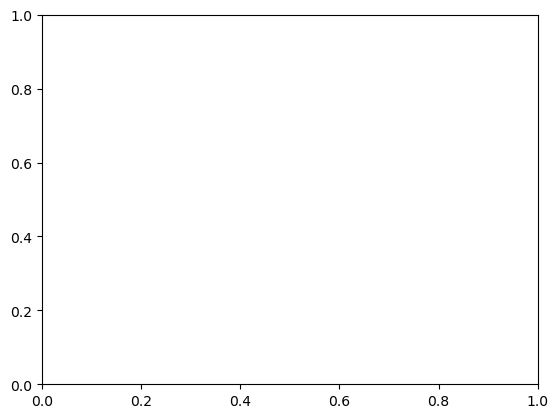

In [54]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

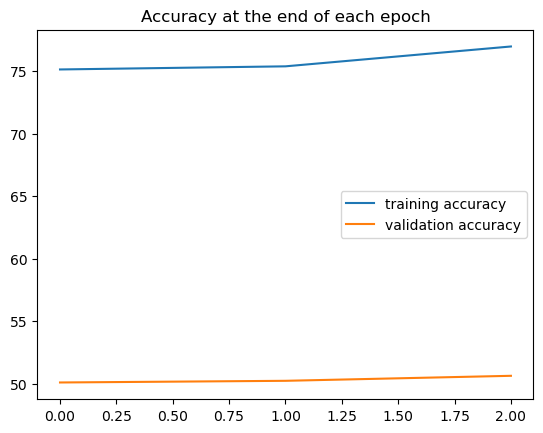

In [55]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [56]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(1503), tensor(1507), tensor(1519)]
Test accuracy: 50.633%


In [86]:
ResNetmodel = models.resnet50(pretrained=True)
ResNetmodel

C:\Users\Casper\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Casper\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [87]:
for param in ResNetmodel.parameters():
    param.requires_grad = False

In [88]:
# Replace the last fully connected layer (fc) with a new Linear layer
# that has the same number of outputs as the pre-trained layer
num_ftrs = ResNetmodel.fc.in_features
ResNetmodel.fc = nn.Linear(num_ftrs, 2)

In [123]:
torch.manual_seed(42)
ResNetmodel.fc = nn.Sequential(nn.Linear(num_ftrs, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(1024, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 2),
                                 nn.LogSoftmax(dim=1))

In [124]:
# # Add two new Linear layers on top of the pre-trained layers
# ResNetmodel.fc1 = nn.Linear(num_ftrs, 100)
# #ResNetmodel.fc1 = nn.Relu()
# ResNetmodel.fc1 = nn.Dropout(0.2)
# ResNetmodel.fc2 = nn.Linear(100, 2)
# ResNetmodel.fc2 = nn.LogSoftmax(dim=1)


In [125]:
ResNetmodel

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [126]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ResNetmodel.fc.parameters(), lr=0.001)

In [127]:
import time
start_time = time.time()

epochs = 5

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = ResNetmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = ResNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 0.44172040  accuracy:  77.250%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.63207024  accuracy:  76.925%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.83212775  accuracy:  77.000%
epoch:  1  batch:  200 [  2000/8000]  loss: 0.48096251  accuracy:  78.350%
epoch:  1  batch:  400 [  4000/8000]  loss: 0.36074808  accuracy:  77.425%
epoch:  1  batch:  600 [  6000/8000]  loss: 0.39182678  accuracy:  77.667%
epoch:  2  batch:  200 [  2000/8000]  loss: 0.30629966  accuracy:  79.550%
epoch:  2  batch:  400 [  4000/8000]  loss: 0.37422472  accuracy:  79.000%
epoch:  2  batch:  600 [  6000/8000]  loss: 0.17184380  accuracy:  78.183%
epoch:  3  batch:  200 [  2000/8000]  loss: 0.66905522  accuracy:  78.150%
epoch:  3  batch:  400 [  4000/8000]  loss: 0.68257219  accuracy:  79.125%
epoch:  3  batch:  600 [  6000/8000]  loss: 0.27937365  accuracy:  78.950%
epoch:  4  batch:  200 [  2000/8000]  loss: 0.21642141  accuracy:  78.600%
epoch:  4  batch:  400 [ 

In [128]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(1503), tensor(1511), tensor(1520), tensor(1512), tensor(1521)]
Test accuracy: 50.700%


In [129]:
# Import the confusion matrix function
from sklearn.metrics import confusion_matrix

# Put the model in evaluation mode
ResNetmodel.eval()

# Initialize an empty list to store predictions
predictions = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Iterate over the test dataset
for inputs, labels in test_loader:
    # Move inputs and labels to the GPU
    inputs, labels = inputs.to(device), labels.to(device)
    
    # Pass inputs through the model
    output = ResNetmodel(inputs)
    
    # Get the predicted class from the output
    _, predicted = torch.max(output.data, 1)
    
    # Store the predictions
    predictions += predicted.tolist()

# Convert predictions and true labels to numpy arrays
predictions = np.array(predictions)
true_labels = np.array([label for _, label in test_loader.dataset])

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Print the confusion matrix
print(cm)


[[1448   55]
 [ 415   18]]


In [130]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [51]:
ar_imgL=[]
for x in imgL:
    y = x.pixel_array
    ar_imgL.append(y)

In [ ]:
ar_imgL = np.array(ar_imgL)

In [ ]:
ar_imgL[0]

In [ ]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(ar_imgL, df_f["EncodedPixels"], test_size=0.2)

In [73]:
type(X_train)

numpy.ndarray

In [74]:
ar_imgL.shape

(9712, 1024, 1024)

In [75]:
type(ar_imgL)

numpy.ndarray

In [76]:
print(X_train.shape)
print(X_test.shape)

(7769, 1024, 1024)
(1943, 1024, 1024)


In [92]:
# import cv2
# import pydicom
# import os

# # List of image file paths
# image_paths = lstFilesDCM

# # Create the new folder
# new_folder = 'resized_images'
# if not os.path.exists(new_folder):
#   os.makedirs(new_folder)

# # Loop through the list of images
# for image_path in image_paths:
#   # Load the DICOM image using pydicom
#       ds = pydicom.dcmread(image_path)
# # Convert the image data to a NumPy array
#       image_data = ds.pixel_array
#       #image_data = image_data.astype('uint8')  # or any other compatible data type

#       # Resize the image using OpenCV's resize function
#       resized_image = cv2.resize(image_data, (256, 256))

#       # Encapsulate the resized image data
#       encapsulated_image_data = pydicom.encaps.encapsulate(resized_image)

#       # Update the DICOM image data with the encapsulated image data
#       ds.PixelData = encapsulated_image_data

#       # Update the image dimensions in the DICOM metadata
#       ds.Rows, ds.Columns = 256, 256

#       # Get the base file name
#       base_name = os.path.basename(image_path)

#       # Save the resized image to the new folder
#       ds.save_as(os.path.join(new_folder, base_name))


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('S8'), dtype('uint8')) -> None

In [ ]:
# import cv2
# import pydicom
# import os

# # List of image file paths
# image_paths = lstFilesDCM

# # Create the new folder
# new_folder = 'resized_images'
# if not os.path.exists(new_folder):
#   os.makedirs(new_folder)

# # Loop through the list of images
# for image_path in image_paths:
#   # Load the DICOM image using pydicom
#     ds = pydicom.dcmread(image_path)

#       # Convert the image data to a NumPy array
#     image_data = ds.pixel_array
#     from skimage.transform import resize
#     IMG_PX_SIZE = 251

#     resized_img = resize(image_data, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)

#       # # Resize the image using OpenCV's resize function
#       # resized_image = cv2.resize(image_data, (256, 256))
#       # # Get the base file name
#     base_name = os.path.basename(image_path)
#       # # Save the resized image to the new folder
#     ds.PixelData = resized_img.tobytes()
#     ds.save_as(os.path.join(new_folder, base_name))


In [49]:
PathDicom = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/resized_images'

lstFilesDCM_resized = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM_resized.append(os.path.join(dirName,filename))

In [50]:
len(lstFilesDCM_resized)

9712

In [47]:
# # Convert the DICOM image to a PIL image
# pil_image = Image.fromarray(images.pixel_array)
# # Resize the image to a smaller size
# new_size = (512, 512)
# resized_image = pil_image.resize(new_size)
# resized_array = np.array(resized_image)

In [51]:
from PIL import Image

dicom_images = []
for dicom_file in lstFilesDCM_resized:
    #images = plt.imread(dicom_file)
    #images = imageio.imread(dicom_file,)
    #images = Image.open(dicom_file).convert('L')
    images = Image.open(dicom_file)

    images = np.array(images)

    dicom_images.append(images)
    

# Extract the pixel data from the DICOM images and convert it to a NumPy array
# image_data = [image.pixel_array for image in dicom_images]
# image_data = np.array(image_data)




In [52]:
type(dicom_images[0])

numpy.ndarray

In [53]:
dicom_images[0].shape

(128, 128, 3)

In [54]:
dicom_images[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [55]:
dicom_images = np.array(dicom_images)

In [62]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(dicom_images, df_f["EncodedPixels"], test_size=0.2)

In [63]:
dicom_images.shape

(9712, 128, 128, 3)

In [64]:
print(X_train.shape)
print(X_test.shape)

(7769, 128, 128, 3)
(1943, 128, 128, 3)


In [65]:
# dim = 128*128*3
# X_train = X_train.reshape(7769, dim)
# X_test = X_test.reshape(1943, dim)



In [107]:
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [67]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255

In [ ]:
# y_test = y_test.astype('float16')
# y_train = y_train.astype('float16')


In [ ]:
#X_traing_in = []
# for i in imgL:
#     x = imgL.pixel_array
#     img_in.append(x)
# img_in = np.array(img_in)       

#### Model 

In [68]:
from tensorflow.keras import layers, models
import tensorflow as tf
from keras.layers import Flatten, Input, concatenate


In [183]:
dim = 128
model = Sequential()
model.add(Dense(dim, input_shape=(dim,128,3)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(216))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

model.summary()



model.compile(loss='binary_crossentropy', optimizer='adam')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128, 128, 128)     512       
                                                                 
 activation_25 (Activation)  (None, 128, 128, 128)     0         
                                                                 
 dropout_21 (Dropout)        (None, 128, 128, 128)     0         
                                                                 
 dense_39 (Dense)            (None, 128, 128, 512)     66048     
                                                                 
 activation_26 (Activation)  (None, 128, 128, 512)     0         
                                                                 
 dropout_22 (Dropout)        (None, 128, 128, 512)     0         
                                                                 
 dense_40 (Dense)            (None, 128, 128, 216)   

In [78]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(layers.Dense(10))
model.add(Dropout(0.2))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

In [79]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics='accuracy')

In [80]:
Y_test[5]

array([0., 1.], dtype=float32)

In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [82]:
history = model.fit(X_train, Y_train, epochs=1, 
                    validation_data=(X_test, Y_test),verbose=1)

243/243 [==============================] - 307s 1s/step - loss: 0.5561 - accuracy: 0.7723 - val_loss: 0.5040 - val_accuracy: 0.7864


In [84]:
model.evaluate(X_test,Y_test)

61/61 [==============================] - 17s 274ms/step - loss: 0.5040 - accuracy: 0.7864


[0.5040456652641296, 0.78641277551651]

In [100]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(y_pred_bool)
print(classification_report(Y_test, y_pred_bool))

31/31 [==============================] - 17s 544ms/step
[0 0 0 ... 0 0 0]


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [99]:
pred[100]

array([0.9358979 , 0.06410216], dtype=float32)

In [88]:
pred = model.predict(X_test)
result = np.where(pred > 0.5, 1, 0) #<--to get the binary category
print(result)

61/61 [==============================] - 19s 309ms/step
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [106]:
len(result[result == [0,1]])

0

ValueError: in user code:

    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


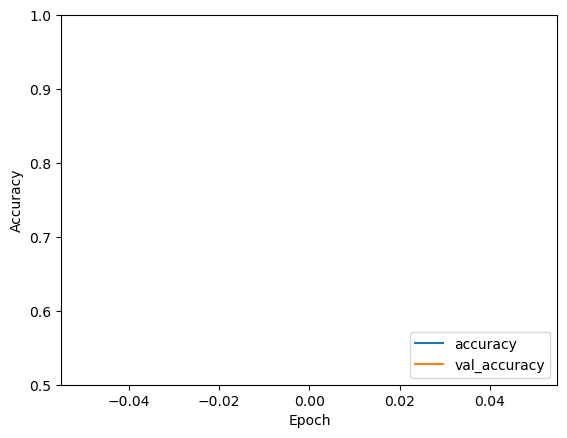

In [89]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [260]:
nb_epochs = 1
#TODO ajouter un vrai split sur train
model.fit(X_train, y_train,
          batch_size=32, epochs=nb_epochs,
          validation_data=(X_test, y_test))

ValueError: in user code:

    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\Casper\anaconda3\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 28, 28, 1) vs (None, 1)).


In [298]:
predi = model.predict(X_test)

61/61 [==============================] - 17s 272ms/step


In [300]:
predi[0:50]

array([[0.19536136],
       [0.16761947],
       [0.20327449],
       [0.12630925],
       [0.16061617],
       [0.16817527],
       [0.21874659],
       [0.18393432],
       [0.17100003],
       [0.13933559],
       [0.18089466],
       [0.18597975],
       [0.14667521],
       [0.18545766],
       [0.21191013],
       [0.24803421],
       [0.20725495],
       [0.1448493 ],
       [0.12565024],
       [0.12355922],
       [0.14809528],
       [0.17952839],
       [0.16753514],
       [0.1741974 ],
       [0.26851285],
       [0.13315868],
       [0.16887753],
       [0.21203645],
       [0.22564512],
       [0.1362737 ],
       [0.27232346],
       [0.13399108],
       [0.16466458],
       [0.13700595],
       [0.20742977],
       [0.20137632],
       [0.14570315],
       [0.24878114],
       [0.14350809],
       [0.23534787],
       [0.2516646 ],
       [0.15499082],
       [0.14808804],
       [0.20814039],
       [0.20551896],
       [0.15652001],
       [0.22210075],
       [0.220

In [188]:
pred = (model.predict(X_test) > 0.2).astype("int64")

61/61 [==============================] - 16s 265ms/step


In [189]:
from sklearn.metrics import classification_report,confusion_matrix

In [190]:
pred[]

SyntaxError: invalid syntax (442603570.py, line 1)

In [102]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

### Add borders

12


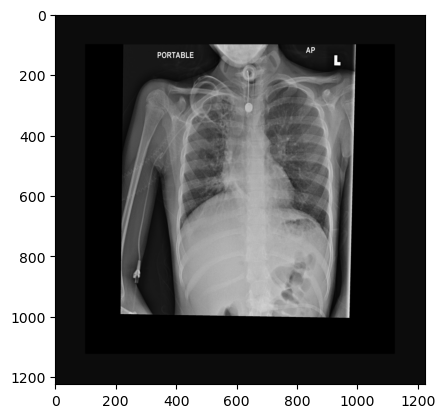

In [103]:
for i,x in zip(lstFilesDCM[0:1],df_f['encoded_age']):
    imgL = pydicom.read_file(i)
    image = imgL.pixel_array
    image = np.pad(image, ((100, 100), (100, 100)), mode="constant", constant_values=x)
    plt.imshow(image , cmap="gray", vmin=0, vmax=255)
    print(x)
    

In [55]:
plt.figure()
image = imgL[1].pixel_array
imag = imgL[1].pixel_array
# Add white pixels around the image
image = np.pad(image, ((100, 100), (100, 100)), mode="constant", constant_values=155)
f,ax = plt.subplots(1,2)
ax[0].imshow(image , cmap="gray", vmin=0, vmax=255)
ax[1].imshow(imag , cmap="gray", vmin=0, vmax=255)
# Save the padded image to a new DICOM file
#imgL[0].PixelData = image.tobytes()

KeyError: (0000, 0001)

<Figure size 640x480 with 0 Axes>

In [ ]:
image = imgL[1].pixel_array

# Add white pixels around the image
# image = np.pad(image, ((100, 100), (100, 100)), mode="constant", constant_values=155)


### MASK to RLE Function

In [41]:
def mask2rle(img, width, height):
    rle = []
    lastColor = 0;
    currentPixel = 0;
    runStart = -1;
    runLength = 0;

    for x in range(width):
        for y in range(height):
            currentColor = img[x][y]
            if currentColor != lastColor:
                if currentColor == 255:
                    runStart = currentPixel;
                    runLength = 1;
                else:
                    rle.append(str(runStart));
                    rle.append(str(runLength));
                    runStart = -1;
                    runLength = 0;
                    currentPixel = 0;
            elif runStart > -1:
                runLength += 1
            lastColor = currentColor;
            currentPixel+=1;

    return " ".join(rle)

def rle2mask(rle, width, height):
    mask= np.zeros(width* height)
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        current_position += start
        mask[current_position:current_position+lengths[index]] = 255
        current_position += lengths[index]

    return mask.reshape(width, height)

In [58]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(dicom_images, df_f[["EncodedPixels"]], test_size=0.2)

NameError: name 'train_test_split' is not defined

In [99]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam

In [108]:
dicom_images.shape

(9712, 128, 128, 3)

In [109]:
df_f

,ImageId,EncodedPixels,age,sex,encoded_age
0,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...,0,10.0,0,12
1,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...,0,50.0,0,63
2,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...,0,68.0,0,86
3,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...,0,65.0,1,210
4,1.2.276.0.7230010.3.1.4.8323329.10004.15178752...,0,45.0,0,57
...,...,...,...,...,...
9707,1.2.276.0.7230010.3.1.4.8323329.5792.151787519...,0,47.0,0,59
9708,1.2.276.0.7230010.3.1.4.8323329.5793.151787519...,0,76.0,1,224
9709,1.2.276.0.7230010.3.1.4.8323329.5794.151787519...,0,58.0,1,201
9710,1.2.276.0.7230010.3.1.4.8323329.5795.151787519...,1,16.0,1,148


In [168]:
import numpy as geek

xtrain = dicom_images[0:8000]
#xtrain = geek.squeeze(x_train)
xtest = dicom_images[8001:9712]
#xtest = geek.squeeze(x_test)

print("x_train shape:", xtrain.shape)
print(xtrain.shape[0], "train samples")
print(xtest.shape[0], "test samples")

df_train = df_f[['age','sex']][0:8000]
df_test = df_f[['age','sex']][8001:9712]


y_train = df_f['EncodedPixels'][0:8000]
y_test = df_f['EncodedPixels'][8001:9712]

x_train shape: (8000, 128, 128, 3)
8000 train samples
1711 test samples


In [169]:
xtrain.shape

(8000, 128, 128, 3)

In [162]:
import numpy as geek
out_arr = geek.squeeze(xtest) 

In [163]:
out_arr.shape

(1711, 128, 128, 3)

In [174]:
def create_cnn(width, height, depth, filters=(32, 64), regularizer=None):
    """
    Creates a CNN.
    """
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    inputShape = (height, width, depth)
    chanDim = -1
 
    # Define the model input
    inputs = Input(shape=inputShape)
 
    # Loop over the number of filters 
    for (i, f) in enumerate(filters):
        # If this is the first CONV layer then set the input appropriately
        if i == 0:
            x = inputs
 
        # Create loops of CONV => RELU => BN => POOL layers
        x = Conv2D(f, kernel_size=(3, 3))(x)
        x = Activation("relu")(x)
        #x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        
    # Final layers - flatten the volume, then Fully-Connected => RELU => BN => DROPOUT
    x = Flatten()(x)
    #x = Dense(16, kernel_regularizer=regularizer)(x)
    #x = Activation("relu")(x)
    #x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)
 
    # Apply another fully-connected layer, this one to match the number of nodes coming out of the MLP
    #x = Dense(4, kernel_regularizer=regularizer)(x)
    #x = Activation("relu")(x)
 
    # Construct the CNN
    model = Model(inputs, x)
 
    # Return the CNN
    return model   


cnn = create_cnn(128, 128, 3)

In [175]:
#######
# ffn for dataframe
###

def create_ffn(dim, regularizer=None):
    """Creates a simple two-layer MLP with inputs of the given dimension"""
    model = Sequential()
    model.add(Dense(7, input_dim=dim, activation="relu", kernel_regularizer=regularizer))
    model.add(Dense(4, activation="relu", kernel_regularizer=regularizer))
    return model

from sklearn.preprocessing import MinMaxScaler

cs = MinMaxScaler()
trainXdtf = cs.fit_transform(df_train)
testXdtf = cs.transform(df_test)


ffn = create_ffn(trainXdtf.shape[1])

In [176]:

#######
# combine mixed data
###

combinedInput = concatenate([ffn.output, cnn.output])


x = Dense(1, activation="sigmoid")(combinedInput) #add an output layer

model1 = Model(inputs=[ffn.input, cnn.input], outputs=x)
model1.summary()
#dot_img_file = '/home/jgodet/Seafile/MaBibliotheque/Enseignements/Ens2022-23/IDS_Apps/defi4//model_1.png'
#tf.keras.utils.plot_model(model1, to_file=dot_img_file, show_shapes=True)


opt = tf.keras.optimizers.legacy.Adam()
model1.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer=opt)

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 126, 126, 32  896         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 activation_23 (Activation)     (None, 126, 126, 32  0           ['conv2d_24[0][0]']              
                                )                                                          

In [182]:
model1_history = model1.fit(
  [trainXdtf,xtrain],
  y_train, 
  validation_split=0.1, 
  epochs=5, 
  batch_size=128)

Epoch 1/5
57/57 [==============================] - 78s 1s/step - loss: 0.0000e+00 - acc: 0.7786 - val_loss: 0.0000e+00 - val_acc: 0.7937
Epoch 2/5
57/57 [==============================] - 81s 1s/step - loss: 0.0000e+00 - acc: 0.7786 - val_loss: 0.0000e+00 - val_acc: 0.7937
Epoch 3/5
57/57 [==============================] - 82s 1s/step - loss: 0.0000e+00 - acc: 0.7786 - val_loss: 0.0000e+00 - val_acc: 0.7937
Epoch 4/5
57/57 [==============================] - 80s 1s/step - loss: 0.0000e+00 - acc: 0.7786 - val_loss: 0.0000e+00 - val_acc: 0.7937
Epoch 5/5
57/57 [==============================] - 80s 1s/step - loss: 0.0000e+00 - acc: 0.7786 - val_loss: 0.0000e+00 - val_acc: 0.7937


In [181]:
from sklearn.metrics import classification_report

y_pred = model.predict(xtest, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool,zero_division=0))

27/27 [==============================] - 14s 516ms/step
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      1308
           1       0.00      0.00      0.00       403

    accuracy                           0.76      1711
   macro avg       0.38      0.50      0.43      1711
weighted avg       0.58      0.76      0.66      1711

